In [85]:
# Reload when code changed:
%load_ext autoreload
%autoreload 2
%pwd
import os 
import sys
path = "../"
sys.path.append(path)
#os.path.abspath("../")
print(os.path.abspath(path))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
D:\github\ekostat_calculator


In [86]:
import pandas as pd
import numpy as np
import json
import timeit
import time
import core
import importlib
importlib.reload(core)
import logging
importlib.reload(core) 
try:
    logging.shutdown()
    importlib.reload(logging)
except:
    pass
from event_handler import EventHandler
print(core.__file__)
pd.__version__

..\core\__init__.py


'0.19.2'

### Load directories

In [87]:
root_directory = 'D:/github/ekostat_calculator'#"../" #os.getcwd()
workspace_directory = root_directory + '/workspaces' 
resource_directory = root_directory + '/resources'
#alias = 'lena'
user_id = 'test_user' #kanske ska vara off_line user?
workspace_alias = 'lena_indicator'

## Initiate EventHandler

In [88]:
print(root_directory)
paths = {'user_id': user_id, 
         'workspace_directory': root_directory + '/workspaces', 
         'resource_directory': root_directory + '/resources', 
         'log_directory': 'D:/github' + '/log', 
         'test_data_directory': 'D:/github' + '/test_data'}

D:/github/ekostat_calculator


In [182]:
t0 = time.time()
ekos = EventHandler(**paths)
#request = ekos.test_requests['request_workspace_list']
#response = ekos.request_workspace_list(request) 
#ekos.write_test_response('request_workspace_list', response)
print('-'*50)
print('Time for request: {}'.format(time.time()-t0))
# OLD: ekos = EventHandler(root_directory)

2018-06-13 15:41:50,390	event_handler.py	74	__init__	DEBUG	Start EventHandler: event_handler


--------------------------------------------------
Time for request: 3.933000087738037


### Load existing workspace

In [183]:
#ekos.copy_workspace(source_uuid='default_workspace', target_alias='lena_1')

In [184]:
ekos.print_workspaces()

Current workspaces for user are:

uuid                                    alias                         status                        
----------------------------------------------------------------------------------------------------
default_workspace                       default_workspace             readable                      
ddc27979-76f8-471c-a0b4-3bc773c6ecbf    lena                          editable                      
9eea0d00-c024-410f-912a-980eed55acae    lena_newdata                  editable                      
147f5d47-773c-43f0-b337-57208718d0cf    lena_indicator                editable                      
6fe05a39-2018-4cba-9dd4-27057578ff23    lena_1                        editable                      


In [185]:
workspace_uuid = ekos.get_unique_id_for_alias(workspace_alias = 'lena_indicator')
print(workspace_uuid)

147f5d47-773c-43f0-b337-57208718d0cf


In [186]:
workspace_alias = ekos.get_alias_for_unique_id(workspace_unique_id = workspace_uuid)

In [187]:
ekos.load_workspace(unique_id = workspace_uuid)
# Här får jag ofta felmeddelande:
# AttributeError: module 'core' has no attribute 'ParameterMapping'

2018-06-13 15:41:55,258	event_handler.py	1674	load_workspace	DEBUG	Trying to load new workspace "147f5d47-773c-43f0-b337-57208718d0cf" with alias "lena_indicator"



Initiating WorkSpace: D:/github/ekostat_calculator/workspaces/147f5d47-773c-43f0-b337-57208718d0cf
Parent directory is: D:/github/ekostat_calculator/workspaces
Resource directory is: D:/github/ekostat_calculator/resources
=== 30062c90-2a60-4ee1-9944-f00329db1174
!!! A
!!! 30062c90-2a60-4ee1-9944-f00329db1174
!!! D:/github/ekostat_calculator/workspaces/147f5d47-773c-43f0-b337-57208718d0cf/subsets
----------------------------------------------------------------------------------------------------
Initiating Subset: D:/github/ekostat_calculator/workspaces/147f5d47-773c-43f0-b337-57208718d0cf/subsets/30062c90-2a60-4ee1-9944-f00329db1174
===
D:/github/ekostat_calculator/workspaces/147f5d47-773c-43f0-b337-57208718d0cf/subsets/30062c90-2a60-4ee1-9944-f00329db1174
load_water_body_station_filter
Initiating WorkStep: D:/github/ekostat_calculator/workspaces/147f5d47-773c-43f0-b337-57208718d0cf/subsets/30062c90-2a60-4ee1-9944-f00329db1174/step_1
load_water_body_station_filter
Initiating WorkStep:

2018-06-13 15:41:55,509	event_handler.py	1692	load_workspace	INFO	Workspace "147f5d47-773c-43f0-b337-57208718d0cf" with alias "lena_indicator loaded."


True

In [188]:
ekos.import_default_data(workspace_alias = workspace_alias)

2018-06-13 15:41:55,746	event_handler.py	1042	import_default_data	DEBUG	Trying to load default data in workspace "147f5d47-773c-43f0-b337-57208718d0cf" with alias "lena_indicator"
2018-06-13 15:41:55,761	workspaces.py	1051	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: chlorophyll_integrated_2015_2016_row_format.txt
2018-06-13 15:41:55,768	workspaces.py	1051	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: chlorophyll_sharkweb_data_chlorophyll_wb_2007-2017_20180320.txt
2018-06-13 15:41:55,782	workspaces.py	1051	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: physicalchemicalmodel_110001_PROFILER_alldepths_SE652400-223501_toolbox.dat
2018-06-13 15:41:55,802	workspaces.py	1051	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: physicalchemicalmodel_120004_PROFILER_alldepths_SE612520-172080_toolbox.dat


File already added
File already added
File already added
File already added


2018-06-13 15:41:55,979	workspaces.py	1051	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: physicalchemical_sharkweb_data_fyskem_wb_2007-2017_20180320.txt
2018-06-13 15:41:56,053	workspaces.py	1051	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: phytoplankton_2016_row_format.txt


File already added
File already added


2018-06-13 15:41:56,232	workspaces.py	1051	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: phytoplankton_sharkweb_data_biovolume_wb_2007-2012_20180320.txt
2018-06-13 15:41:56,374	workspaces.py	1051	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: phytoplankton_sharkweb_data_biovolume_wb_2013-2017_20180320.txt


File already added
File already added


2018-06-13 15:41:56,453	workspaces.py	1051	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: zoobenthos_2016_row_format_2.txt
2018-06-13 15:41:56,484	workspaces.py	1051	import_default_data	DEBUG	Default data file has been copied to workspace raw data folder: zoobenthos_sharkweb_data_BQIm_wb_2007-2017_20180320.txt


File already added
File already added


### Load all data in workspace

In [189]:
#ekos.get_workspace(unique_id = workspace_uuid, alias = workspace_alias).delete_alldata_export()

In [190]:
#%%timeit
ekos.load_data(unique_id = workspace_uuid)

self.all_data 0


2018-06-13 15:41:57,487	workspaces.py	1654	load_all_data	DEBUG	Data has been loaded from existing all_data.pickle file.


In [191]:
w = ekos.get_workspace(unique_id = workspace_uuid)
len(w.data_handler.get_all_column_data_df())

2018-06-13 15:41:57,728	event_handler.py	999	get_workspace	DEBUG	Getting workspace "147f5d47-773c-43f0-b337-57208718d0cf" with alias "lena_indicator"


106094

# Step 0 

### Apply first data filter 

In [192]:
w.apply_data_filter(step = 0) # This sets the first level of data filter in the IndexHandler 

# Step 1 Set subset filter

In [193]:
#w.copy_subset(source_uuid='default_subset', target_alias='A')

In [194]:
subset_uuid = ekos.get_unique_id_for_alias(workspace_alias = workspace_alias, subset_alias = 'A')
print(w.get_subset_list(), subset_uuid)

f1 = w.get_data_filter_object(subset = subset_uuid, step=1) 
print(f1.include_list_filter)

w.apply_data_filter(subset = subset_uuid, step = 1)

df_step1 = w.get_filtered_data(step = 1, subset = subset_uuid)
#df_step1[['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'MNDEP', 'MXDEP','BQIm']].dropna(subset = ['BQIm'])

2018-06-13 15:41:59,423	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_1


['30062c90-2a60-4ee1-9944-f00329db1174', 'default_subset'] 30062c90-2a60-4ee1-9944-f00329db1174
{'MYEAR': ['2013', '2014', '2015', '2016', '2017', '2018', '2019'], 'STATN': [], 'WATER_BODY': []}


In [195]:
print(df_step1.columns)

Index(['AMON', 'BIOV_CONC_ALL', 'BQIm', 'CPHL_BTL', 'CPHL_INTEG', 'DEPH',
       'DIN', 'DOXY_BTL', 'DOXY_CTD', 'LATIT_DD', 'LONGI_DD', 'MNDEP', 'MXDEP',
       'MYEAR', 'NTOT', 'NTRA', 'NTRI', 'NTRZ', 'PHOS', 'PTOT', 'Q_AMON',
       'Q_BIOV_CONC_ALL', 'Q_BQIm', 'Q_CPHL_BTL', 'Q_CPHL_INTEG', 'Q_DOXY_BTL',
       'Q_DOXY_CTD', 'Q_NTOT', 'Q_NTRA', 'Q_NTRI', 'Q_NTRZ', 'Q_PHOS',
       'Q_PTOT', 'Q_SALT_BTL', 'Q_SALT_CTD', 'Q_SECCHI', 'Q_TEMP_BTL',
       'Q_TEMP_CTD', 'SALT_BTL', 'SALT_CTD', 'SDATE', 'SEA_BASIN', 'SECCHI',
       'SERNO', 'SHARKID_MD5', 'SHIPC', 'STATN', 'STIME', 'TEMP_BTL',
       'TEMP_CTD', 'VISS_EU_CD', 'WATER_BODY_NAME', 'WATER_DISTRICT',
       'WATER_TYPE_AREA', 'WLTYP', 'origin_dtype', 'origin_file_path', 'MONTH',
       'YEAR', 'POSITION', 'visit_id_str', 'SALT', 'Q_SALT', 'source_SALT',
       'TEMP', 'Q_TEMP', 'source_TEMP', 'DOXY', 'Q_DOXY', 'source_DOXY',
       'CPHL_INTEG_CALC', 'CPHL_INTEG_CALC_depths', 'CPHL_INTEG_CALC_values',
       'index_column'],
  

# Step 2

In [196]:
water_body = 'SE574000-114230' # type_area 1-s,
w.get_step_object(step = 2, subset = subset_uuid).load_indicator_settings_filters()

temp = w.get_step_object(step = 2, subset = subset_uuid).indicator_data_filter_settings['oxygen']
temp.get_value(variable='REF_VALUE', type_area='1', water_body = water_body)
#temp.settings.df

'3.5'

In [197]:
w.mapping_objects['water_body'].keys()

['column_name',
 'water_bodies',
 'SE570900-121060',
 'SE571240-121000',
 'SE571720-120640',
 'SE572072-115880',
 'SE572135-120141',
 'SE572227-115662',
 'SE572308-115550',
 'SE572472-120302',
 'SE572838-115515',
 'SE572980-115576',
 'SE573044-115355',
 'SE573100-115580',
 'SE573173-115587',
 'SE573322-115478',
 'SE573500-115150',
 'SE573547-114617',
 'SE573657-114572',
 'SE573797-114618',
 'SE573860-115000',
 'SE574000-114230',
 'SE574330-114000',
 'SE574370-114250',
 'SE574630-113940',
 'SE574870-113795',
 'SE0101010301-C',
 'SE575500-113750',
 'SE575747-113237',
 'SE580025-113168',
 'SE580325-113500',
 'SE580338-112901',
 'SE580500-112970',
 'SE580530-112700',
 'SE580610-113615',
 'SE580650-113000',
 'SE580765-112501',
 'SE580860-114560',
 'SE581338-112332',
 'SE581748-112411',
 'SE581853-112736',
 'SE582000-112350',
 'SE582040-112157',
 'SE582147-111771',
 'SE582210-111880',
 'SE582230-112255',
 'SE582302-111451',
 'SE582420-111370',
 'SE582665-111706',
 'SE582850-111760',
 'SE5830

In [198]:
w.get_step_object(step = 2, subset = subset_uuid).get_indicator_data_filter_settings('oxygen')

In [199]:
w.get_step_object(step = 2, subset = subset_uuid).indicator_ref_settings

{'biov': <core.filters.SettingsRef at 0xf1ffda0>,
 'bqi': <core.filters.SettingsRef at 0xf1ffd68>,
 'chl': <core.filters.SettingsRef at 0xf1ffa20>,
 'din_winter': <core.filters.SettingsRef at 0xf1ffa58>,
 'dip_winter': <core.filters.SettingsRef at 0xf1ffa90>,
 'ntot_summer': <core.filters.SettingsRef at 0xf1ffac8>,
 'ntot_winter': <core.filters.SettingsRef at 0xf1ffb00>,
 'oxygen': <core.filters.SettingsRef at 0xf1ffb70>,
 'ptot_summer': <core.filters.SettingsRef at 0xf1ffbe0>,
 'ptot_winter': <core.filters.SettingsRef at 0xf1ffba8>,
 'secchi': <core.filters.SettingsRef at 0xf1ffc50>}

In [200]:
w.get_step_object(step = 2, subset = subset_uuid)._indicator_setting_files['oxygen']

In [201]:
indicator_list = w.get_available_indicators(subset= subset_uuid, step=2)

2018-06-13 15:42:03,814	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2
2018-06-13 15:42:03,835	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2
2018-06-13 15:42:03,871	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2
2018-06-13 15:42:03,913	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2
2018-06-13 15:42:03,953	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2
2018-06-13 15:42:04,007	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2


subset 30062c90-2a60-4ee1-9944-f00329db1174
subset 30062c90-2a60-4ee1-9944-f00329db1174
subset 30062c90-2a60-4ee1-9944-f00329db1174
subset 30062c90-2a60-4ee1-9944-f00329db1174
subset 30062c90-2a60-4ee1-9944-f00329db1174
subset 30062c90-2a60-4ee1-9944-f00329db1174


2018-06-13 15:42:04,049	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2
2018-06-13 15:42:04,098	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2
2018-06-13 15:42:04,138	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2
2018-06-13 15:42:04,189	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2
2018-06-13 15:42:04,227	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2


subset 30062c90-2a60-4ee1-9944-f00329db1174
subset 30062c90-2a60-4ee1-9944-f00329db1174
"['TOT_COVER_ALL'] not in index"
subset 30062c90-2a60-4ee1-9944-f00329db1174
subset 30062c90-2a60-4ee1-9944-f00329db1174
subset 30062c90-2a60-4ee1-9944-f00329db1174


2018-06-13 15:42:04,270	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2


subset 30062c90-2a60-4ee1-9944-f00329db1174


#### Apply indicator filter

In [202]:
wb_list = df_step1.VISS_EU_CD.unique()
print('number of waterbodies in step 1: {}'.format(len(wb_list)))
typeA_list = [row.split('-')[0].strip().lstrip('0') for row in df_step1.WATER_TYPE_AREA.unique()]
print('number of type areas in step 1: {}'.format(len(typeA_list)))

number of waterbodies in step 1: 310
number of type areas in step 1: 27


In [203]:
wb_list.tolist()#.index(test_wb[-1])

['SE584340-174401',
 'SE581700-113000',
 'SE561400-161201',
 'SE654470-222700',
 'SE633000-195000',
 'SE625180-181655',
 'SE654820-222660',
 'SE625000-180075',
 'SE628750-183300',
 'SE631346-184241',
 'SE631646-185280',
 'SE583730-164501',
 'SE582705-163350',
 'SE582050-165820',
 'SE582147-111771',
 'SE580688-114860',
 'SE575500-113750',
 'SE574050-114780',
 'SE625900-174360',
 'SE630383-183500',
 'SE633550-200700',
 'SE636570-203590',
 'SE633043-193300',
 'SE552170-130626',
 'SE562000-123800',
 'SE591400-183200',
 'SE591200-183600',
 'SE592040-184000',
 'SE592245-184400',
 'SE600740-183460',
 'SE601070-182870',
 'SE631610-184500',
 'SE625500-175153',
 'SE622126-172430',
 'SE622339-172190',
 'SE652920-222650',
 'SE656620-222480',
 'SE656300-222750',
 'SE655120-220380',
 'SE655180-218660',
 'SE636150-199220',
 'SE635040-204196',
 'SE637070-204260',
 'SE636910-204040',
 'SE602120-181610',
 'SE582000-115270',
 'SE575700-114240',
 'SE581740-114820',
 'SE563330-124600',
 'SE654860-219880',


In [204]:
for wb in wb_list:
    try:
        print(w.mapping_objects['water_body'][wb])
        print('*************************************')
    except AttributeError:
        print('no match for {}'.format(wb))
        print('*************************************')
        continue

{'WATERBODY_NAME': 'Krabbfjärden', 'TYPE_AREA_CODE': '14', 'TYPE_AREA_NAME': '14 - Östergötlands yttre kustvatten', 'TYPE_AREA_NO': '14', 'TYPE_AREA_SUFFIX': '', 'WATER_DISTRICT': 'SE3', 'COUNTRY': 'SE', 'URL_VISS': ' http://www.viss.lansstyrelsen.se/waters.aspx?waterEUID=SE584340-174401', 'EU_CD': 'SE42F6DBA3-270B-499E-9DA9-616A1823AD39', 'MS_CD': 'WA59109207', 'VISS_MS_CD': 'SE584340-174401'}
*************************************
{'WATERBODY_NAME': 'Gullmarn centralbassäng', 'TYPE_AREA_CODE': '2', 'TYPE_AREA_NAME': '2 - Västkustens fjordar', 'TYPE_AREA_NO': '2', 'TYPE_AREA_SUFFIX': '', 'WATER_DISTRICT': 'SE5', 'COUNTRY': 'SE', 'URL_VISS': ' http://www.viss.lansstyrelsen.se/waters.aspx?waterEUID=SE581700-113000', 'EU_CD': 'SEB1420208-9106-4746-9E8F-44376E7311AA', 'MS_CD': 'WA46670058', 'VISS_MS_CD': 'SE581700-113000'}
*************************************
{'WATERBODY_NAME': 'S Kalmarsunds utsjövatten', 'TYPE_AREA_CODE': '9', 'TYPE_AREA_NAME': '9 - Blekinge skärgård och Kalmarsund, ytt

In [205]:
test_wb = ['SE584340-174401',
 'SE581700-113000',
 'SE654470-222700',
 'SE570900-121060',
 'SE633000-195000',
 'SE625000-180075',
 'SE601440-184000',
 'SE612791-171130',
 'SE572072-115880',
 'SE582147-111771',
 'SE572227-115662',
 'SE580688-114860',
 'SE575500-113750',
 'SE591400-183200','SE575370-164220', 'SE573940-163560', 'SE565400-163600', 'SE570080-163430', 'SE565800-163000', 'SE570340-163710', 'SE570500-163750']

In [206]:
#list(zip(typeA_list, df_step1.WATER_TYPE_AREA.unique()))
indicator_list = ['oxygen','bqi','din_winter','ntot_summer', 'ntot_winter', 'dip_winter', 'ptot_summer', 'ptot_winter', 'biov', 'chl', 'secchi']
for indicator in indicator_list:
    w.apply_indicator_data_filter(step = 2, 
                          subset = subset_uuid, 
                          indicator = indicator)#,
                         # water_body_list = test_wb)
    print(w.mapping_objects['water_body'][wb])
    print('*************************************')

2018-06-13 15:42:07,879	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2


Water body SE584340-174401
Water body SE581700-113000
Water body SE561400-161201
Water body SE654470-222700
Water body SE633000-195000
Water body SE625180-181655
Water body SE654820-222660
Water body SE625000-180075
Water body SE628750-183300
Water body SE631346-184241
Water body SE631646-185280
Water body SE583730-164501
Water body SE582705-163350
Water body SE582050-165820
Water body SE582147-111771
Water body SE580688-114860
Water body SE575500-113750
Water body SE574050-114780
Water body SE625900-174360
Water body SE630383-183500
Water body SE633550-200700
Water body SE636570-203590
Water body SE633043-193300
Water body SE552170-130626
Water body SE562000-123800
Water body SE591400-183200
Water body SE591200-183600
Water body SE592040-184000
Water body SE592245-184400
Water body SE600740-183460
Water body SE601070-182870
Water body SE631610-184500
Water body SE625500-175153
Water body SE622126-172430
Water body SE622339-172190
Water body SE652920-222650
Water body SE656620-222480
W

2018-06-13 15:42:16,713	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2


Water body SE611766-171305
Water body SE575150-190400
Water body SE654291-224000
{'WATERBODY_NAME': 'Bergöfjärden', 'TYPE_AREA_CODE': '22', 'TYPE_AREA_NAME': '22 - Bottenviken, inre kustvatten', 'TYPE_AREA_NO': '22', 'TYPE_AREA_SUFFIX': '', 'WATER_DISTRICT': 'SE1', 'COUNTRY': 'SE', 'URL_VISS': ' http://www.viss.lansstyrelsen.se/waters.aspx?waterEUID=SE654291-224000', 'EU_CD': 'SE82401A81-F842-4B4B-90E1-AD382957472C', 'MS_CD': 'WA22437208', 'VISS_MS_CD': 'SE654291-224000'}
*************************************
Water body SE584340-174401
RESULT [5, 6]
Water body SE581700-113000
RESULT [5, 6]
Water body SE561400-161201
RESULT [5, 6]
Water body SE654470-222700
RESULT [5, 6]
Water body SE633000-195000
RESULT [5, 6]
Water body SE625180-181655
RESULT [5, 6]
Water body SE654820-222660
RESULT [5, 6]
Water body SE625000-180075
RESULT [5, 6]
Water body SE628750-183300
RESULT [5, 6]
Water body SE631346-184241
RESULT [5, 6]
Water body SE631646-185280
RESULT [5, 6]
Water body SE583730-164501
RESULT 

waterbody matching file does not recognise water body with VISS_EU_CD SE634210-202020
RESULT False
Water body SE643700-211940
RESULT [5, 6]
Water body SE645000-212100
RESULT [5, 6]
Water body SE651818-212790
RESULT [5, 6]
Water body SE651475-214300
RESULT [5, 6]
Water body SE651800-214740
RESULT [5, 6]
Water body SE651500-213108
RESULT [5, 6]
Water body SE645500-212000
RESULT [5, 6]
Water body SE653176-222000
RESULT [5, 6]
Water body SE728806-179329
RESULT [5, 6]
Water body SE623890-178030
RESULT [5, 6]
Water body SE622500-172430
RESULT [5, 6]
Water body SE622860-173000
RESULT [5, 6]
Water body SE622000-172300
RESULT [5, 6]
Water body SE624870-175500
RESULT [5, 6]
Water body SE624615-180500
RESULT [5, 6]
Water body SE624335-180000
RESULT [5, 6]
Water body SE623810-180350
RESULT [5, 6]
Water body SE623340-175556
RESULT [5, 6]
Water body SE634950-202940
RESULT [5, 6]
Water body SE590740-174135
RESULT [5, 6]
Water body SE631840-191130
RESULT [5, 6]
Water body SE614165-171500
RESULT [5, 6]

2018-06-13 15:42:22,937	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2


Water body SE575150-190400
RESULT [5, 6]
Water body SE654291-224000
RESULT [5, 6]
{'WATERBODY_NAME': 'Bergöfjärden', 'TYPE_AREA_CODE': '22', 'TYPE_AREA_NAME': '22 - Bottenviken, inre kustvatten', 'TYPE_AREA_NO': '22', 'TYPE_AREA_SUFFIX': '', 'WATER_DISTRICT': 'SE1', 'COUNTRY': 'SE', 'URL_VISS': ' http://www.viss.lansstyrelsen.se/waters.aspx?waterEUID=SE654291-224000', 'EU_CD': 'SE82401A81-F842-4B4B-90E1-AD382957472C', 'MS_CD': 'WA22437208', 'VISS_MS_CD': 'SE654291-224000'}
*************************************
Water body SE584340-174401
RESULT [12, 1, 2]
Water body SE581700-113000
RESULT [12, 1, 2, 3]
Water body SE561400-161201
RESULT [12, 1, 2]
Water body SE654470-222700
RESULT [11, 12, 1, 2]
Water body SE633000-195000
RESULT [11, 12, 1, 2]
Water body SE625180-181655
RESULT [11, 12, 1, 2]
Water body SE654820-222660
RESULT [11, 12, 1, 2]
Water body SE625000-180075
RESULT [11, 12, 1, 2]
Water body SE628750-183300
RESULT [11, 12, 1, 2]
Water body SE631346-184241
RESULT [11, 12, 1, 2]
Wat

RESULT [12, 1, 2]
Water body SE591050-182740
RESULT [12, 1, 2]
Water body SE590000-183000
RESULT [12, 1, 2]
Water body SE591300-182800
RESULT [12, 1, 2]
Water body SE594200-192000
RESULT [12, 1, 2]
Water body SE592640-184500
RESULT [12, 1, 2]
Water body SE593000-190500
RESULT [12, 1, 2]
Water body SE593180-191280
RESULT [12, 1, 2]
Water body SE594845-191240
RESULT [12, 1, 2]
Water body SE594800-190655
RESULT [12, 1, 2]
Water body SE591655-183200
RESULT [12, 1, 2]
Water body SE591745-182250
RESULT [12, 1, 2]
Water body SE594670-185500
RESULT [12, 1, 2]
Water body SE594800-190220
RESULT [12, 1, 2]
Water body SE601310-183700
RESULT [11, 12, 1, 2]
Water body SE601000-183510
RESULT [11, 12, 1, 2]
Water body SE600565-184600
RESULT [11, 12, 1, 2]
Water body SE601300-184180
RESULT [11, 12, 1, 2]
Water body SE585797-181090
RESULT [12, 1, 2]
Water body SE574931-113131
RESULT [12, 1, 2, 3]
Water body SE561030-122821
RESULT [12, 1, 2, 3]
Water body SE554810-125240
RESULT [12, 1, 2, 3]
Water body S

2018-06-13 15:42:31,030	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2


SE575150-190400
RESULT [12, 1, 2]
Water body SE654291-224000
RESULT [11, 12, 1, 2]
{'WATERBODY_NAME': 'Bergöfjärden', 'TYPE_AREA_CODE': '22', 'TYPE_AREA_NAME': '22 - Bottenviken, inre kustvatten', 'TYPE_AREA_NO': '22', 'TYPE_AREA_SUFFIX': '', 'WATER_DISTRICT': 'SE1', 'COUNTRY': 'SE', 'URL_VISS': ' http://www.viss.lansstyrelsen.se/waters.aspx?waterEUID=SE654291-224000', 'EU_CD': 'SE82401A81-F842-4B4B-90E1-AD382957472C', 'MS_CD': 'WA22437208', 'VISS_MS_CD': 'SE654291-224000'}
*************************************
Water body SE584340-174401
RESULT [6, 7, 8]
Water body SE581700-113000
RESULT [6, 7, 8]
Water body SE561400-161201
RESULT [6, 7, 8]
Water body SE654470-222700
RESULT [6, 7, 8]
Water body SE633000-195000
RESULT [6, 7, 8]
Water body SE625180-181655
RESULT [6, 7, 8]
Water body SE654820-222660
RESULT [6, 7, 8]
Water body SE625000-180075
RESULT [6, 7, 8]
Water body SE628750-183300
RESULT [6, 7, 8]
Water body SE631346-184241
RESULT [6, 7, 8]
Water body SE631646-185280
RESULT [6, 7, 8]

Water body SE594845-191240
RESULT [6, 7, 8]
Water body SE594800-190655
RESULT [6, 7, 8]
Water body SE591655-183200
RESULT [6, 7, 8]
Water body SE591745-182250
RESULT [6, 7, 8]
Water body SE594670-185500
RESULT [6, 7, 8]
Water body SE594800-190220
RESULT [6, 7, 8]
Water body SE601310-183700
RESULT [6, 7, 8]
Water body SE601000-183510
RESULT [6, 7, 8]
Water body SE600565-184600
RESULT [6, 7, 8]
Water body SE601300-184180
RESULT [6, 7, 8]
Water body SE585797-181090
RESULT [6, 7, 8]
Water body SE574931-113131
RESULT [6, 7, 8]
Water body SE561030-122821
RESULT [6, 7, 8]
Water body SE554810-125240
RESULT [6, 7, 8]
Water body SE552500-124461
RESULT [6, 7, 8]
Water body SE572472-120302
RESULT [6, 7, 8]
Water body SE572135-120141
RESULT [6, 7, 8]
Water body SE570900-164501
RESULT [6, 7, 8]
Water body SE644150-211000
RESULT [6, 7, 8]
Water body SE594340-190448
RESULT [6, 7, 8]
Water body SE592400-180800
RESULT [6, 7, 8]
Water body SE593750-183962
RESULT [6, 7, 8]
Water body SE634110-201920
water

2018-06-13 15:42:39,446	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2


SE628480-183070
RESULT [6, 7, 8]
Water body SE593500-191660
RESULT [6, 7, 8]
Water body SE593330-192540
RESULT [6, 7, 8]
Water body SE593000-192000
RESULT [6, 7, 8]
Water body SE611766-171305
RESULT [6, 7, 8]
Water body SE575150-190400
RESULT [6, 7, 8]
Water body SE654291-224000
RESULT [6, 7, 8]
{'WATERBODY_NAME': 'Bergöfjärden', 'TYPE_AREA_CODE': '22', 'TYPE_AREA_NAME': '22 - Bottenviken, inre kustvatten', 'TYPE_AREA_NO': '22', 'TYPE_AREA_SUFFIX': '', 'WATER_DISTRICT': 'SE1', 'COUNTRY': 'SE', 'URL_VISS': ' http://www.viss.lansstyrelsen.se/waters.aspx?waterEUID=SE654291-224000', 'EU_CD': 'SE82401A81-F842-4B4B-90E1-AD382957472C', 'MS_CD': 'WA22437208', 'VISS_MS_CD': 'SE654291-224000'}
*************************************
Water body SE584340-174401
RESULT [12, 1, 2]
Water body SE581700-113000
RESULT [12, 1, 2, 3]
Water body SE561400-161201
RESULT [12, 1, 2]
Water body SE654470-222700
RESULT [11, 12, 1, 2]
Water body SE633000-195000
RESULT [11, 12, 1, 2]
Water body SE625180-181655
RESULT

RESULT [12, 1, 2]
Water body SE591160-182400
RESULT [12, 1, 2]
Water body SE590385-180890
RESULT [12, 1, 2]
Water body SE584960-175280
RESULT [12, 1, 2]
Water body SE591050-182740
RESULT [12, 1, 2]
Water body SE590000-183000
RESULT [12, 1, 2]
Water body SE591300-182800
RESULT [12, 1, 2]
Water body SE594200-192000
RESULT [12, 1, 2]
Water body SE592640-184500
RESULT [12, 1, 2]
Water body SE593000-190500
RESULT [12, 1, 2]
Water body SE593180-191280
RESULT [12, 1, 2]
Water body SE594845-191240
RESULT [12, 1, 2]
Water body SE594800-190655
RESULT [12, 1, 2]
Water body SE591655-183200
RESULT [12, 1, 2]
Water body SE591745-182250
RESULT [12, 1, 2]
Water body SE594670-185500
RESULT [12, 1, 2]
Water body SE594800-190220
RESULT [12, 1, 2]
Water body SE601310-183700
RESULT [11, 12, 1, 2]
Water body SE601000-183510
RESULT [11, 12, 1, 2]
Water body SE600565-184600
RESULT [11, 12, 1, 2]
Water body SE601300-184180
RESULT [11, 12, 1, 2]
Water body SE585797-181090
RESULT [12, 1, 2]
Water body SE574931-1

Water body SE654000-222430
RESULT [11, 12, 1, 2]
Water body SE650750-213500
RESULT [11, 12, 1, 2]
Water body SE650460-213400
RESULT [11, 12, 1, 2]
Water body SE625416-182696
RESULT [11, 12, 1, 2]
Water body SE628480-183070
RESULT [11, 12, 1, 2]
Water body SE593500-191660
RESULT [12, 1, 2]
Water body SE593330-192540
RESULT [12, 1, 2]
Water body SE593000-192000
RESULT

2018-06-13 15:42:47,445	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2


 [12, 1, 2]
Water body SE611766-171305
RESULT [11, 12, 1, 2]
Water body SE575150-190400
RESULT [12, 1, 2]
Water body SE654291-224000
RESULT [11, 12, 1, 2]
{'WATERBODY_NAME': 'Bergöfjärden', 'TYPE_AREA_CODE': '22', 'TYPE_AREA_NAME': '22 - Bottenviken, inre kustvatten', 'TYPE_AREA_NO': '22', 'TYPE_AREA_SUFFIX': '', 'WATER_DISTRICT': 'SE1', 'COUNTRY': 'SE', 'URL_VISS': ' http://www.viss.lansstyrelsen.se/waters.aspx?waterEUID=SE654291-224000', 'EU_CD': 'SE82401A81-F842-4B4B-90E1-AD382957472C', 'MS_CD': 'WA22437208', 'VISS_MS_CD': 'SE654291-224000'}
*************************************
Water body SE584340-174401
RESULT [12, 1, 2]
Water body SE581700-113000
RESULT [12, 1, 2, 3]
Water body SE561400-161201
RESULT [12, 1, 2]
Water body SE654470-222700
RESULT [11, 12, 1, 2]
Water body SE633000-195000
RESULT [11, 12, 1, 2]
Water body SE625180-181655
RESULT [11, 12, 1, 2]
Water body SE654820-222660
RESULT [11, 12, 1, 2]
Water body SE625000-180075
RESULT [11, 12, 1, 2]
Water body SE628750-183300
R

Water body SE590385-180890
RESULT [12, 1, 2]
Water body SE584960-175280
RESULT [12, 1, 2]
Water body SE591050-182740
RESULT [12, 1, 2]
Water body SE590000-183000
RESULT [12, 1, 2]
Water body SE591300-182800
RESULT [12, 1, 2]
Water body SE594200-192000
RESULT [12, 1, 2]
Water body SE592640-184500
RESULT [12, 1, 2]
Water body SE593000-190500
RESULT [12, 1, 2]
Water body SE593180-191280
RESULT [12, 1, 2]
Water body SE594845-191240
RESULT [12, 1, 2]
Water body SE594800-190655
RESULT [12, 1, 2]
Water body SE591655-183200
RESULT [12, 1, 2]
Water body SE591745-182250
RESULT [12, 1, 2]
Water body SE594670-185500
RESULT [12, 1, 2]
Water body SE594800-190220
RESULT [12, 1, 2]
Water body SE601310-183700
RESULT [11, 12, 1, 2]
Water body SE601000-183510
RESULT [11, 12, 1, 2]
Water body SE600565-184600
RESULT [11, 12, 1, 2]
Water body SE601300-184180
RESULT [11, 12, 1, 2]
Water body SE585797-181090
RESULT [12, 1, 2]
Water body SE574931-113131
RESULT [12, 1, 2, 3]
Water body SE561030-122821
RESULT [1

2018-06-13 15:42:56,260	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2


 [12, 1, 2]
Water body SE593330-192540
RESULT [12, 1, 2]
Water body SE593000-192000
RESULT [12, 1, 2]
Water body SE611766-171305
RESULT [11, 12, 1, 2]
Water body SE575150-190400
RESULT [12, 1, 2]
Water body SE654291-224000
RESULT [11, 12, 1, 2]
{'WATERBODY_NAME': 'Bergöfjärden', 'TYPE_AREA_CODE': '22', 'TYPE_AREA_NAME': '22 - Bottenviken, inre kustvatten', 'TYPE_AREA_NO': '22', 'TYPE_AREA_SUFFIX': '', 'WATER_DISTRICT': 'SE1', 'COUNTRY': 'SE', 'URL_VISS': ' http://www.viss.lansstyrelsen.se/waters.aspx?waterEUID=SE654291-224000', 'EU_CD': 'SE82401A81-F842-4B4B-90E1-AD382957472C', 'MS_CD': 'WA22437208', 'VISS_MS_CD': 'SE654291-224000'}
*************************************
Water body SE584340-174401
RESULT [6, 7, 8]
Water body SE581700-113000
RESULT [6, 7, 8]
Water body SE561400-161201
RESULT [6, 7, 8]
Water body SE654470-222700
RESULT [6, 7, 8]
Water body SE633000-195000
RESULT [6, 7, 8]
Water body SE625180-181655
RESULT [6, 7, 8]
Water body SE654820-222660
RESULT [6, 7, 8]
Water body SE

Water body SE591655-183200
RESULT [6, 7, 8]
Water body SE591745-182250
RESULT [6, 7, 8]
Water body SE594670-185500
RESULT [6, 7, 8]
Water body SE594800-190220
RESULT [6, 7, 8]
Water body SE601310-183700
RESULT [6, 7, 8]
Water body SE601000-183510
RESULT [6, 7, 8]
Water body SE600565-184600
RESULT [6, 7, 8]
Water body SE601300-184180
RESULT [6, 7, 8]
Water body SE585797-181090
RESULT [6, 7, 8]
Water body SE574931-113131
RESULT [6, 7, 8]
Water body SE561030-122821
RESULT [6, 7, 8]
Water body SE554810-125240
RESULT [6, 7, 8]
Water body SE552500-124461
RESULT [6, 7, 8]
Water body SE572472-120302
RESULT [6, 7, 8]
Water body SE572135-120141
RESULT [6, 7, 8]
Water body SE570900-164501
RESULT [6, 7, 8]
Water body SE644150-211000
RESULT [6, 7, 8]
Water body SE594340-190448
RESULT [6, 7, 8]
Water body SE592400-180800
RESULT [6, 7, 8]
Water body SE593750-183962
RESULT [6, 7, 8]
Water body SE634110-201920
waterbody matching file does not recognise water body with VISS_EU_CD SE634110-201920
waterbo

2018-06-13 15:43:04,527	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2


SE593330-192540
RESULT [6, 7, 8]
Water body SE593000-192000
RESULT [6, 7, 8]
Water body SE611766-171305
RESULT [6, 7, 8]
Water body SE575150-190400
RESULT [6, 7, 8]
Water body SE654291-224000
RESULT [6, 7, 8]
{'WATERBODY_NAME': 'Bergöfjärden', 'TYPE_AREA_CODE': '22', 'TYPE_AREA_NAME': '22 - Bottenviken, inre kustvatten', 'TYPE_AREA_NO': '22', 'TYPE_AREA_SUFFIX': '', 'WATER_DISTRICT': 'SE1', 'COUNTRY': 'SE', 'URL_VISS': ' http://www.viss.lansstyrelsen.se/waters.aspx?waterEUID=SE654291-224000', 'EU_CD': 'SE82401A81-F842-4B4B-90E1-AD382957472C', 'MS_CD': 'WA22437208', 'VISS_MS_CD': 'SE654291-224000'}
*************************************
Water body SE584340-174401
RESULT [12, 1, 2]
Water body SE581700-113000
RESULT [12, 1, 2, 3]
Water body SE561400-161201
RESULT [12, 1, 2]
Water body SE654470-222700
RESULT [11, 12, 1, 2]
Water body SE633000-195000
RESULT [11, 12, 1, 2]
Water body SE625180-181655
RESULT [11, 12, 1, 2]
Water body SE654820-222660
RESULT [11, 12, 1, 2]
Water body SE625000-180

Water body SE591050-182740
RESULT [12, 1, 2]
Water body SE590000-183000
RESULT [12, 1, 2]
Water body SE591300-182800
RESULT [12, 1, 2]
Water body SE594200-192000
RESULT [12, 1, 2]
Water body SE592640-184500
RESULT [12, 1, 2]
Water body SE593000-190500
RESULT [12, 1, 2]
Water body SE593180-191280
RESULT [12, 1, 2]
Water body SE594845-191240
RESULT [12, 1, 2]
Water body SE594800-190655
RESULT [12, 1, 2]
Water body SE591655-183200
RESULT [12, 1, 2]
Water body SE591745-182250
RESULT [12, 1, 2]
Water body SE594670-185500
RESULT [12, 1, 2]
Water body SE594800-190220
RESULT [12, 1, 2]
Water body SE601310-183700
RESULT [11, 12, 1, 2]
Water body SE601000-183510
RESULT [11, 12, 1, 2]
Water body SE600565-184600
RESULT [11, 12, 1, 2]
Water body SE601300-184180
RESULT [11, 12, 1, 2]
Water body SE585797-181090
RESULT [12, 1, 2]
Water body SE574931-113131
RESULT [12, 1, 2, 3]
Water body SE561030-122821
RESULT [12, 1, 2, 3]
Water body SE554810-125240
RESULT [12, 1, 2, 3]
Water body SE552500-124461
RES

2018-06-13 15:43:12,769	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2


SE575150-190400
RESULT [12, 1, 2]
Water body SE654291-224000
RESULT [11, 12, 1, 2]
{'WATERBODY_NAME': 'Bergöfjärden', 'TYPE_AREA_CODE': '22', 'TYPE_AREA_NAME': '22 - Bottenviken, inre kustvatten', 'TYPE_AREA_NO': '22', 'TYPE_AREA_SUFFIX': '', 'WATER_DISTRICT': 'SE1', 'COUNTRY': 'SE', 'URL_VISS': ' http://www.viss.lansstyrelsen.se/waters.aspx?waterEUID=SE654291-224000', 'EU_CD': 'SE82401A81-F842-4B4B-90E1-AD382957472C', 'MS_CD': 'WA22437208', 'VISS_MS_CD': 'SE654291-224000'}
*************************************
Water body SE584340-174401
RESULT [6, 7, 8]
Water body SE581700-113000
RESULT [6, 7, 8]
Water body SE561400-161201
RESULT [6, 7, 8]
Water body SE654470-222700
RESULT [6, 7, 8]
Water body SE633000-195000
RESULT [6, 7, 8]
Water body SE625180-181655
RESULT [6, 7, 8]
Water body SE654820-222660
RESULT [6, 7, 8]
Water body SE625000-180075
RESULT [6, 7, 8]
Water body SE628750-183300
RESULT [6, 7, 8]
Water body SE631346-184241
RESULT [6, 7, 8]
Water body SE631646-185280
RESULT [6, 7, 8]

Water body SE601000-183510
RESULT [6, 7, 8]
Water body SE600565-184600
RESULT [6, 7, 8]
Water body SE601300-184180
RESULT [6, 7, 8]
Water body SE585797-181090
RESULT [6, 7, 8]
Water body SE574931-113131
RESULT [6, 7, 8]
Water body SE561030-122821
RESULT [6, 7, 8]
Water body SE554810-125240
RESULT [6, 7, 8]
Water body SE552500-124461
RESULT [6, 7, 8]
Water body SE572472-120302
RESULT [6, 7, 8]
Water body SE572135-120141
RESULT [6, 7, 8]
Water body SE570900-164501
RESULT [6, 7, 8]
Water body SE644150-211000
RESULT [6, 7, 8]
Water body SE594340-190448
RESULT [6, 7, 8]
Water body SE592400-180800
RESULT [6, 7, 8]
Water body SE593750-183962
RESULT [6, 7, 8]
Water body SE634110-201920
waterbody matching file does not recognise water body with VISS_EU_CD SE634110-201920
RESULT False
Water body SE634210-202020
waterbody matching file does not recognise water body with VISS_EU_CD SE634210-202020
RESULT False
Water body SE643700-211940
RESULT [6, 7, 8]
Water body SE645000-212100
RESULT [6, 7, 8]


2018-06-13 15:43:20,127	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2


Water body SE593500-191660
RESULT [6, 7, 8]
Water body SE593330-192540
RESULT [6, 7, 8]
Water body SE593000-192000
RESULT [6, 7, 8]
Water body SE611766-171305
RESULT [6, 7, 8]
Water body SE575150-190400
RESULT [6, 7, 8]
Water body SE654291-224000
RESULT [6, 7, 8]
{'WATERBODY_NAME': 'Bergöfjärden', 'TYPE_AREA_CODE': '22', 'TYPE_AREA_NAME': '22 - Bottenviken, inre kustvatten', 'TYPE_AREA_NO': '22', 'TYPE_AREA_SUFFIX': '', 'WATER_DISTRICT': 'SE1', 'COUNTRY': 'SE', 'URL_VISS': ' http://www.viss.lansstyrelsen.se/waters.aspx?waterEUID=SE654291-224000', 'EU_CD': 'SE82401A81-F842-4B4B-90E1-AD382957472C', 'MS_CD': 'WA22437208', 'VISS_MS_CD': 'SE654291-224000'}
*************************************
Water body SE584340-174401
RESULT [6, 7, 8]
Water body SE581700-113000
RESULT [6, 7, 8]
Water body SE561400-161201
RESULT [6, 7, 8]
Water body SE654470-222700
RESULT [6, 7, 8]
Water body SE633000-195000
RESULT [6, 7, 8]
Water body SE625180-181655
RESULT [6, 7, 8]
Water body SE654820-222660
RESULT [6, 

Water body SE600565-184600
RESULT [6, 7, 8]
Water body SE601300-184180
RESULT [6, 7, 8]
Water body SE585797-181090
RESULT [6, 7, 8]
Water body SE574931-113131
RESULT [6, 7, 8]
Water body SE561030-122821
RESULT [6, 7, 8]
Water body SE554810-125240
RESULT [6, 7, 8]
Water body SE552500-124461
RESULT [6, 7, 8]
Water body SE572472-120302
RESULT [6, 7, 8]
Water body SE572135-120141
RESULT [6, 7, 8]
Water body SE570900-164501
RESULT [6, 7, 8]
Water body SE644150-211000
RESULT [6, 7, 8]
Water body SE594340-190448
RESULT [6, 7, 8]
Water body SE592400-180800
RESULT [6, 7, 8]
Water body SE593750-183962
RESULT [6, 7, 8]
Water body SE634110-201920
waterbody matching file does not recognise water body with VISS_EU_CD SE634110-201920
RESULT False
Water body SE634210-202020
waterbody matching file does not recognise water body with VISS_EU_CD SE634210-202020
RESULT False
Water body SE643700-211940
RESULT [6, 7, 8]
Water body SE645000-212100
RESULT [6, 7, 8]
Water body SE651818-212790
RESULT [6, 7, 8]


2018-06-13 15:43:27,358	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2


Water body SE625416-182696
RESULT [6, 7, 8]
Water body SE628480-183070
RESULT [6, 7, 8]
Water body SE593500-191660
RESULT [6, 7, 8]
Water body SE593330-192540
RESULT [6, 7, 8]
Water body SE593000-192000
RESULT [6, 7, 8]
Water body SE611766-171305
RESULT [6, 7, 8]
Water body SE575150-190400
RESULT [6, 7, 8]
Water body SE654291-224000
RESULT [6, 7, 8]
{'WATERBODY_NAME': 'Bergöfjärden', 'TYPE_AREA_CODE': '22', 'TYPE_AREA_NAME': '22 - Bottenviken, inre kustvatten', 'TYPE_AREA_NO': '22', 'TYPE_AREA_SUFFIX': '', 'WATER_DISTRICT': 'SE1', 'COUNTRY': 'SE', 'URL_VISS': ' http://www.viss.lansstyrelsen.se/waters.aspx?waterEUID=SE654291-224000', 'EU_CD': 'SE82401A81-F842-4B4B-90E1-AD382957472C', 'MS_CD': 'WA22437208', 'VISS_MS_CD': 'SE654291-224000'}
*************************************
Water body SE584340-174401
RESULT [6, 7, 8]
Water body SE581700-113000
RESULT [6, 7, 8]
Water body SE561400-161201
RESULT [6, 7, 8]
Water body SE654470-222700
RESULT [6, 7, 8]
Water body SE633000-195000
RESULT [6, 

RESULT [6, 7, 8]
Water body SE594845-191240
RESULT [6, 7, 8]
Water body SE594800-190655
RESULT [6, 7, 8]
Water body SE591655-183200
RESULT [6, 7, 8]
Water body SE591745-182250
RESULT [6, 7, 8]
Water body SE594670-185500
RESULT [6, 7, 8]
Water body SE594800-190220
RESULT [6, 7, 8]
Water body SE601310-183700
RESULT [6, 7, 8]
Water body SE601000-183510
RESULT [6, 7, 8]
Water body SE600565-184600
RESULT [6, 7, 8]
Water body SE601300-184180
RESULT [6, 7, 8]
Water body SE585797-181090
RESULT [6, 7, 8]
Water body SE574931-113131
RESULT [6, 7, 8]
Water body SE561030-122821
RESULT [6, 7, 8]
Water body SE554810-125240
RESULT [6, 7, 8]
Water body SE552500-124461
RESULT [6, 7, 8]
Water body SE572472-120302
RESULT [6, 7, 8]
Water body SE572135-120141
RESULT [6, 7, 8]
Water body SE570900-164501
RESULT [6, 7, 8]
Water body SE644150-211000
RESULT [6, 7, 8]
Water body SE594340-190448
RESULT [6, 7, 8]
Water body SE592400-180800
RESULT [6, 7, 8]
Water body SE593750-183962
RESULT [6, 7, 8]
Water body SE63

In [207]:
print(test_wb[1])
w.get_filtered_data(subset = subset_uuid, step= 2, water_body = test_wb[1], indicator = 'din_winter').VISS_EU_CD

2018-06-13 15:43:34,943	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2


SE581700-113000


5220      SE581700-113000
5221      SE581700-113000
5222      SE581700-113000
5223      SE581700-113000
6451      SE581700-113000
6452      SE581700-113000
6453      SE581700-113000
6474      SE581700-113000
6475      SE581700-113000
6476      SE581700-113000
6477      SE581700-113000
6565      SE581700-113000
6566      SE581700-113000
6567      SE581700-113000
6612      SE581700-113000
6613      SE581700-113000
6614      SE581700-113000
6615      SE581700-113000
6783      SE581700-113000
6784      SE581700-113000
6785      SE581700-113000
6872      SE581700-113000
6873      SE581700-113000
6874      SE581700-113000
6875      SE581700-113000
7001      SE581700-113000
7002      SE581700-113000
7003      SE581700-113000
7117      SE581700-113000
7118      SE581700-113000
               ...       
104407    SE581700-113000
104408    SE581700-113000
104409    SE581700-113000
104410    SE581700-113000
104411    SE581700-113000
104412    SE581700-113000
104420    SE581700-113000
104422    SE

In [208]:
w.index_handler.booleans['step_0'][subset_uuid]['step_1']['step_2'][test_wb[0]].keys()#['SE584340-174401'].keys()

dict_keys(['boolean', 'oxygen', 'bqi', 'din_winter', 'ntot_summer', 'ntot_winter', 'dip_winter', 'ptot_summer', 'ptot_winter', 'biov', 'chl', 'secchi'])

In [209]:
wb = test_wb[0]#'SE583926-161744' #typomr 22
#wb = 'SE654470-222700' #typomr 13
type_area = '2'#'01s - Västkustens inre kustvatten'
indicator = 'din_winter'
#w.index_handler.booleans['step_0'][subset_uuid]['step_1']['step_2'][type_area]['din_winter']['boolean']

In [210]:
print(w.get_filtered_data(step = 2, subset = subset_uuid, water_body = wb, indicator = indicator).MONTH.unique())
print(w.get_filtered_data(step = 2, subset = subset_uuid, water_body = wb, indicator = indicator).DEPH.min(),
        w.get_filtered_data(step = 2, subset = subset_uuid, water_body = wb, indicator = indicator).DEPH.max())
print(w.get_filtered_data(step = 2, subset = subset_uuid, water_body = wb, indicator = indicator).VISS_EU_CD.unique())
w.get_filtered_data(step = 2, subset = subset_uuid, water_body = wb).WATER_TYPE_AREA.unique()

2018-06-13 15:43:35,525	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2
2018-06-13 15:43:35,525	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2
2018-06-13 15:43:35,525	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2
2018-06-13 15:43:35,526	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2
2018-06-13 15:43:35,526	workspaces.py	1457	get_filtered_data	DEBUG	STEP: step_2


[12  2  1]
0.0 10.0
['SE584340-174401']


array(['14 - Östergötlands yttre kustvatten'], dtype=object)

In [221]:
w.get_filtered_data(step = 2, subset = subset_uuid, indicator = 'din_winter', water_body = wb)

SyntaxError: invalid syntax (<ipython-input-221-8990209487aa>, line 1)

In [212]:
w.mapping_objects['quality_element'].cfg['indicators']
[item.strip() for item in w.mapping_objects['quality_element'].cfg['indicators'].loc[indicator][0].split(', ')]

['DIN', 'SALT']

# Step 3 Load Indicator objects step 3....

In [213]:
w.get_step_object(step = 3, subset = subset_uuid).indicator_setup(subset_unique_id = subset_uuid) 
#, indicator_list = ['din_winter', 'dip_winter']

********
din_winter
AMON, NTRA, NTRZ, NTRI, NTOT
********
ntot_summer
DIN
********
ntot_winter
DIN
********
dip_winter
PTOT
********
ptot_summer
PHOS
********
ptot_winter
PHOS
********
bqi
BQIm
********
oxygen
DOXY
********
biov
BIOV_CONC_ALL
********
chl
CPHL_INTEG
********
secchi
SECCHI


In [214]:
w.get_step_object(step = 3, subset = subset_uuid).mapping_objects['water_body'].get_type_area_for_water_body('SE574050-114780', include_suffix=True)

In [227]:
w.get_step_object(step = 3, subset = subset_uuid).calculate_status(indicator_list = ['ntot_winter','ptot_winter','ntot_summer','ptot_summer'])

2018-06-13 16:36:10,400	workspaces.py	1458	get_filtered_data	DEBUG	STEP: step_2


ntot_winter
SE584340-174401
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE584340-174401 1
str
ref_value is str
6

C:\Anaconda3\envs\LenaEnv\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 

26.16 -0.630*s+36
resulting ref value: 19.5192
26.9 -0.630*s+36
resulting ref value: 19.053
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
23.255 -0.630*s+36
resulting ref value: 21.34935
23.275 -0.630*s+36
resulting ref value: 21.336750000000002
25.43 -0.630*s+36
resulting ref value: 19.9791
19.21 -0.630*s+36
resulting ref value: 23.8977
21.12 -0.630*s+36
resulting ref value: 22.6944
21.98 -0.630*s+36
resulting ref value: 22.1526
26.45 -0.630*s+36
resulting ref value: 19.3365
23.67 -0.630*s+36
resulting ref value: 21.087899999999998
23.9 -0.630*s+36
resulting ref value: 20.943
24.26 -0.630*s+36
resulting ref value: 20.7162
21.992 -0.630*s+36
resulting ref valu

2.721 -1*s+21
resulting ref value: 18.279
SE654470-222700 1
str
ref_value is str
1.849 -1*s+21
resulting ref value: 19.151
2.374 -1*s+21
resulting ref value: 18.626
1.393 -1*s+21
resulting ref value: 19.607
2.29033333333 -1*s+21
resulting ref value: 18.709666666666667
2.3 -1*s+21
resulting ref value: 18.7
1.51666666667 -1*s+21
resulting ref value: 19.483333333333334
1.945 -1*s+21
resulting ref value: 19.055
2.208 -1*s+21
resulting ref value: 18.792
2.0 -1*s+21
resulting ref value: 19.0
2.0 -1*s+21
resulting ref value: 19.0
			ntot_winter local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.905119  0.024932  0.882699  0.889022  0.899292  0.915389   

                max all_ok  
local_EQR  0.939193  False  
SE633000-195000
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSI

1.7 -1*s+21
resulting ref value: 19.3
1.684 -1*s+21
resulting ref value: 19.316
2.0 -1*s+21
resulting ref value: 19.0
			ntot_winter local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    2.0  0.917881  0.031022  0.895945  0.906913  0.917881  0.928848   

                max all_ok  
local_EQR  0.939816   True  
SE625000-180075
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE625000-180075 1
str
ref_value is str
2.0 -0.4*s+20
resulting ref value: 19.2
2.96 -0.4*s+20
resulting ref value: 18.816
5 -0.4*s+20
resulting ref value: 18.0
2.0 -0.4*s+20
resulting ref value: 19.2
4.04 -0.4*s+

2.6 -2.833*s+34
resulting ref value: 26.6342
nan -2.833*s+34
resulting ref value: nan
nan -2.833*s+34
resulting ref value: nan
4.6 -2.833*s+34
resulting ref value: 20.9682
nan -2.833*s+34
resulting ref value: nan
nan -2.833*s+34
resulting ref value: nan
0.1 -2.833*s+34
resulting ref value: 33.7167
nan -2.833*s+34
resulting ref value: nan
nan -2.833*s+34
resulting ref value: nan
SE582705-163350 1
str
ref_value is str
0.1 -2.833*s+34
resulting ref value: 33.7167
4.6 -2.833*s+34
resulting ref value: 20.9682
2.6 -2.833*s+34
resulting ref value: 26.6342
3.8 -2.833*s+34
resulting ref value: 23.2346
3.7 -2.833*s+34
resulting ref value: 23.517899999999997
4.7 -2.833*s+34
resulting ref value: 20.6849
5.3 -2.833*s+34
resulting ref value: 18.9851
			ntot_winter local_EQR Calculated
           count     mean       std       min      25%       50%       75%  \
local_EQR    4.0  0.43671  0.061753  0.382573  0.40216  0.419921  0.454471   

                max all_ok  
local_EQR  0.524423  False  
SE5

26.28 -0.630*s+36
resulting ref value: 19.4436
26.42 -0.630*s+36
resulting ref value: 19.3554
26.91 -0.630*s+36
resulting ref value: 19.0467
24.43 -0.630*s+36
resulting ref value: 20.609099999999998
25.97 -0.630*s+36
resulting ref value: 19.6389
27 -0.630*s+36
resulting ref value: 18.99
23.38 -0.630*s+36
resulting ref value: 21.2706
23.38 -0.630*s+36
resulting ref value: 21.2706
23.39 -0.630*s+36
resulting ref value: 21.2643
26.99 -0.630*s+36
resulting ref value: 18.9963
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
26.6 -0.630*s+36
resulting ref value: 19.241999999999997
26.79 -0.630*s+36
resulting ref value: 19.1223
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
21.35 -0.630*s+36
resulting ref value: 22.5495
22.19 -0.630*s+36
resulting ref value: 22.0203
24.22 -0.630*s+36
resulting ref value: 20.7414
25.88 -0.630*s+36
resulting

27 -0.630*s+36
resulting ref value: 18.99
14.84 -0.630*s+36
resulting ref value: 26.6508
13.75 -0.630*s+36
resulting ref value: 27.3375
23.08 -0.630*s+36
resulting ref value: 21.459600000000002
27 -0.630*s+36
resulting ref value: 18.99
10.68 -0.630*s+36
resulting ref value: 29.2716
18.89 -0.630*s+36
resulting ref value: 24.0993
23.52 -0.630*s+36
resulting ref value: 21.1824
27 -0.630*s+36
resulting ref value: 18.99
12.92 -0.630*s+36
resulting ref value: 27.8604
15.08 -0.630*s+36
resulting ref value: 26.4996
22.45 -0.630*s+36
resulting ref value: 21.8565
23.63 -0.630*s+36
resulting ref value: 21.113100000000003
SE575500-113750 1
str
ref_value is str
18.52 -0.630*s+36
resulting ref value: 24.3324
21.4325 -0.630*s+36
resulting ref value: 22.497525
20.9925 -0.630*s+36
resulting ref value: 22.774725
27 -0.630*s+36
resulting ref value: 18.99
22.1675 -0.630*s+36
resulting ref value: 22.034475
18.75 -0.630*s+36
resulting ref value: 24.1875
19.1375 -0.630*s+36
resulting ref value: 23.943375
22.

str
ref_value is str
13.72 0*s+17
resulting ref value: 17.0
20 0*s+17
resulting ref value: 17
20 0*s+17
resulting ref value: 17
20 0*s+17
resulting ref value: 17
20 0*s+17
resulting ref value: 17
17.9 0*s+17
resulting ref value: 17.0
18.4 0*s+17
resulting ref value: 17.0
18.9 0*s+17
resulting ref value: 17.0
18.2 0*s+17
resulting ref value: 17.0
20 0*s+17
resulting ref value: 17
20 0*s+17
resulting ref value: 17
17.37 0*s+17
resulting ref value: 17.0
20 0*s+17
resulting ref value: 17
20 0*s+17
resulting ref value: 17
20 0*s+17
resulting ref value: 17
20 0*s+17
resulting ref value: 17
18.78 0*s+17
resulting ref value: 17.0
20 0*s+17
resulting ref value: 17
20 0*s+17
resulting ref value: 17
19.62 0*s+17
resulting ref value: 17.0
20 0*s+17
resulting ref value: 17
20 0*s+17
resulting ref value: 17
16.45 0*s+17
resulting ref value: 17.0
20 0*s+17
resulting ref value: 17
20 0*s+17
resulting ref value: 17
16.79 0*s+17
resulting ref value: 17.0
17.44 0*s+17
resulting ref value: 17.0
17.92 0*s+

4.9 -0.4*s+20
resulting ref value: 18.04
SE622126-172430 1
str
ref_value is str
3.7 -0.4*s+20
resulting ref value: 18.52
			ntot_winter local_EQR Calculated
           count      mean  std       min       25%       50%       75%  \
local_EQR    1.0  0.910074  NaN  0.910074  0.910074  0.910074  0.910074   

                max all_ok  
local_EQR  0.910074   True  
SE622339-172190
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE622339-172190 1
str
ref_value is str
2.9 -0.4*s+20
resulting ref value: 18.84
5.0 -0.4*s+20
resulting ref value: 18.0
SE622339-172190 1
str
ref_value is str
3.95 -0.4*s+20
resulting ref value: 18.42
			ntot_winter loc

str
ref_value is str
20.02 -0.630*s+36
resulting ref value: 23.3874
22.74 -0.630*s+36
resulting ref value: 21.6738
25.51 -0.630*s+36
resulting ref value: 19.9287
27 -0.630*s+36
resulting ref value: 18.99
25.28 -0.630*s+36
resulting ref value: 20.0736
25.29 -0.630*s+36
resulting ref value: 20.067300000000003
25.55 -0.630*s+36
resulting ref value: 19.9035
27 -0.630*s+36
resulting ref value: 18.99
24.64 -0.630*s+36
resulting ref value: 20.476799999999997
25.93 -0.630*s+36
resulting ref value: 19.6641
26.32 -0.630*s+36
resulting ref value: 19.4184
27 -0.630*s+36
resulting ref value: 18.99
24.66 -0.630*s+36
resulting ref value: 20.464199999999998
25.17 -0.630*s+36
resulting ref value: 20.142899999999997
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
20.74 -0.630*s+36
resulting ref value: 22.9338
22.0 -0.630*s+36
resulting ref value: 22.14
23.43 -0.630*s+36
resulting ref value: 21.2391
26.45 -0.630*s+36
resulting ref value: 19.3365
11.79 -0.630*s+36
resul

18.37 -0.630*s+36
resulting ref value: 24.4269
18.46 -0.630*s+36
resulting ref value: 24.370199999999997
22.33 -0.630*s+36
resulting ref value: 21.9321
24.13 -0.630*s+36
resulting ref value: 20.798099999999998
23.96 -0.630*s+36
resulting ref value: 20.9052
23.96 -0.630*s+36
resulting ref value: 20.9052
23.96 -0.630*s+36
resulting ref value: 20.9052
27 -0.630*s+36
resulting ref value: 18.99
23.56 -0.630*s+36
resulting ref value: 21.157200000000003
23.55 -0.630*s+36
resulting ref value: 21.1635
23.57 -0.630*s+36
resulting ref value: 21.1509
27 -0.630*s+36
resulting ref value: 18.99
19.34 -0.630*s+36
resulting ref value: 23.8158
21.79 -0.630*s+36
resulting ref value: 22.2723
22.92 -0.630*s+36
resulting ref value: 21.5604
24.77 -0.630*s+36
resulting ref value: 20.3949
13.69 -0.630*s+36
resulting ref value: 27.375300000000003
18.81 -0.630*s+36
resulting ref value: 24.149700000000003
22.16 -0.630*s+36
resulting ref value: 22.0392
24.42 -0.630*s+36
resulting ref value: 20.6154
0      True
1  

27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
18.72 -0.630*s+36
resulting ref value: 24.206400000000002
18.76 -0.630*s+36
resulting ref value: 24.181199999999997
23.38 -0.630*s+36
resulting ref value: 21.2706
24.71 -0.630*s+36
resulting ref value: 20.432699999999997
21.411 -0.630*s+36
resulting ref value: 22.511069999999997
21.57 -0.630*s+36
resulting ref value: 22.410899999999998
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
22.308 -0.630*s+36
resulting ref value: 21.94596
22.672 -0.630*s+36
resulting ref value: 21.716639999999998
24.38 -0.630*s+36
resulting ref value: 20.6406
25.411 -0.630*s+36
resulting ref value: 19.99107
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18

27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
21.73 -0.630*s+36
resulting ref value: 22.3101
22.26 -0.630*s+36
resulting ref value: 21.9762
22.93 -0.630*s+36
resulting ref value: 21.5541
26.39 -0.630*s+36
resulting ref value: 19.374299999999998
26.66 -0.630*s+36
resulting ref value: 19.2042
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
20.61 -0.630*s+36
resulting ref value: 23.015700000000002
23.72 -0.630*s+36
resulting ref value: 21.0564
24.98 -0.630*s+36
resulting ref value: 20.2626
26.41 -0.630*s+36
resulting ref value: 19.3617
SE582000-112350 1
str
ref_value is str
23.93 -0.630*s+36
resulting ref value: 20.9241
27 -0.630*s+36
resulting ref value: 18.99
23.3275 -0.630*s+36
resulting ref value: 21.303675
27 -0.630*s+36
resulting ref value: 18.99
24.275 -0.630*s+36
resulting ref value: 

9.03 -0.65*s+30
resulting ref value: 24.1305
16.06 -0.65*s+30
resulting ref value: 19.561
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
17.46 -0.65*s+30
resulting ref value: 18.651
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
19.4 -0.65*s+30
resulting ref value: 17.39
19.37 -0.65*s+30
resulting ref value: 17.4095
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
re

17.35 -0.65*s+30
resulting ref value: 18.722499999999997
17.35 -0.65*s+30
resulting ref value: 18.722499999999997
19.11 -0.65*s+30
resulting ref value: 17.5785
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
18.61 -0.65*s+30
resulting ref value: 17.9035
18.72 -0.65*s+30
resulting ref value: 17.832
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
19.42 -0.65*s+30
resulting ref value: 17.377
19.68 -0.65*s+30
resulting ref value: 17.208
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resul

str
ref_value is str
6.15 -6*s+59
resulting ref value: 22.099999999999994
7 -6*s+59
resulting ref value: 17
7 -6*s+59
resulting ref value: 17
7 -6*s+59
resulting ref value: 17
6.75 -6*s+59
resulting ref value: 18.5
6.9 -6*s+59
resulting ref value: 17.599999999999994
7 -6*s+59
resulting ref value: 17
7 -6*s+59
resulting ref value: 17
7 -6*s+59
resulting ref value: 17
7 -6*s+59
resulting ref value: 17
7 -6*s+59
resulting ref value: 17
7 -6*s+59
resulting ref value: 17
			ntot_winter local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.850148  0.068166  0.772931  0.810564  0.847645  0.887229   

                max all_ok  
local_EQR  0.932373  False  
SE580610-113615
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TY

25.65 -0.630*s+36
resulting ref value: 19.840500000000002
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
24.8 -0.630*s+36
resulting ref value: 20.375999999999998
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
SE584750-111185 1
str
ref_value is str
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27.0 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
26.335 -0.630*s+36
resulting ref value: 19.40895
			ntot_winter local_EQR Calculated
           count      mean       std       min       25%       50%      75%  \
local_EQR    3.0  0.889138  0.040674  0.842672  0.874558  0.906444  0.91237   

                max all_ok  
local_EQR  0.918297  False  
SE584890-110950
ntot_winter ['SDATE', 

ref_value is str
25.52 -0.630*s+36
resulting ref value: 19.9224
25.69 -0.630*s+36
resulting ref value: 19.8153
26.24 -0.630*s+36
resulting ref value: 19.4688
nan -0.630*s+36
resulting ref value: nan
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
22.8 -0.630*s+36
resulting ref value: 21.636
nan -0.630*s+36
resulting ref value: nan
22.0 -0.630*s+36
resulting ref value: 22.14
nan -0.630*s+36
resulting ref value: nan
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
22.6 -0.630*s+36
resulting ref value: 21.762
27 -0.630*s+36
resulting ref value: 18.99
SE585600-110880 1
str
ref_value is str
26.45 -0.630*s+36
resulting ref value: 19.336499999999997
27 -0.630*s+36
resulting ref value: 18.99
22.4 -0.630*s+36
resulting ref value: 21.888
27 -0.630*s+36
resultin

25.58 -0.630*s+36
resulting ref value: 19.884600000000002
25.58 -0.630*s+36
resulting ref value: 19.884600000000002
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
25.25 -0.630*s+36
resulting ref value: 20.0925
nan -0.630*s+36
resulting ref value: nan
27 -0.630*s+36
resulting ref value: 18.99
nan -0.630*s+36
resulting ref value: nan
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
SE584030-111400 1
str
ref_value is str
27 -0.630*s+36
resulting ref value: 18.99
27 -0.630*s+36
resulting ref value: 18.99
25.25 -0.630*s+36
resulting ref value: 20.0925
27 -0.630*s+36
resulting ref value: 18.99
25.58 -0.630*s+36
resulting ref value: 19.884600000000002
			ntot_winter local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    3.0  1.135061  0.144488  0.970506  1.082003  1.193499  1.217338   

                max all_ok  
local_EQR  1.241176  False  
SE581853-112736
ntot

18.443 -0.65*s+30
resulting ref value: 18.01205
18.454 -0.65*s+30
resulting ref value: 18.0049
19.097 -0.65*s+30
resulting ref value: 17.586949999999998
19.784 -0.65*s+30
resulting ref value: 17.1404
19.784 -0.65*s+30
resulting ref value: 17.1404
19.819 -0.65*s+30
resulting ref value: 17.117649999999998
18.206 -0.65*s+30
resulting ref value: 18.1661
18.196 -0.65*s+30
resulting ref value: 18.1726
18.232 -0.65*s+30
resulting ref value: 18.1492
18.066 -0.65*s+30
resulting ref value: 18.2571
18.064 -0.65*s+30
resulting ref value: 18.2584
18.126 -0.65*s+30
resulting ref value: 18.2181
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30

10.49 0*s+17
resulting ref value: 17.0
10.54 0*s+17
resulting ref value: 17.0
9.564 0*s+17
resulting ref value: 17.0
9.553 0*s+17
resulting ref value: 17.0
9.59 0*s+17
resulting ref value: 17.0
16.194 0*s+17
resulting ref value: 17.0
20 0*s+17
resulting ref value: 17
20 0*s+17
resulting ref value: 17
16.191 0*s+17
resulting ref value: 17.0
18.909 0*s+17
resulting ref value: 17.0
20 0*s+17
resulting ref value: 17
12.922 0*s+17
resulting ref value: 17.0
20 0*s+17
resulting ref value: 17
20 0*s+17
resulting ref value: 17
0    True
1    True
2    True
3    True
4    True
Name: highest_DIN, dtype: bool
SE554500-125001 1
str
ref_value is str
20 0*s+17
resulting ref value: 17
20 0*s+17
resulting ref value: 17
20 0*s+17
resulting ref value: 17
9.569 0*s+17
resulting ref value: 17.0
10.51 0*s+17
resulting ref value: 17.0
			ntot_winter local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    5.0  0.841171  0.087174  0.778626  0.793157  0.

SE570080-163430
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE570080-163430 1
str
ref_value is str
6.1 -6*s+59
resulting ref value: 22.400000000000006
6.4 -6*s+59
resulting ref value: 20.599999999999994
7.0 -6*s+59
resulting ref value: 17.0
7 -6*s+59
resulting ref value: 17
6.9 -6*s+59
resulting ref value: 17.599999999999994
7.0 -6*s+59
resulting ref value: 17.0
5.96 -6*s+59
resulting ref value: 23.240000000000002
6.73 -6*s+59
resulting ref value: 18.619999999999997
5.8 -6*s+59
resulting ref value: 24.200000000000003
5.8 -6*s+59
resulting ref value: 24.200000000000003
6.7 -6*s+59
resulting ref value: 18.799999999999997
6.7 -6*s+59
result

6 -2.833*s+34
resulting ref value: 17.002
5.9 -2.833*s+34
resulting ref value: 17.2853
3.9 -2.833*s+34
resulting ref value: 22.9513
4.64 -2.833*s+34
resulting ref value: 20.85488
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
5.0 -2.833*s+34
resulting ref value: 19.835
			ntot_winter local_EQR Calculated
           count      mean       std      min       25%       50%       75%  \
local_EQR    4.0  0.620064  0.037568  0.56433  0.614182  0.636593  0.642476   

                max all_ok  
local_EQR  0.642741  False  
SE563825-161810
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE563825-161810 1
str
ref

7 -6*s+59
resulting ref value: 17
6.97 -6*s+59
resulting ref value: 17.18
6.97 -6*s+59
resulting ref value: 17.18
5.8 -6*s+59
resulting ref value: 24.200000000000003
5.8 -6*s+59
resulting ref value: 24.200000000000003
6.9 -6*s+59
resulting ref value: 17.599999999999994
6.9 -6*s+59
resulting ref value: 17.599999999999994
6.9 -6*s+59
resulting ref value: 17.599999999999994
6.9 -6*s+59
resulting ref value: 17.599999999999994
6.1 -6*s+59
resulting ref value: 22.400000000000006
6.5 -6*s+59
resulting ref value: 20.0
SE572205-163500 1
str
ref_value is str
6.3 -6*s+59
resulting ref value: 21.200000000000003
6.9 -6*s+59
resulting ref value: 17.599999999999994
6.9 -6*s+59
resulting ref value: 17.599999999999994
5.8 -6*s+59
resulting ref value: 24.200000000000003
6.97 -6*s+59
resulting ref value: 17.18
7.0 -6*s+59
resulting ref value: 17.0
7 -6*s+59
resulting ref value: 17
6.45 -6*s+59
resulting ref value: 20.299999999999997
			ntot_winter local_EQR Calculated
           count      mean       std

6 -1*s+23
resulting ref value: 17
6 -1*s+23
resulting ref value: 17
6 -1*s+23
resulting ref value: 17
6 -1*s+23
resulting ref value: 17
6 -1*s+23
resulting ref value: 17
6 -1*s+23
resulting ref value: 17
nan -1*s+23
resulting ref value: nan
nan -1*s+23
resulting ref value: nan
6.0 -1*s+23
resulting ref value: 17.0
nan -1*s+23
resulting ref value: nan
nan -1*s+23
resulting ref value: nan
6.0 -1*s+23
resulting ref value: 17.0
nan -1*s+23
resulting ref value: nan
nan -1*s+23
resulting ref value: nan
6 -1*s+23
resulting ref value: 17
nan -1*s+23
resulting ref value: nan
nan -1*s+23
resulting ref value: nan
6 -1*s+23
resulting ref value: 17
nan -1*s+23
resulting ref value: nan
nan -1*s+23
resulting ref value: nan
3.2 -1*s+23
resulting ref value: 19.8
nan -1*s+23
resulting ref value: nan
nan -1*s+23
resulting ref value: nan
SE583000-165600 1
str
ref_value is str
3.2 -1*s+23
resulting ref value: 19.8
6 -1*s+23
resulting ref value: 17
6 -1*s+23
resulting ref value: 17
6.0 -1*s+23
resulting ref

7 -6*s+59
resulting ref value: 17
7 -6*s+59
resulting ref value: 17
7 -6*s+59
resulting ref value: 17
6.7 -6*s+59
resulting ref value: 18.799999999999997
6.9 -6*s+59
resulting ref value: 17.599999999999994
7.0 -6*s+59
resulting ref value: 17.0
6.9 -6*s+59
resulting ref value: 17.599999999999994
7 -6*s+59
resulting ref value: 17
7 -6*s+59
resulting ref value: 17
7 -6*s+59
resulting ref value: 17
7 -6*s+59
resulting ref value: 17
6.6 -6*s+59
resulting ref value: 19.400000000000006
6.9 -6*s+59
resulting ref value: 17.599999999999994
6.8 -6*s+59
resulting ref value: 18.200000000000003
6.8 -6*s+59
resulting ref value: 18.200000000000003
SE560780-153500 1
str
ref_value is str
6.8 -6*s+59
resulting ref value: 18.200000000000003
6.75 -6*s+59
resulting ref value: 18.5
7 -6*s+59
resulting ref value: 17
7 -6*s+59
resulting ref value: 17
6.95 -6*s+59
resulting ref value: 17.299999999999997
6.8 -6*s+59
resulting ref value: 18.199999999999996
7 -6*s+59
resulting ref value: 17
6.9 -6*s+59
resulting r

nan -2.833*s+34
resulting ref value: nan
5.9 -2.833*s+34
resulting ref value: 17.2853
nan -2.833*s+34
resulting ref value: nan
nan -2.833*s+34
resulting ref value: nan
5.6 -2.833*s+34
resulting ref value: 18.135199999999998
nan -2.833*s+34
resulting ref value: nan
nan -2.833*s+34
resulting ref value: nan
6 -2.833*s+34
resulting ref value: 17.002
nan -2.833*s+34
resulting ref value: nan
nan -2.833*s+34
resulting ref value: nan
6 -2.833*s+34
resulting ref value: 17.002
nan -2.833*s+34
resulting ref value: nan
nan -2.833*s+34
resulting ref value: nan
3.0 -2.833*s+34
resulting ref value: 25.500999999999998
nan -2.833*s+34
resulting ref value: nan
nan -2.833*s+34
resulting ref value: nan
SE582460-164500 1
str
ref_value is str
3.0 -2.833*s+34
resulting ref value: 25.500999999999998
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
5.6 -2.833*s+34
resulting ref value: 18.135199999999998
5.9 -2.833*s+34
resulting ref value: 17.2853
6 -2.833*s+34
resulting ref 

6.4 -6*s+59
resulting ref value: 20.599999999999994
7 -6*s+59
resulting ref value: 17
7.0 -6*s+59
resulting ref value: 17.0
7 -6*s+59
resulting ref value: 17
7 -6*s+59
resulting ref value: 17
7 -6*s+59
resulting ref value: 17
6.2 -6*s+59
resulting ref value: 21.799999999999997
7 -6*s+59
resulting ref value: 17
5.5 -6*s+59
resulting ref value: 26.0
7 -6*s+59
resulting ref value: 17
1.5 -6*s+59
resulting ref value: 50.0
7.0 -6*s+59
resulting ref value: 17.0
6.4 -6*s+59
resulting ref value: 20.599999999999994
7 -6*s+59
resulting ref value: 17
7 -6*s+59
resulting ref value: 17
7 -6*s+59
resulting ref value: 17
6.3 -6*s+59
resulting ref value: 21.200000000000003
6.9 -6*s+59
resulting ref value: 17.599999999999994
3.6 -6*s+59
resulting ref value: 37.4
6.9 -6*s+59
resulting ref value: 17.599999999999994
SE560900-145280 1
str
ref_value is str
5.25 -6*s+59
resulting ref value: 27.5
6.6 -6*s+59
resulting ref value: 19.400000000000006
7 -6*s+59
resulting ref value: 17
7 -6*s+59
resulting ref valu

6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
6 -2.833*s+34
resulting ref value: 17.002
nan -2.833*s+34
resulting ref value: nan
nan -2.833*s+34
resulting ref value: nan
6 -2.833*s+34
resulting ref value: 17.002
nan -2.833*s+34
resulting ref value: nan
nan -2.833*s+34
resulting ref value: nan
6 -2.833*s+34
resulting ref value: 17.002
nan -2.833*s+34
resulting ref value: nan
nan -2.833*s+34
resulting ref value: nan
6 -2.833*s+34
resulting ref value: 17.002
nan -2.833*s+34
resulting ref value: nan
nan -2.833*s+34
resulting ref value: nan
6 -2.833*s+34
resulting ref value: 17.002
nan -2.833*s+34
resulting ref value: nan
nan -2.833*s+34
resulting ref value: nan
6.0 -2.833*s+34
resulting ref value: 17.002
nan -2.833*s+34
resulting ref value: nan
nan -2.833*s+34
resulting ref value: nan
SE

ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE594100-185690 1
str
ref_value is str
SE593750-184900
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE593750-184900 1
str
ref_value is str
SE593820-185500
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 

2.51 -1*s+23
resulting ref value: 20.490000000000002
2.83 -1*s+23
resulting ref value: 20.17
3.41 -1*s+23
resulting ref value: 19.59
2.11 -1*s+23
resulting ref value: 20.89
2.11 -1*s+23
resulting ref value: 20.89
2.13 -1*s+23
resulting ref value: 20.87
2.48 -1*s+23
resulting ref value: 20.52
2.09 -1*s+23
resulting ref value: 20.91
2.11 -1*s+23
resulting ref value: 20.89
2.65 -1*s+23
resulting ref value: 20.35
3.05 -1*s+23
resulting ref value: 19.95
SE658352-163189 1
str
ref_value is str
2.475 -1*s+23
resulting ref value: 20.525
2.2075 -1*s+23
resulting ref value: 20.7925
2.7575 -1*s+23
resulting ref value: 20.2425
			ntot_winter local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    3.0  0.416217  0.006197  0.409068  0.414301  0.419534  0.419792   

                max all_ok  
local_EQR  0.420051  False  
SE591090-182300
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT',

2.0 -1*s+23
resulting ref value: 21.0
2.0 -1*s+23
resulting ref value: 21.0
3.2 -1*s+23
resulting ref value: 19.8
2.0 -1*s+23
resulting ref value: 21.0
4.0 -1*s+23
resulting ref value: 19.0
2.2 -1*s+23
resulting ref value: 20.8
5.2 -1*s+23
resulting ref value: 17.8
SE594670-185500 1
str
ref_value is str
3.7 -1*s+23
resulting ref value: 19.3
3.0 -1*s+23
resulting ref value: 20.0
2.4 -1*s+23
resulting ref value: 20.6
3.65 -1*s+23
resulting ref value: 19.35
4.46666666667 -1*s+23
resulting ref value: 18.533333333333335
			ntot_winter local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    3.0  0.288498  0.042219  0.261923  0.264157  0.266391  0.301785   

               max all_ok  
local_EQR  0.33718  False  
SE594800-190220
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION      

str
ref_value is str
11.22 0*s+17
resulting ref value: 17.0
11.84 0*s+17
resulting ref value: 17.0
9.13 0*s+17
resulting ref value: 17.0
10.1 0*s+17
resulting ref value: 17.0
12.92 0*s+17
resulting ref value: 17.0
15.47 0*s+17
resulting ref value: 17.0
12.04 0*s+17
resulting ref value: 17.0
12.34 0*s+17
resulting ref value: 17.0
11.86 0*s+17
resulting ref value: 17.0
13.52 0*s+17
resulting ref value: 17.0
20 0*s+17
resulting ref value: 17
20 0*s+17
resulting ref value: 17
20 0*s+17
resulting ref value: 17
20 0*s+17
resulting ref value: 17
8.59 0*s+17
resulting ref value: 17.0
8.92 0*s+17
resulting ref value: 17.0
15.24 0*s+17
resulting ref value: 17.0
20 0*s+17
resulting ref value: 17
11.74 0*s+17
resulting ref value: 17.0
13.71 0*s+17
resulting ref value: 17.0
12.97 0*s+17
resulting ref value: 17.0
13.44 0*s+17
resulting ref value: 17.0
10.73 0*s+17
resulting ref value: 17.0
16.92 0*s+17
resulting ref value: 17.0
8.1 0*s+17
resulting ref value: 17.0
8.35 0*s+17
resulting ref value: 17

SE572135-120141 1
str
ref_value is str
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
19.9953333333 -0.65*s+30
resulting ref value: 17.003033333333335
17.907 -0.65*s+30
resulting ref value: 18.36045
16.589 -0.65*s+30
resulting ref value: 19.21715
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
20 -0.65*s+30
resulting ref value: 17.0
18.278 -0.65*s+30
resulting ref value: 18.119300000000003
20 -0.65*s+30
resulting ref value: 17.0
			ntot_winter local_EQR Calculated
           count     mean       std       min       25%       50%       75%  \
local_EQR    3.0  0.82683  0.059679  0.784883  0.792669  0.800455  0.847803   

                max all_ok  
local_EQR  0.895152  False  
SE570900-164501
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR       

SE645500-212000 1
str
ref_value is str
SE653176-222000
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE653176-222000 1
str
ref_value is str
SE728806-179329
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE728806-179329 1
str
ref_value is str
SE623890-178030
ntot_winter ['SDATE', 'YEAR', 'MONTH'

3.6 -1*s+23
resulting ref value: 19.4
3.5 -1*s+23
resulting ref value: 19.5
SE614165-171500 1
str
ref_value is str
3.55 -1*s+23
resulting ref value: 19.45
4.9 -1*s+23
resulting ref value: 18.1
4.8 -1*s+23
resulting ref value: 18.2
			ntot_winter local_EQR Calculated
           count      mean       std       min       25%       50%      75%  \
local_EQR    3.0  0.242328  0.095365  0.180323  0.187421  0.194519  0.27333   

               max all_ok  
local_EQR  0.35214  False  
SE613760-171000
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE613760-171000 1
str
ref_value is str
3.6 -1*s+23
resulting ref value: 19.4
3.5 -1*s+23
resulting ref 

SE645000-213500
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE645000-213500 1
str
ref_value is str
2.0 -1*s+21
resulting ref value: 19.0
2.0 -1*s+21
resulting ref value: 19.0
SE645000-213500 1
str
ref_value is str
2.0 -1*s+21
resulting ref value: 19.0
			ntot_winter local_EQR Calculated
           count      mean  std       min       25%       50%       75%  \
local_EQR    1.0  0.666667  NaN  0.666667  0.666667  0.666667  0.666667   

                max all_ok  
local_EQR  0.666667   True  
SE604200-174400
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE            

str
ref_value is str
SE643920-211500
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE643920-211500 1
str
ref_value is str
SE584725-111050
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE584725-111050 1
str
ref_value is str
SE650280-213110
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VIS

ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE583625-111300 1
str
ref_value is str
SE572000-180001
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE572000-180001 1
str
ref_value is str
SE572350-180930
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 

SE611766-171305
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE611766-171305 1
str
ref_value is str
SE575150-190400
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE575150-190400 1
str
ref_value is str
SE654291-224000
ntot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE

25.64 0.011*s+0.4
resulting ref value: 0.68204
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
25.95 0.011*s+0.4
resulting ref value: 0.68545
25.88 0.011*s+0.4
resulting ref value: 0.68468
26.81 0.011*s+0.4
resulting ref value: 0.6949099999999999
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
23.77 0.011*s+0.4
resulting ref value: 0.66147
23.909 0.011*s+0.4
resulting ref value: 0.662999
24.16 0.011*s+0.4
resulting ref value: 0.66576
9.88 0.011*s+0.4
resulting ref value: 0.50868
23.01 0.011*s+0.4
resulting ref value: 0.6531100000000001
23.53 0.011*s+0.4
resulting ref value: 0.65883
23.85 0.011*

7 0.014*s+0.4
resulting ref value: 0.498
6.8 0.014*s+0.4
resulting ref value: 0.49520000000000003
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
6.5 0.014*s+0.4
resulting ref value: 0.491
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
6.92 0.014*s+0.4
resulting ref value: 0.49688
6.8 0.014*s+0.4
resulting ref value: 0.49520000000000003
7 0.014*s+0.4
resulting ref value: 0.498
			ptot_winter local_EQR Calculated
           count      mean       std       min       25%       5

4.862 0*s+0.4
resulting ref value: 0.4
5 0*s+0.4
resulting ref value: 0.4
5 0*s+0.4
resulting ref value: 0.4
4.855 0*s+0.4
resulting ref value: 0.4
4.896 0*s+0.4
resulting ref value: 0.4
4.897 0*s+0.4
resulting ref value: 0.4
5 0*s+0.4
resulting ref value: 0.4
5 0*s+0.4
resulting ref value: 0.4
5 0*s+0.4
resulting ref value: 0.4
4.7 0*s+0.4
resulting ref value: 0.4
4.749 0*s+0.4
resulting ref value: 0.4
4.761 0*s+0.4
resulting ref value: 0.4
4.82 0*s+0.4
resulting ref value: 0.4
4.831 0*s+0.4
resulting ref value: 0.4
4.822 0*s+0.4
resulting ref value: 0.4
5 0*s+0.4
resulting ref value: 0.4
5 0*s+0.4
resulting ref value: 0.4
5 0*s+0.4
resulting ref value: 0.4
5 0*s+0.4
resulting ref value: 0.4
5 0*s+0.4
resulting ref value: 0.4
5 0*s+0.4
resulting ref value: 0.4
4.917 0*s+0.4
resulting ref value: 0.4
5 0*s+0.4
resulting ref value: 0.4
4.387 0*s+0.4
resulting ref value: 0.4
4.424 0*s+0.4
resulting ref value: 0.4
4.7 0*s+0.4
resulting ref value: 0.4
5 0*s+0.4
resulting ref value: 0.4
5 0*

SE583730-164501
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE583730-164501 1
str
ref_value is str
6 0*s+0.4
resulting ref value: 0.4
6 0*s+0.4
resulting ref value: 0.4
6 0*s+0.4
resulting ref value: 0.4
6 0*s+0.4
resulting ref value: 0.4
6 0*s+0.4
resulting ref value: 0.4
6 0*s+0.4
resulting ref value: 0.4
6 0*s+0.4
resulting ref value: 0.4
nan 0*s+0.4
resulting ref value: nan
nan 0*s+0.4
resulting ref value: nan
5.6 0*s+0.4
resulting ref value: 0.4
nan 0*s+0.4
resulting ref value: nan
nan 0*s+0.4
resulting ref value: nan
5.7 0*s+0.4
resulting ref value: 0.4
nan 0*s+0.4
resulting ref value: nan
nan 0*s+0.4
resulting ref value: nan
4.5 

27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
23.8 0.011*s+0.4
resulting ref value: 0.6617999999999999
23.87 0.011*s+0.4
resulting ref value: 0.66257
23.86 0.011*s+0.4
resulting ref value: 0.66246
23.87 0.011*s+0.4
resulting ref value: 0.66257
22.1 0.011*s+0.4
resulting ref value: 0.6431
22.1 0.011*s+0.4
resulting ref value: 0.6431
22.11 0.011*s+0.4
resulting ref value: 0.6432100000000001
23.47 0.011*s+0.4
resulting ref value: 0.6581699999999999
25.07 0.011*s+0.4
resulting ref value: 0.67577
25.35 0.011*s+0.4
resulting ref value: 0.67885
25.69 0.011*s+0.4
resulting ref value: 0.68259
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4


21.5 0.011*s+0.4
resulting ref value: 0.6365000000000001
23.15 0.011*s+0.4
resulting ref value: 0.65465
23.9 0.011*s+0.4
resulting ref value: 0.6629
26.7 0.011*s+0.4
resulting ref value: 0.6937
23.27 0.011*s+0.4
resulting ref value: 0.6559699999999999
23.65 0.011*s+0.4
resulting ref value: 0.66015
24.65 0.011*s+0.4
resulting ref value: 0.6711499999999999
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
19.72 0.011*s+0.4
resulting ref value: 0.61692
20.1 0.011*s+0.4
resulting ref value: 0.6211
21.41 0.011*s+0.4
resulting ref value: 0.63551
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
26.79 0.011*s+0.4
resulting ref value: 0.69469
26.78 0.011*s+0.4
resulting ref value: 0.69458
26.89 0.011*s+0.4
resulting ref value: 0.69579
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref valu

SE633550-200700
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE633550-200700 1
str
ref_value is str
SE636570-203590
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE636570-203590 1
str
ref_value is str
SE633043-193300
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TY

5.5 0*s+0.4
resulting ref value: 0.4
5.8 0*s+0.4
resulting ref value: 0.4
5.8 0*s+0.4
resulting ref value: 0.4
5.3 0*s+0.4
resulting ref value: 0.4
5.0 0*s+0.4
resulting ref value: 0.4
5.0 0*s+0.4
resulting ref value: 0.4
5.3 0*s+0.4
resulting ref value: 0.4
5.3 0*s+0.4
resulting ref value: 0.4
5.0 0*s+0.4
resulting ref value: 0.4
5.0 0*s+0.4
resulting ref value: 0.4
5.2 0*s+0.4
resulting ref value: 0.4
5.3 0*s+0.4
resulting ref value: 0.4
5.4 0*s+0.4
resulting ref value: 0.4
4.7 0*s+0.4
resulting ref value: 0.4
4.6 0*s+0.4
resulting ref value: 0.4
5.0 0*s+0.4
resulting ref value: 0.4
5.0 0*s+0.4
resulting ref value: 0.4
5.3 0*s+0.4
resulting ref value: 0.4
5.3 0*s+0.4
resulting ref value: 0.4
5.1 0*s+0.4
resulting ref value: 0.4
5.1 0*s+0.4
resulting ref value: 0.4
5.2 0*s+0.4
resulting ref value: 0.4
5.3 0*s+0.4
resulting ref value: 0.4
5.2 0*s+0.4
resulting ref value: 0.4
5.3 0*s+0.4
resulting ref value: 0.4
5.6 0*s+0.4
resulting ref value: 0.4
5.2 0*s+0.4
resulting ref value: 0.4
5

2.0 -0.057*s+0.4
resulting ref value: 0.28600000000000003
nan -0.057*s+0.4
resulting ref value: nan
nan -0.057*s+0.4
resulting ref value: nan
2.0 -0.057*s+0.4
resulting ref value: 0.28600000000000003
nan -0.057*s+0.4
resulting ref value: nan
nan -0.057*s+0.4
resulting ref value: nan
SE656620-222480 1
str
ref_value is str
2.0 -0.057*s+0.4
resulting ref value: 0.28600000000000003
			ptot_winter local_EQR Calculated
           count      mean  std       min       25%       50%       75%  \
local_EQR    1.0  0.256119  NaN  0.256119  0.256119  0.256119  0.256119   

                max all_ok  
local_EQR  0.256119   True  
SE656300-222750
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64

str
ref_value is str
20.02 0.011*s+0.4
resulting ref value: 0.62022
22.74 0.011*s+0.4
resulting ref value: 0.6501399999999999
25.51 0.011*s+0.4
resulting ref value: 0.68061
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
25.28 0.011*s+0.4
resulting ref value: 0.67808
25.29 0.011*s+0.4
resulting ref value: 0.6781900000000001
25.55 0.011*s+0.4
resulting ref value: 0.6810499999999999
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
24.64 0.011*s+0.4
resulting ref value: 0.6710400000000001
25.93 0.011*s+0.4
resulting ref value: 0.68523
26.32 0.011*s+0.4
resulting ref value: 0.68952
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
24.66 0.011*s+0.4
resulting ref value: 0.67126
25.17 0.011*s+0.4
resulting ref value: 0.6768700000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
20.74 0.011*s+0.4
resulting ref value: 0.62814
22.0 0.011*s+0.4
resulting ref value: 0.642
23.43 0.011*s+0.4
resulting ref value: 0.

18.37 0.011*s+0.4
resulting ref value: 0.60207
18.46 0.011*s+0.4
resulting ref value: 0.60306
22.33 0.011*s+0.4
resulting ref value: 0.6456299999999999
24.13 0.011*s+0.4
resulting ref value: 0.66543
23.96 0.011*s+0.4
resulting ref value: 0.66356
23.96 0.011*s+0.4
resulting ref value: 0.66356
23.96 0.011*s+0.4
resulting ref value: 0.66356
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
23.56 0.011*s+0.4
resulting ref value: 0.65916
23.55 0.011*s+0.4
resulting ref value: 0.65905
23.57 0.011*s+0.4
resulting ref value: 0.65927
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
19.34 0.011*s+0.4
resulting ref value: 0.6127400000000001
21.79 0.011*s+0.4
resulting ref value: 0.63969
22.92 0.011*s+0.4
resulting ref value: 0.65212
24.77 0.011*s+0.4
resulting ref value: 0.67247
13.69 0.011*s+0.4
resulting ref value: 0.55059
18.81 0.011*s+0.4
resulting ref value: 0.6069100000000001
22.16 0.011*s+0.4
resulting ref value: 0.64376
24.42 0.011*s+0.4
resulting ref value: 0.66862
0     False

ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE575340-113000 1
str
ref_value is str
24.2 0.011*s+0.4
resulting ref value: 0.6662
24.31 0.011*s+0.4
resulting ref value: 0.6674100000000001
24.89 0.011*s+0.4
resulting ref value: 0.67379
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
24.24 0.011*s+0.4
resulting ref value: 0.66664
24.26 0.011*s+0.4
resulting ref value: 0.66686
24.45 0.011*s+0.4
resulting ref value: 0.6689499999999999
25.7 0.011*s+0.4
resulting ref value: 0.6827
21.84 0.011*s+0.4
resulting ref value: 0.64024
21.84 0.011*s+0.4
resulting ref value: 0.64024
21.99 0.011*s+0.4
resulting ref value: 0.64189
26.08 0.011*s+0.4


27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
26.47 0.011*s+0.4
resulting ref value: 0.6911700000000001
26.56 0.011*s+0.4
resulting ref value: 0.69216
26.94 0.011*s+0.4
resulting ref value: 0.69634
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
25.49 0.011*s+0.4
resulting ref value: 0.68039
25.53 0.011*s+0.4
resulting ref value: 0.68083
25.54 0.011*s+0.4
resulting ref value: 0.68094
25.93 0.011*s+0.4
resulting ref value: 0.68523
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
26.98 0.011*s+0.4
resulting ref value: 0.69678
26.96 0.

23.03 0.011*s+0.4
resulting ref value: 0.65333
21.0175 0.011*s+0.4
resulting ref value: 0.6311925
26.555 0.011*s+0.4
resulting ref value: 0.692105
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
			ptot_winter local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    5.0  0.558392  0.119162  0.393241  0.495204  0.596872  0.598427   

                max all_ok  
local_EQR  0.708217  False  
SE574000-114230
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE574000-114230 1
str
ref_value is str
17.75 0.015*s+0.4
resulting ref value: 0.66625
20 0.015*s+0.4
resulting ref value: 0.7
2

27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
25.51 0.011*s+0.4
resulting ref value: 0.68061
25.52 0.011*s+0.4
resulting ref value: 0.68072
25.52 0.011*s+0.4
resulting ref value: 0.68072
25.52 0.011*s+0.4
resulting ref value: 0.68072
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
24.621 0.011*s+0.4
resulting ref value: 0.670831
24.921 0.011*s+0.4
resulting ref value: 0.674131
27 0.011*s+0.4
resulting ref value: 0.6970000000000001

20 0.017*s+0.367
resulting ref value: 0.7070000000000001
20 0.017*s+0.367
resulting ref value: 0.7070000000000001
20 0.017*s+0.367
resulting ref value: 0.7070000000000001
20 0.017*s+0.367
resulting ref value: 0.7070000000000001
20 0.017*s+0.367
resulting ref value: 0.7070000000000001
20 0.017*s+0.367
resulting ref value: 0.7070000000000001
10.16 0.017*s+0.367
resulting ref value: 0.53972
10.79 0.017*s+0.367
resulting ref value: 0.55043
20 0.017*s+0.367
resulting ref value: 0.7070000000000001
11.574 0.017*s+0.367
resulting ref value: 0.563758
20 0.017*s+0.367
resulting ref value: 0.7070000000000001
20 0.017*s+0.367
resulting ref value: 0.7070000000000001
11.37 0.017*s+0.367
resulting ref value: 0.56029
11.352 0.017*s+0.367
resulting ref value: 0.559984
20 0.017*s+0.367
resulting ref value: 0.7070000000000001
8.027 0.017*s+0.367
resulting ref value: 0.503459
8.154 0.017*s+0.367
resulting ref value: 0.505618
7.895 0.017*s+0.367
resulting ref value: 0.501215
7.903 0.017*s+0.367
resulting r

ref_value is str
25.93 0.011*s+0.4
resulting ref value: 0.68523
24.58 0.011*s+0.4
resulting ref value: 0.67038
			ptot_winter local_EQR Calculated
           count      mean      std       min       25%       50%       75%  \
local_EQR    2.0  0.667006  0.02908  0.646443  0.656725  0.667006  0.677288   

                max all_ok  
local_EQR  0.687569   True  
SE581120-112680
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE581120-112680 1
str
ref_value is str
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
26.0 0.011*s+0.4

27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
24.75 0.011*s+0.4
resulting ref value: 0.67225
24.61 0.011*s+0.4
resulting ref value: 0.6707099999999999
			ptot_winter local_EQR Calculated
           count      mean       std       min      25%       50%      75%  \
local_EQR    3.0  0.795245  0.145079  0.656594  0.71987  0.783146  0.86457   

                max all_ok  
local_EQR  0.945994  False  
SE584670-111300
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE584670-111300 1
str
ref_value is str
25.48 0.011*s+0.4
resulting ref value: 0.68028
23.8 0.011*s+0.4
resulting ref v

ref_value is str
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
nan 0.011*s+0.4
resulting ref value: nan
nan 0.011*s+0.4
resulting ref value: nan
nan 0.011*s+0.4
resulting ref value: nan
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
SE582665-111706 1
str
ref_value is str
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
nan 0.011*s+0.4
resulting ref value: nan
27 0.011*s+0.4
resulting ref value: 0.6970000000000001
			ptot_winter local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    2.0  0.625313  0.015862  0.614097  0.619705  0.625313  0.630921   

               max all_ok  
local_EQR  0.63653   True  
SE582850-111760
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD  

17.33 0.015*s+0.4
resulting ref value: 0.65995
17.41 0.015*s+0.4
resulting ref value: 0.66115
18.36 0.015*s+0.4
resulting ref value: 0.6754
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
19.678 0.015*s+0.4
resulting ref value: 0.6951700000000001
19.838 0.015*s+0.4
resulting ref value: 0.69757
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref valu

9.02 0.017*s+0.367
resulting ref value: 0.52034
10.82 0.017*s+0.367
resulting ref value: 0.55094
11.28 0.017*s+0.367
resulting ref value: 0.55876
11.4 0.017*s+0.367
resulting ref value: 0.5608
12.6 0.017*s+0.367
resulting ref value: 0.5811999999999999
9.586 0.017*s+0.367
resulting ref value: 0.529962
20 0.017*s+0.367
resulting ref value: 0.7070000000000001
20 0.017*s+0.367
resulting ref value: 0.7070000000000001
10.74 0.017*s+0.367
resulting ref value: 0.54958
11.39 0.017*s+0.367
resulting ref value: 0.56063
10.7 0.017*s+0.367
resulting ref value: 0.5488999999999999
11.43 0.017*s+0.367
resulting ref value: 0.56131
11.34 0.017*s+0.367
resulting ref value: 0.5597799999999999
11.34 0.017*s+0.367
resulting ref value: 0.5597799999999999
11.56 0.017*s+0.367
resulting ref value: 0.56352
11.6 0.017*s+0.367
resulting ref value: 0.5642
9.04 0.017*s+0.367
resulting ref value: 0.52068
9.17 0.017*s+0.367
resulting ref value: 0.52289
9.06 0.017*s+0.367
resulting ref value: 0.52102
17.23 0.017*s+0.36

5.3 0*s+0.4
resulting ref value: 0.4
2.9 0*s+0.4
resulting ref value: 0.4
			ptot_winter local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.378168  0.057697  0.326591  0.333247  0.368882  0.413803   

                max all_ok  
local_EQR  0.448316  False  
SE565400-163600
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE565400-163600 1
str
ref_value is str
6.5 0.014*s+0.4
resulting ref value: 0.491
6.6 0.014*s+0.4
resulting ref value: 0.4924
6.6 0.014*s+0.4
resulting ref value: 0.4924
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
6.8

6.4 0.014*s+0.4
resulting ref value: 0.48960000000000004
6.4 0.014*s+0.4
resulting ref value: 0.48960000000000004
SE570340-163710 1
str
ref_value is str
6.32 0.014*s+0.4
resulting ref value: 0.48848
6.98 0.014*s+0.4
resulting ref value: 0.49772000000000005
6.1 0.014*s+0.4
resulting ref value: 0.48540000000000005
6.1 0.014*s+0.4
resulting ref value: 0.4854
6.96666666667 0.014*s+0.4
resulting ref value: 0.4975333333333334
7.0 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
6.46666666667 0.014*s+0.4
resulting ref value: 0.4905333333333334
			ptot_winter local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.508445  0.040318  0.455875  0.487844  0.516363  0.536964   

                max all_ok  
local_EQR  0.545179  False  
SE570500-163750
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR        

3.15 0*s+0.4
resulting ref value: 0.4
3.14 0*s+0.4
resulting ref value: 0.4
3.15 0*s+0.4
resulting ref value: 0.4
3.35 0*s+0.4
resulting ref value: 0.4
2.74 0*s+0.4
resulting ref value: 0.4
2.76 0*s+0.4
resulting ref value: 0.4
3.05 0*s+0.4
resulting ref value: 0.4
3.31 0*s+0.4
resulting ref value: 0.4
2.0 0*s+0.4
resulting ref value: 0.4
2.77 0*s+0.4
resulting ref value: 0.4
2.94 0*s+0.4
resulting ref value: 0.4
3.24 0*s+0.4
resulting ref value: 0.4
2.41 0*s+0.4
resulting ref value: 0.4
2.78 0*s+0.4
resulting ref value: 0.4
2.98 0*s+0.4
resulting ref value: 0.4
3.25 0*s+0.4
resulting ref value: 0.4
1.76 0*s+0.4
resulting ref value: 0.4
1.79 0*s+0.4
resulting ref value: 0.4
2.75 0*s+0.4
resulting ref value: 0.4
3.37 0*s+0.4
resulting ref value: 0.4
3.87 0*s+0.4
resulting ref value: 0.4
3.87 0*s+0.4
resulting ref value: 0.4
3.88 0*s+0.4
resulting ref value: 0.4
3.9 0*s+0.4
resulting ref value: 0.4
1.27 0*s+0.4
resulting ref value: 0.4
1.54 0*s+0.4
resulting ref value: 0.4
1.9 0*s+0.4
re

nan 0*s+0.4
resulting ref value: nan
SE583718-161687 1
str
ref_value is str
0.3 0*s+0.4
resulting ref value: 0.4
4.1 0*s+0.4
resulting ref value: 0.4
2.0 0*s+0.4
resulting ref value: 0.4
4.4 0*s+0.4
resulting ref value: 0.4
4.0 0*s+0.4
resulting ref value: 0.4
4.7 0*s+0.4
resulting ref value: 0.4
4.95 0*s+0.4
resulting ref value: 0.4
5.55 0*s+0.4
resulting ref value: 0.4
			ptot_winter local_EQR Calculated
           count      mean       std       min      25%      50%       75%  \
local_EQR    4.0  0.299585  0.034804  0.251567  0.28514  0.31013  0.324575   

                max all_ok  
local_EQR  0.326512  False  
SE583926-161744
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64


			ptot_winter local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.442578  0.080249  0.383857  0.395243  0.413307  0.460642   

                max all_ok  
local_EQR  0.559841  False  
SE560810-153980
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE560810-153980 1
str
ref_value is str
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7.0

6.9 0.014*s+0.4
resulting ref value: 0.49660000000000004
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
6.7 0.014*s+0.4
resulting ref value: 0.4938
6.8 0.014*s+0.4
resulting ref value: 0.49520000000000003
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
6.7 0.014*s+0.4
resulting ref value: 0.4938
6.7 0.014*s+0.4
resulting ref value: 0.4938
SE560775-153055 1
str
ref_value is str
6.7 0.014*s+0.4
resulting ref value: 0.4938
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
6.75 0.014*s+0.4
resulting ref value: 0.49450000000000005
7 0.014*s+0.4
resulting ref value: 0.498
6.8 0.014*s+0.4
resulting ref value: 0.49520000000000003
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting

nan 0.014*s+0.4
resulting ref value: nan
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
6.2 0.014*s+0.4
resulting ref value: 0.4868
6.9 0.014*s+0.4
resulting ref value: 0.49660000000000004
4.0 0.014*s+0.4
resulting ref value: 0.456
6.8 0.014*s+0.4
resulting ref value: 0.49520000000000003
SE560825-144215 1
str
ref_value is str
5.4 0.014*s+0.4
resulting ref value: 0.4756
6.55 0.014*s+0.4
resulting ref value: 0.4917
7 0.014*s+0.4
resulting ref value: 0.498
7.0 0.014*s+0.4
resulting ref value: 0.498
5.45 0.014*s+0.4
resulting ref value: 0.4763
6.1 0.014*s+0.4
resulting ref value: 0.48540000000000005
7.0 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
			ptot_winter local_EQR Calculated
           count      mean       std     min       25%       50%       75%  \


6 0*s+0.4
resulting ref value: 0.4
4.2 0*s+0.4
resulting ref value: 0.4
6 0*s+0.4
resulting ref value: 0.4
6 0*s+0.4
resulting ref value: 0.4
6 0*s+0.4
resulting ref value: 0.4
nan 0*s+0.4
resulting ref value: nan
nan 0*s+0.4
resulting ref value: nan
6 0*s+0.4
resulting ref value: 0.4
nan 0*s+0.4
resulting ref value: nan
nan 0*s+0.4
resulting ref value: nan
4.7 0*s+0.4
resulting ref value: 0.4
nan 0*s+0.4
resulting ref value: nan
nan 0*s+0.4
resulting ref value: nan
2.6 0*s+0.4
resulting ref value: 0.4
nan 0*s+0.4
resulting ref value: nan
nan 0*s+0.4
resulting ref value: nan
6 0*s+0.4
resulting ref value: 0.4
nan 0*s+0.4
resulting ref value: nan
nan 0*s+0.4
resulting ref value: nan
4.6 0*s+0.4
resulting ref value: 0.4
nan 0*s+0.4
resulting ref value: nan
nan 0*s+0.4
resulting ref value: nan
SE581000-164020 1
str
ref_value is str
4.6 0*s+0.4
resulting ref value: 0.4
6 0*s+0.4
resulting ref value: 0.4
2.6 0*s+0.4
resulting ref value: 0.4
4.7 0*s+0.4
resulting ref value: 0.4
6 0*s+0.4
res

7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7.0 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
7 0.014*s+0.4
resulting ref value: 0.498
6.8 0.014*s+0.4
resulting ref value: 0.49520000000000003
6.8 0.014*s+0.4
resulting ref value: 0.49520000000000003
6.8 0.014*s+0.4
resulting ref value: 0.49520000000000003
7.0 0.014*s+0.4
resulting ref value: 0.498
6.8 0.014*s+0.4
resulting ref value: 0.49520000000000003
6.9 0.014*s+0.4
resulting ref 

SE584400-172270 1
str
ref_value is str
SE584600-173200
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE584600-173200 1
str
ref_value is str
SE584820-172920
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE584820-172920 1
str
ref_value is str
SE584905-172980
ptot_winter ['SDATE', 'YEAR', 'MONT

SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE591745-182250 1
str
ref_value is str
SE594670-185500
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE594670-185500 1
str
ref_value is str
4.0 0*s+0.4
resulting ref value: 0.4
4.7 0*s+0.4
resulting ref value: 0.4
4.7 0*s+0.4
resulting ref value: 0.4
2.0 0*s+0.4
resulting ref value: 0.4
5.3 0*s+0.4
resulting ref value: 0.4
2.0 0*s+0.4
resulting ref value: 0.4


16.31 0.017*s+0.367
resulting ref value: 0.64427
17.91 0.017*s+0.367
resulting ref value: 0.67147
9.82 0.017*s+0.367
resulting ref value: 0.53394
14.76 0.017*s+0.367
resulting ref value: 0.61792
15.279 0.017*s+0.367
resulting ref value: 0.626743
19.112 0.017*s+0.367
resulting ref value: 0.691904
9.18 0.017*s+0.367
resulting ref value: 0.52306
11.89 0.017*s+0.367
resulting ref value: 0.56913
0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
Name: highest_PHOS, dtype: bool
SE561030-122821 1
str
ref_value is str
10.535 0.017*s+0.367
resulting ref value: 0.546095
20 0.017*s+0.367
resulting ref value: 0.7070000000000001
16.175 0.017*s+0.367
resulting ref value: 0.641975
			ptot_winter local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    3.0  0.612822  0.218693  0.453693  0.488136

20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
17.479 0.015*s+0.4
resulting ref value: 0.662185
18.452 0.015*s+0.4
resulting ref value: 0.67678
18.903 0.015*s+0.4
resulting ref value: 0.6835450000000001
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
17.647 0.015*s+0.4
resulting ref value: 0.664705
20 0.015*s+0.4
resulting ref value: 0.7
20 0.015*s+0.4
resulting ref value: 0.7
13.282 0.015*s+0.4
resulting ref value: 0.59923
18.127 0.015*s+0.4
resulting ref value: 0.671905
18.358 0.015*s+0.4
resulting ref value: 0.67537
17.896 0.015*s+0.4
resulting ref value: 0.66844
17.9 0.015*s+0.4
resulting ref value: 0.66

SE623890-178030 1
str
ref_value is str
5.0 0*s+0.4
resulting ref value: 0.4
5.0 0*s+0.4
resulting ref value: 0.4
SE623890-178030 1
str
ref_value is str
5.0 0*s+0.4
resulting ref value: 0.4
			ptot_winter local_EQR Calculated
           count      mean  std       min       25%       50%       75%  \
local_EQR    1.0  0.987654  NaN  0.987654  0.987654  0.987654  0.987654   

                max all_ok  
local_EQR  0.987654   True  
SE622500-172430
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE622500-172430 1
str
ref_value is str
2.0 0*s+0.4
resulting ref value: 0.4
5.0 0*s+0.4
resulting ref value: 0.4
2.0 0*s+0.4
resulting ref value: 0.4


3.5 0*s+0.4
resulting ref value: 0.4
4.9 0*s+0.4
resulting ref value: 0.4
1.8 0*s+0.4
resulting ref value: 0.4
1.9 0*s+0.4
resulting ref value: 0.4
4.7 0*s+0.4
resulting ref value: 0.4
3.8 0*s+0.4
resulting ref value: 0.4
5 0*s+0.4
resulting ref value: 0.4
5.0 0*s+0.4
resulting ref value: 0.4
SE613760-171000 1
str
ref_value is str
4.63333333333 0*s+0.4
resulting ref value: 0.4
2.8 0*s+0.4
resulting ref value: 0.4
4.0 0*s+0.4
resulting ref value: 0.4
			ptot_winter local_EQR Calculated
           count      mean       std       min       25%      50%      75%  \
local_EQR    3.0  0.613581  0.141781  0.491803  0.535757  0.57971  0.67447   

                max all_ok  
local_EQR  0.769231  False  
SE613500-172500
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
D

SE645000-213500
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE645000-213500 1
str
ref_value is str
2.0 -0.057*s+0.4
resulting ref value: 0.28600000000000003
nan -0.057*s+0.4
resulting ref value: nan
nan -0.057*s+0.4
resulting ref value: nan
2.0 -0.057*s+0.4
resulting ref value: 0.28600000000000003
nan -0.057*s+0.4
resulting ref value: nan
nan -0.057*s+0.4
resulting ref value: nan
SE645000-213500 1
str
ref_value is str
2.0 -0.057*s+0.4
resulting ref value: 0.28600000000000003
			ptot_winter local_EQR Calculated
           count      mean  std       min       25%       50%       75%  \
local_EQR    1.0  0.414493  NaN  0.414493  0.414493  

ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE590860-113810 1
waterbody matching file does not recognise water body with VISS_EU_CD SE590860-113810
False
waterbody matching file does not recognise water body with VISS_EU_CD SE590860-113810
SE590900-112300
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dt

ref_value is str
SE601440-184000
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE601440-184000 1
str
ref_value is str
SE612791-171130
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE612791-171130 1
str
ref_value is str
SE572072-115880
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_

str
ref_value is str
SE612520-172080
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE612520-172080 1
str
ref_value is str
SE605660-172380
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE605660-172380 1
str
ref_value is str
SE622011-146303
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'V

SE611766-171305
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE611766-171305 1
str
ref_value is str
SE575150-190400
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE575150-190400 1
str
ref_value is str
SE654291-224000
ptot_winter ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TY

23.548 -0.963*s+36
resulting ref value: 13.323276000000003
23.54 -0.963*s+36
resulting ref value: 13.33098
27 -0.963*s+36
resulting ref value: 9.999000000000002
26.91 -0.963*s+36
resulting ref value: 10.08567
26.94 -0.963*s+36
resulting ref value: 10.05678
27 -0.963*s+36
resulting ref value: 9.999000000000002
27 -0.963*s+36
resulting ref value: 9.999000000000002
27 -0.963*s+36
resulting ref value: 9.999000000000002
27 -0.963*s+36
resulting ref value: 9.999000000000002
27 -0.963*s+36
resulting ref value: 9.999000000000002
22.09 -0.963*s+36
resulting ref value: 14.727330000000002
22.16 -0.963*s+36
resulting ref value: 14.65992
24.01 -0.963*s+36
resulting ref value: 12.87837
25.69 -0.963*s+36
resulting ref value: 11.26053
25.48 -0.963*s+36
resulting ref value: 11.46276
25.73 -0.963*s+36
resulting ref value: 11.222010000000001
25.79 -0.963*s+36
resulting ref value: 11.164230000000003
23.462 -0.963*s+36
resulting ref value: 13.406094
23.473 -0.963*s+36
resulting ref value: 13.39550100000000

22.08575 -0.963*s+36
resulting ref value: 14.73142275
24.081 -0.963*s+36
resulting ref value: 12.809997000000003
25.21 -0.963*s+36
resulting ref value: 11.72277
22.38025 -0.963*s+36
resulting ref value: 14.447819250000002
23.4843333333 -0.963*s+36
resulting ref value: 13.384587
25.6666666667 -0.963*s+36
resulting ref value: 11.283000000000001
23.4875 -0.963*s+36
resulting ref value: 13.3815375
27 -0.963*s+36
resulting ref value: 9.999000000000002
27 -0.963*s+36
resulting ref value: 9.999000000000002
24.786 -0.963*s+36
resulting ref value: 12.131082000000003
			ntot_summer local_EQR Calculated
           count      mean       std       min      25%       50%       75%  \
local_EQR    5.0  0.841695  0.061638  0.752869  0.82003  0.847739  0.867972   

                max all_ok  
local_EQR  0.919867  False  
SE561400-161201
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int6

SE654470-222700 1
str
ref_value is str
0.815 -1.333*s+21
resulting ref value: 19.913605
2.001 -1.333*s+21
resulting ref value: 18.332667
1.95733333333 -1.333*s+21
resulting ref value: 18.390874666666665
2.25 -1.333*s+21
resulting ref value: 18.00075
2.437 -1.333*s+21
resulting ref value: 17.751479
2.278 -1.333*s+21
resulting ref value: 17.963426
1.55966666667 -1.333*s+21
resulting ref value: 18.920964333333334
1.65066666667 -1.333*s+21
resulting ref value: 18.799661333333333
1.91866666667 -1.333*s+21
resulting ref value: 18.44241733333333
2.523 -1.333*s+21
resulting ref value: 17.636841
2.19066666667 -1.333*s+21
resulting ref value: 18.079841333333334
2.0 -1.333*s+21
resulting ref value: 18.334
			ntot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.918546  0.042216  0.870126  0.898452  0.916029  0.936123   

                max all_ok  
local_EQR  0.971998  False  
SE633000-195000
ntot_summer ['SDATE', 'YE

2.0 -1.333*s+21
resulting ref value: 18.334
2.0 -1.333*s+21
resulting ref value: 18.334
2.351 -1.333*s+21
resulting ref value: 17.866117
2.406 -1.333*s+21
resulting ref value: 17.792802000000002
0.663 -1.333*s+21
resulting ref value: 20.116221
0.915 -1.333*s+21
resulting ref value: 19.780305
0.924 -1.333*s+21
resulting ref value: 19.768308
0.236 -1.333*s+21
resulting ref value: 20.685412
0.266 -1.333*s+21
resulting ref value: 20.645422
0.297 -1.333*s+21
resulting ref value: 20.604099
2.0 -1.333*s+21
resulting ref value: 18.334
2.0 -1.333*s+21
resulting ref value: 18.334
2.0 -1.333*s+21
resulting ref value: 18.334
2.0 -1.333*s+21
resulting ref value: 18.334
2.0 -1.333*s+21
resulting ref value: 18.334
2.0 -1.333*s+21
resulting ref value: 18.334
0.96 -1.333*s+21
resulting ref value: 19.72032
1.411 -1.333*s+21
resulting ref value: 19.119137
1.741 -1.333*s+21
resulting ref value: 18.679247
0.222 -1.333*s+21
resulting ref value: 20.704074
0.287 -1.333*s+21
resulting ref value: 20.617429
0.24

SE631346-184241 1
str
ref_value is str
4.41283333333 -0.8*s+20
resulting ref value: 16.469733333333334
4.3415 -0.8*s+20
resulting ref value: 16.5268
4.30666666667 -0.8*s+20
resulting ref value: 16.554666666666666
4.17 -0.8*s+20
resulting ref value: 16.663999999999998
4.20333333333 -0.8*s+20
resulting ref value: 16.63733333333333
4.19833333333 -0.8*s+20
resulting ref value: 16.641333333333332
			ntot_summer local_EQR Calculated
           count      mean      std       min       25%       50%       75%  \
local_EQR    2.0  0.859406  0.03874  0.832013  0.845709  0.859406  0.873102   

                max all_ok  
local_EQR  0.886799   True  
SE631646-185280
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT 

nan -3.167*s+34
resulting ref value: nan
2.6 -3.167*s+34
resulting ref value: 25.7658
nan -3.167*s+34
resulting ref value: nan
nan -3.167*s+34
resulting ref value: nan
SE582705-163350 1
str
ref_value is str
2.6 -3.167*s+34
resulting ref value: 25.7658
3.1 -3.167*s+34
resulting ref value: 24.182299999999998
3.7 -3.167*s+34
resulting ref value: 22.2821
3.3 -3.167*s+34
resulting ref value: 23.548900000000003
3.9 -3.167*s+34
resulting ref value: 21.6487
4.1 -3.167*s+34
resulting ref value: 21.015300000000003
3.4 -3.167*s+34
resulting ref value: 23.2322
3.5 -3.167*s+34
resulting ref value: 22.9155
3.8 -3.167*s+34
resulting ref value: 21.965400000000002
5.1 -3.167*s+34
resulting ref value: 17.8483
5.16666666667 -3.167*s+34
resulting ref value: 17.637166666666666
5.36666666667 -3.167*s+34
resulting ref value: 17.003766666666667
			ntot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.607754  0.052869  0.549088  0.5

26.155 -0.963*s+36
resulting ref value: 10.812735
23.21 -0.963*s+36
resulting ref value: 13.648769999999999
23.9125 -0.963*s+36
resulting ref value: 12.9722625
18.9775 -0.963*s+36
resulting ref value: 17.724667500000002
24.15 -0.963*s+36
resulting ref value: 12.743549999999999
24.75 -0.963*s+36
resulting ref value: 12.16575
25.07 -0.963*s+36
resulting ref value: 11.857590000000002
27 -0.963*s+36
resulting ref value: 9.999000000000002
24.5975 -0.963*s+36
resulting ref value: 12.312607500000006
			ntot_summer local_EQR Calculated
           count      mean       std      min       25%      50%       75%  \
local_EQR    5.0  0.883574  0.066555  0.83231  0.841753  0.85304  0.896558   

               max all_ok  
local_EQR  0.99421  False  
SE580688-114860
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD    

21.08 -0.963*s+36
resulting ref value: 15.69996
13.97 -0.963*s+36
resulting ref value: 22.546889999999998
19.78 -0.963*s+36
resulting ref value: 16.95186
23.09 -0.963*s+36
resulting ref value: 13.764330000000001
27 -0.963*s+36
resulting ref value: 9.999000000000002
14.49 -0.963*s+36
resulting ref value: 22.046129999999998
18.0 -0.963*s+36
resulting ref value: 18.666
20.47 -0.963*s+36
resulting ref value: 16.287390000000002
25.37 -0.963*s+36
resulting ref value: 11.56869
21.45 -0.963*s+36
resulting ref value: 15.34365
21.56 -0.963*s+36
resulting ref value: 15.237720000000003
23.9 -0.963*s+36
resulting ref value: 12.984300000000001
27 -0.963*s+36
resulting ref value: 9.999000000000002
19.44 -0.963*s+36
resulting ref value: 17.27928
19.34 -0.963*s+36
resulting ref value: 17.37558
20.84 -0.963*s+36
resulting ref value: 15.931080000000001
27 -0.963*s+36
resulting ref value: 9.999000000000002
17.2 -0.963*s+36
resulting ref value: 19.436400000000003
18.02 -0.963*s+36
resulting ref value: 18.6

3.1 -1*s+21
resulting ref value: 17.9
3.2 -1*s+21
resulting ref value: 17.8
3.5 -1*s+21
resulting ref value: 17.5
2.7 -1*s+21
resulting ref value: 18.3
2.9 -1*s+21
resulting ref value: 18.1
3.1 -1*s+21
resulting ref value: 17.9
3.5 -1*s+21
resulting ref value: 17.5
3.6 -1*s+21
resulting ref value: 17.4
3.4 -1*s+21
resulting ref value: 17.6
3.1 -1*s+21
resulting ref value: 17.9
3.5 -1*s+21
resulting ref value: 17.5
2.7 -1*s+21
resulting ref value: 18.3
2.6 -1*s+21
resulting ref value: 18.4
SE633550-200700 1
str
ref_value is str
2.65 -1*s+21
resulting ref value: 18.35
3.3 -1*s+21
resulting ref value: 17.7
3.5 -1*s+21
resulting ref value: 17.5
3.3 -1*s+21
resulting ref value: 17.7
2.8 -1*s+21
resulting ref value: 18.2
3.35 -1*s+21
resulting ref value: 17.65
3.3 -1*s+21
resulting ref value: 17.7
2.65 -1*s+21
resulting ref value: 18.35
2.75 -1*s+21
resulting ref value: 18.25
			ntot_summer local_EQR Calculated
           count      mean       std       min      25%       50%       75%  \
lo

15.49 -0.25*s+17
resulting ref value: 13.1275
15.71 -0.25*s+17
resulting ref value: 13.0725
18.41 -0.25*s+17
resulting ref value: 12.3975
14.5 -0.25*s+17
resulting ref value: 13.375
15.17 -0.25*s+17
resulting ref value: 13.2075
15.18 -0.25*s+17
resulting ref value: 13.205
13.43 -0.25*s+17
resulting ref value: 13.6425
14.69 -0.25*s+17
resulting ref value: 13.3275
19.74 -0.25*s+17
resulting ref value: 12.065000000000001
12.14 -0.25*s+17
resulting ref value: 13.965
13.79 -0.25*s+17
resulting ref value: 13.5525
15.64 -0.25*s+17
resulting ref value: 13.09
11.57 -0.25*s+17
resulting ref value: 14.1075
11.58 -0.25*s+17
resulting ref value: 14.105
16.94 -0.25*s+17
resulting ref value: 12.765
11.58 -0.25*s+17
resulting ref value: 14.105
11.61 -0.25*s+17
resulting ref value: 14.0975
11.63 -0.25*s+17
resulting ref value: 14.0925
14.1 -0.25*s+17
resulting ref value: 13.475
15.03 -0.25*s+17
resulting ref value: 13.2425
20 -0.25*s+17
resulting ref value: 12.0
13.42 -0.25*s+17
resulting ref value: 13

5.374 -1.333*s+23
resulting ref value: 15.836458
5.607 -1.333*s+23
resulting ref value: 15.525869
5.06 -1.333*s+23
resulting ref value: 16.255020000000002
5.55 -1.333*s+23
resulting ref value: 15.60185
5.083 -1.333*s+23
resulting ref value: 16.224361000000002
5.213 -1.333*s+23
resulting ref value: 16.051071
5.35 -1.333*s+23
resulting ref value: 15.868450000000001
5.868 -1.333*s+23
resulting ref value: 15.177956
			ntot_summer local_EQR Calculated
           count     mean       std       min      25%       50%       75%  \
local_EQR    4.0  0.69013  0.045194  0.642667  0.67109  0.683183  0.702222   

                max all_ok  
local_EQR  0.751485  False  
SE592040-184000
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT          

4.929 -1.4*s+23
resulting ref value: 16.0994
4.924 -1.4*s+23
resulting ref value: 16.1064
4.961 -1.4*s+23
resulting ref value: 16.0546
5 -1.4*s+23
resulting ref value: 16.0
5 -1.4*s+23
resulting ref value: 16.0
SE601070-182870 1
str
ref_value is str
5 -1.4*s+23
resulting ref value: 16.0
5 -1.4*s+23
resulting ref value: 16.0
4.961 -1.4*s+23
resulting ref value: 16.0546
4.924 -1.4*s+23
resulting ref value: 16.1064
4.929 -1.4*s+23
resulting ref value: 16.0994
5 -1.4*s+23
resulting ref value: 16.0
			ntot_summer local_EQR Calculated
           count      mean       std      min       25%       50%       75%  \
local_EQR    3.0  0.563322  0.110509  0.45685  0.506249  0.555648  0.616558   

                max all_ok  
local_EQR  0.677467  False  
SE631610-184500
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_C

2.0 -1.333*s+21
resulting ref value: 18.334
2.0 -1.333*s+21
resulting ref value: 18.334
SE656620-222480 1
str
ref_value is str
2.0 -1.333*s+21
resulting ref value: 18.334
2.0 -1.333*s+21
resulting ref value: 18.334
2.0 -1.333*s+21
resulting ref value: 18.334
			ntot_summer local_EQR Calculated
           count      mean  std       min       25%       50%       75%  \
local_EQR    1.0  0.820887  NaN  0.820887  0.820887  0.820887  0.820887   

                max all_ok  
local_EQR  0.820887   True  
SE656300-222750
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE656300-222750 1
str
ref_value is str
2.0 -1.333*s+21
resulting ref value: 18.33

str
ref_value is str
4.988 -1.4*s+23
resulting ref value: 16.0168
4.644 -1.4*s+23
resulting ref value: 16.4984
4.571 -1.4*s+23
resulting ref value: 16.6006
4.769 -1.4*s+23
resulting ref value: 16.3234
4.97 -1.4*s+23
resulting ref value: 16.042
4.46 -1.4*s+23
resulting ref value: 16.756
SE602120-181610 1
str
ref_value is str
4.46 -1.4*s+23
resulting ref value: 16.756
4.97 -1.4*s+23
resulting ref value: 16.042
4.769 -1.4*s+23
resulting ref value: 16.3234
4.571 -1.4*s+23
resulting ref value: 16.6006
4.644 -1.4*s+23
resulting ref value: 16.4984
4.988 -1.4*s+23
resulting ref value: 16.0168
			ntot_summer local_EQR Calculated
           count      mean       std       min       25%      50%       75%  \
local_EQR    3.0  0.597533  0.080141  0.512446  0.560508  0.60857  0.640077   

                max all_ok  
local_EQR  0.671585  False  
SE582000-115270
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               obje

24.12 -0.963*s+36
resulting ref value: 12.77244
25.51 -0.963*s+36
resulting ref value: 11.433869999999999
23.09 -0.963*s+36
resulting ref value: 13.764330000000001
23.45 -0.963*s+36
resulting ref value: 13.417650000000002
22.88 -0.963*s+36
resulting ref value: 13.966560000000001
22.88 -0.963*s+36
resulting ref value: 13.966560000000001
22.88 -0.963*s+36
resulting ref value: 13.966560000000001
26.97 -0.963*s+36
resulting ref value: 10.027890000000003
22.86 -0.963*s+36
resulting ref value: 13.98582
23.02 -0.963*s+36
resulting ref value: 13.83174
23.22 -0.963*s+36
resulting ref value: 13.639140000000001
23.23 -0.963*s+36
resulting ref value: 13.62951
23.22 -0.963*s+36
resulting ref value: 13.639140000000001
23.46 -0.963*s+36
resulting ref value: 13.40802
21.84 -0.963*s+36
resulting ref value: 14.96808
21.86 -0.963*s+36
resulting ref value: 14.948820000000001
21.74 -0.963*s+36
resulting ref value: 15.064380000000003
21.74 -0.963*s+36
resulting ref value: 15.064380000000003
21.74 -0.963*s+3

16.587 -0.25*s+17
resulting ref value: 12.85325
16.859 -0.25*s+17
resulting ref value: 12.78525
17.809 -0.25*s+17
resulting ref value: 12.54775
17.68 -0.25*s+17
resulting ref value: 12.58
17.81 -0.25*s+17
resulting ref value: 12.5475
17.99 -0.25*s+17
resulting ref value: 12.502500000000001
14.32 -0.25*s+17
resulting ref value: 13.42
15.35 -0.25*s+17
resulting ref value: 13.1625
20 -0.25*s+17
resulting ref value: 12.0
15.593 -0.25*s+17
resulting ref value: 13.10175
15.661 -0.25*s+17
resulting ref value: 13.08475
20 -0.25*s+17
resulting ref value: 12.0
SE563330-124600 1
str
ref_value is str
18.0336666667 -0.25*s+17
resulting ref value: 12.491583333333335
17.2933333333 -0.25*s+17
resulting ref value: 12.676666666666666
17.4558333333 -0.25*s+17
resulting ref value: 12.636041666666667
19.429 -0.25*s+17
resulting ref value: 12.14275
17.63 -0.25*s+17
resulting ref value: 12.592500000000001
14.2966666667 -0.25*s+17
resulting ref value: 13.425833333333333
16.1608333333 -0.25*s+17
resulting ref 

22.34675 -0.963*s+36
resulting ref value: 14.480079749999998
			ntot_summer local_EQR Calculated
           count      mean       std      min       25%       50%       75%  \
local_EQR    5.0  0.917817  0.074951  0.81532  0.874739  0.921372  0.986391   

                max all_ok  
local_EQR  0.991263  False  
SE654500-232000
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE654500-232000 1
str
ref_value is str
2.0 -1.333*s+21
resulting ref value: 18.334
2.0 -1.333*s+21
resulting ref value: 18.334
2.0 -1.333*s+21
resulting ref value: 18.334
2.0 -1.333*s+21
resulting ref value: 18.334
2.0 -1.333*s+21
resulting ref value: 18.334
2.0 -1.333*s

27 -0.963*s+36
resulting ref value: 9.999000000000002
26.424 -0.963*s+36
resulting ref value: 10.553688000000001
27 -0.963*s+36
resulting ref value: 9.999000000000002
27 -0.963*s+36
resulting ref value: 9.999000000000002
27 -0.963*s+36
resulting ref value: 9.999000000000002
24.79 -0.963*s+36
resulting ref value: 12.12723
24.81 -0.963*s+36
resulting ref value: 12.107970000000002
25.29 -0.963*s+36
resulting ref value: 11.64573
27 -0.963*s+36
resulting ref value: 9.999000000000002
24.85 -0.963*s+36
resulting ref value: 12.06945
24.87 -0.963*s+36
resulting ref value: 12.05019
24.88 -0.963*s+36
resulting ref value: 12.040560000000003
27 -0.963*s+36
resulting ref value: 9.999000000000002
24.48 -0.963*s+36
resulting ref value: 12.42576
24.51 -0.963*s+36
resulting ref value: 12.39687
24.6 -0.963*s+36
resulting ref value: 12.310199999999998
24.85 -0.963*s+36
resulting ref value: 12.06945
25.48 -0.963*s+36
resulting ref value: 11.46276
27 -0.963*s+36
resulting ref value: 9.999000000000002
27 -0.

20 -0.9*s+30
resulting ref value: 12.0
18.13 -0.9*s+30
resulting ref value: 13.683
18.13 -0.9*s+30
resulting ref value: 13.683
18.49 -0.9*s+30
resulting ref value: 13.359000000000002
18.8 -0.9*s+30
resulting ref value: 13.079999999999998
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
12.54 -0.9*s+30
resulting ref value: 18.714
19.45 -0.9*s+30
resulting ref value: 12.495000000000001
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
12.57 -0.9*s+30
resulting ref value: 18.686999999999998
18.59 -0.9*s+30
resulting ref value: 13.268999999999998
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
17.997 -0.9*s+30
resulting ref value: 13.802699999999998
20 -0.9*s+30
resulting re

20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
19.97 -0.9*s+30
resulting ref value: 12.027000000000001
19.97 -0.9*s+30
resulting ref value: 12.027000000000001
19.97 -0.9*s+30
resulting ref value: 12.027000000000001
20 -0.9*s+30
resulting ref value: 12.0
15.33 -0.9*s+30
resulting ref value: 16.203
15.33 -0.9*s+30
resulting ref value: 16.203
16.6 -0.9*s+30
resulting ref value: 15.059999999999999
18.75 -0.9*s+30
resulting ref value: 13.125
16.411 -0.9*s+30
resulting ref value: 15.230099999999998
16.499 -0.9*s+30
resulting ref value: 15.1509
16.84 -0.9*s+30
resulting ref value: 14.844
19.284 -0.9*s+30
resulting ref value: 12.644400000000001
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30

7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
			ntot_summer local_EQR Calculated
           count      mean      std       min       25%       50%       75%  \
local_EQR    5.0  0.792311  0.25097  0.367404  0.838453  0.857729  0.859836   

                max all_ok  
local_EQR  1.038133  False  
SE580610-113615
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE580610-113615 1
str
ref_value is str
24.7 -0.963*s+36
resulting ref value: 12.213900000000002
24.79 -0.963*s+36
resulting ref value: 12.12723
24.36 -0.963*s+36
resulting ref value: 12.541320000000002
25.45 -0.963*s+36
resu

23.14 -0.963*s+36
resulting ref value: 13.716180000000001
23.0 -0.963*s+36
resulting ref value: 13.850999999999999
23.01 -0.963*s+36
resulting ref value: 13.841369999999998
20.43 -0.963*s+36
resulting ref value: 16.32591
21.4 -0.963*s+36
resulting ref value: 15.391800000000003
SE581365-112910 1
str
ref_value is str
20.915 -0.963*s+36
resulting ref value: 15.858855000000002
23.005 -0.963*s+36
resulting ref value: 13.846184999999998
23.135 -0.963*s+36
resulting ref value: 13.720995000000002
23.22 -0.963*s+36
resulting ref value: 13.639140000000001
25.72 -0.963*s+36
resulting ref value: 11.231640000000002
24.17 -0.963*s+36
resulting ref value: 12.72429
			ntot_summer local_EQR Calculated
           count      mean       std       min       25%       50%      75%  \
local_EQR    2.0  0.661402  0.013767  0.651667  0.656535  0.661402  0.66627   

                max all_ok  
local_EQR  0.671137   True  
SE584750-111185
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_T

22.68 -0.963*s+36
resulting ref value: 14.15916
22.68 -0.963*s+36
resulting ref value: 14.15916
27 -0.963*s+36
resulting ref value: 9.999000000000002
27 -0.963*s+36
resulting ref value: 9.999000000000002
22.65 -0.963*s+36
resulting ref value: 14.18805
22.64 -0.963*s+36
resulting ref value: 14.197680000000002
22.53 -0.963*s+36
resulting ref value: 14.303609999999999
22.52 -0.963*s+36
resulting ref value: 14.31324
21.68 -0.963*s+36
resulting ref value: 15.122160000000001
21.89 -0.963*s+36
resulting ref value: 14.91993
19.98 -0.963*s+36
resulting ref value: 16.75926
19.94 -0.963*s+36
resulting ref value: 16.79778
SE582150-112530 1
str
ref_value is str
19.96 -0.963*s+36
resulting ref value: 16.77852
21.785 -0.963*s+36
resulting ref value: 15.021045
22.525 -0.963*s+36
resulting ref value: 14.308425000000003
22.645 -0.963*s+36
resulting ref value: 14.192865000000001
27 -0.963*s+36
resulting ref value: 9.999000000000002
22.68 -0.963*s+36
resulting ref value: 14.15916
			ntot_summer local_EQR 

25.02 -0.963*s+36
resulting ref value: 11.905740000000002
27 -0.963*s+36
resulting ref value: 9.999000000000002
27 -0.963*s+36
resulting ref value: 9.999000000000002
26.3 -0.963*s+36
resulting ref value: 10.673100000000002
27 -0.963*s+36
resulting ref value: 9.999000000000002
24.1 -0.963*s+36
resulting ref value: 12.791699999999999
24.13 -0.963*s+36
resulting ref value: 12.762810000000002
23.49 -0.963*s+36
resulting ref value: 13.379130000000004
24.11 -0.963*s+36
resulting ref value: 12.782070000000001
19.13 -0.963*s+36
resulting ref value: 17.577810000000003
19.37 -0.963*s+36
resulting ref value: 17.34669
SE582665-111706 1
str
ref_value is str
19.25 -0.963*s+36
resulting ref value: 17.46225
23.8 -0.963*s+36
resulting ref value: 13.080600000000004
24.115 -0.963*s+36
resulting ref value: 12.777255
27 -0.963*s+36
resulting ref value: 9.999000000000002
27 -0.963*s+36
resulting ref value: 9.999000000000002
24.005 -0.963*s+36
resulting ref value: 12.883185000000001
			ntot_summer local_EQR 

20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
18.11 -0.9*s+30
resulting ref value: 13.701
18.6 -0.9*s+30
resulting ref value: 13.259999999999998
18.64 -0.9*s+30
resulting ref value: 13.224
19.33 -0.9*s+30
resulting ref value: 12.603000000000002
SE573500-115150 1
str
ref_value is str
18.985 -0.9*s+30
resulting ref value: 12.913499999999999
18.355 -0.9*s+30
resulting ref value: 13.4805
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
20 -0.9*s+30
resulting ref value: 12.0
			ntot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    2.0  0.629004  0.024603  0.611606  0.620305  0.629004  0.637702   

                max all_ok  
local_EQR  0.646401   True  
SE571000-184001
ntot_summer ['SDATE', 'YEAR', 'MONTH'

10.41 -0.25*s+17
resulting ref value: 14.3975
10.8 -0.25*s+17
resulting ref value: 14.3
10.81 -0.25*s+17
resulting ref value: 14.2975
9.05 -0.25*s+17
resulting ref value: 14.7375
9.25 -0.25*s+17
resulting ref value: 14.6875
9.7 -0.25*s+17
resulting ref value: 14.575
11.1 -0.25*s+17
resulting ref value: 14.225
12.54 -0.25*s+17
resulting ref value: 13.865
13.86 -0.25*s+17
resulting ref value: 13.535
9.09 -0.25*s+17
resulting ref value: 14.7275
9.62 -0.25*s+17
resulting ref value: 14.595
7.5 -0.25*s+17
resulting ref value: 15.125
9.76 -0.25*s+17
resulting ref value: 14.56
SE554040-125750 1
str
ref_value is str
8.9925 -0.25*s+17
resulting ref value: 14.751875
11.8 -0.25*s+17
resulting ref value: 14.05
9.9775 -0.25*s+17
resulting ref value: 14.505625
10.0175 -0.25*s+17
resulting ref value: 14.495625
9.9025 -0.25*s+17
resulting ref value: 14.524375
14.1475 -0.25*s+17
resulting ref value: 13.463125
9.2275 -0.25*s+17
resulting ref value: 14.693125
8.735 -0.25*s+17
resulting ref value: 14.81625

5.1 -3.167*s+34
resulting ref value: 17.848300000000002
3.3 -3.167*s+34
resulting ref value: 23.548900000000003
2.0 -3.167*s+34
resulting ref value: 27.666
5.4 -3.167*s+34
resulting ref value: 16.8982
4.61 -3.167*s+34
resulting ref value: 19.400129999999997
3.34 -3.167*s+34
resulting ref value: 23.422220000000003
2.0 -3.167*s+34
resulting ref value: 27.666
5.1 -3.167*s+34
resulting ref value: 17.848300000000002
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
			ntot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.662451  0.067596  0.563452  0.650231  0.685878  0.698098   

                max all_ok  
local_EQR  0.714595  False  
SE565400-163600
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION  

7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
6.7 -6.286*s+59
resulting ref value: 16.8838
6.7 -6.286*s+59
resulting ref value: 16.8838
7.0 -6.286*s+59
resulting ref value: 14.998000000000005
7.0 -6.286*s+59
resulting ref value: 14.998000000000005
7.0 -6.286*s+59
resulting ref value: 14.998000000000005
7.0 -6.286*s+59
resulting ref value: 14.998000000000005
6.5 -6.286*s+59
resulting ref value: 18.141000000000005
6.5 -6.286*s+59
resulting ref value: 18.141000000000005
6.2 -6.286*s+59
resulting ref value: 20.0268
6.5 -6.286*s+59
resulting ref value: 18.141000000000005
6.2 -6.286*s+59
resulting ref value: 20.0268
6.4 -6.286*s+59
resulting ref value: 18.769599999999997
SE565800-163000 1
str
ref_value is str
6.3 -6.286*s+59
resulting ref value: 19.398199999999996
6.35 -6

6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
5.04 -3.167*s+34
resulting ref value: 18.03832
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
5.6 -3.167*s+34
resulting ref value: 16.2648
4.8 -3.167*s+34
resulting ref value: 18.7984
6 -3.167*s+34
resulting ref value: 14.998000000000001
5.1 -3.167*s+34
resulting ref value: 17.848300000000002
3.5 -3.167*s+34
resulting ref value: 22.9155
SE573500-163500 1
str
ref_value is str
3.5 -3.167*s+34
resulting ref value: 22.9155
5.1 -3.167*s+34
resulting ref value: 17.848300000000002
6 -3.167*s+34
resulting ref value: 14.998000000000001
4.8 -3.167*s+34
resulting ref value: 18.7984
5.6 -3.167*s+34
resulting ref value: 16.2648
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
5.04 -3.167*s+34
resulting ref value: 18.03832

2.46 -1.333*s+23
resulting ref value: 19.72082
3.14 -1.333*s+23
resulting ref value: 18.81438
3.21 -1.333*s+23
resulting ref value: 18.72107
2.28 -1.333*s+23
resulting ref value: 19.96076
2.29 -1.333*s+23
resulting ref value: 19.94743
2.28 -1.333*s+23
resulting ref value: 19.96076
2.42 -1.333*s+23
resulting ref value: 19.77414
2.29 -1.333*s+23
resulting ref value: 19.94743
2.29 -1.333*s+23
resulting ref value: 19.94743
2.35 -1.333*s+23
resulting ref value: 19.867449999999998
2.43 -1.333*s+23
resulting ref value: 19.76081
2.3 -1.333*s+23
resulting ref value: 19.9341
2.34 -1.333*s+23
resulting ref value: 19.88078
2.46 -1.333*s+23
resulting ref value: 19.72082
2.51 -1.333*s+23
resulting ref value: 19.65417
2.0 -1.333*s+23
resulting ref value: 20.334
2.83 -1.333*s+23
resulting ref value: 19.22761
2.97 -1.333*s+23
resulting ref value: 19.04099
3.0 -1.333*s+23
resulting ref value: 19.001
2.854 -1.333*s+23
resulting ref value: 19.195618
2.8 -1.333*s+23
resulting ref value: 19.2676
2.91 -1.333

6.5 -6.286*s+59
resulting ref value: 18.141000000000005
6.5 -6.286*s+59
resulting ref value: 18.141000000000005
6.6 -6.286*s+59
resulting ref value: 17.512400000000007
6.5 -6.286*s+59
resulting ref value: 18.141000000000005
6.5 -6.286*s+59
resulting ref value: 18.141000000000005
SE572205-163500 1
str
ref_value is str
6.5 -6.286*s+59
resulting ref value: 18.141000000000005
6.55 -6.286*s+59
resulting ref value: 17.826700000000002
6.45 -6.286*s+59
resulting ref value: 18.4553
6.9 -6.286*s+59
resulting ref value: 15.626600000000003
6.8 -6.286*s+59
resulting ref value: 16.255200000000002
6.65 -6.286*s+59
resulting ref value: 17.198100000000004
7 -6.286*s+59
resulting ref value: 14.998000000000005
6.94 -6.286*s+59
resulting ref value: 15.375160000000008
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
6.7 -6.286*s+59
resulting ref value: 16.8838
6.9 -6.286*s+59
resulting ref value: 15.626600000000003
			ntot_summer local_EQR Calculat

nan -3.167*s+34
resulting ref value: nan
4.9 -3.167*s+34
resulting ref value: 18.4817
nan -3.167*s+34
resulting ref value: nan
3.5 -3.167*s+34
resulting ref value: 22.9155
nan -3.167*s+34
resulting ref value: nan
3.9 -3.167*s+34
resulting ref value: 21.6487
nan -3.167*s+34
resulting ref value: nan
3.0 -3.167*s+34
resulting ref value: 24.499000000000002
nan -3.167*s+34
resulting ref value: nan
4.0 -3.167*s+34
resulting ref value: 21.332
nan -3.167*s+34
resulting ref value: nan
3.2 -3.167*s+34
resulting ref value: 23.8656
nan -3.167*s+34
resulting ref value: nan
4.2 -3.167*s+34
resulting ref value: 20.6986
nan -3.167*s+34
resulting ref value: nan
SE583718-161687 1
str
ref_value is str
4.2 -3.167*s+34
resulting ref value: 20.6986
3.2 -3.167*s+34
resulting ref value: 23.8656
4.0 -3.167*s+34
resulting ref value: 21.332
3.0 -3.167*s+34
resulting ref value: 24.499000000000002
3.9 -3.167*s+34
resulting ref value: 21.6487
3.5 -3.167*s+34
resulting ref value: 22.9155
4.9 -3.167*s+34
resulting re

7 -6.286*s+59
resulting ref value: 14.998000000000005
6.4 -6.286*s+59
resulting ref value: 18.769599999999997
6.6 -6.286*s+59
resulting ref value: 17.512400000000007
6.2 -6.286*s+59
resulting ref value: 20.0268
6.8 -6.286*s+59
resulting ref value: 16.255200000000002
SE560940-151740 1
str
ref_value is str
6.5 -6.286*s+59
resulting ref value: 18.141000000000005
6.5 -6.286*s+59
resulting ref value: 18.141000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
			ntot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.851396  0.037853  0.803276  0.830106  0.859789  0.881079   

                max all_ok  
local_EQR  0.882731  False  
SE5

SE560795-154730 1
str
ref_value is str
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
6.9 -6.286*s+59
resulting ref value: 15.626600000000003
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
			ntot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.555507  0.053251  0.508336  0.528524  0.541028  0.568011   

                max all_ok  
local_EQR  0.631638  False  
SE560775-153055
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_

6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
nan -3.167*s+34
resulting ref value: nan
nan -3.167*s+34
resulting ref value: nan
6 -3.167*s+34
resulting ref value: 14.998000000000001
nan -3.167*s+34
resulting ref value: nan
nan -3.167*s+34
resulting ref value: nan
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
nan -3.167*s+34
resulting ref value: nan
6 -3.167*s+34
resulting ref value: 14.998000000000001
nan -3.167*s+34
resulting ref value: nan
nan -3.167*s+34
resulting ref value: nan
6 -3.167*s+

7 -6.286*s+59
resulting ref value: 14.998000000000005
6.5 -6.286*s+59
resulting ref value: 18.141000000000005
6.4 -6.286*s+59
resulting ref value: 18.769599999999997
6.4 -6.286*s+59
resulting ref value: 18.769599999999997
7 -6.286*s+59
resulting ref value: 14.998000000000005
SE560900-145280 1
str
ref_value is str
6.8 -6.286*s+59
resulting ref value: 16.255199999999995
6.45 -6.286*s+59
resulting ref value: 18.4553
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
			ntot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.807809  0.054863  0.747199  0.770344  0.808554  0.846019   

                max all_ok  
local_EQR  0.866929  False  
SE56

nan -3.167*s+34
resulting ref value: nan
nan -3.167*s+34
resulting ref value: nan
SE580585-164720 1
str
ref_value is str
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
6 -3.167*s+34
resulting ref value: 14.998000000000001
			ntot_summer local_EQR Calculated
           count     mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.69387  0.038854  0.642522  0.676594  0.700013  0.717289   

                max all_ok  
local_E

7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
6.7 -6.286*s+59
resulting ref value: 16.8838
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
6.6 -6.286*s+59
resulting ref value: 17.512400000000007
6.6 -6.286*s+59
resulting ref value

3.963 -1.4*s+23
resulting ref value: 17.4518
3.062 -1.4*s+23
resulting ref value: 18.7132
4.228 -1.4*s+23
resulting ref value: 17.0808
3.398 -1.4*s+23
resulting ref value: 18.2428
4.92 -1.4*s+23
resulting ref value: 16.112000000000002
4.61 -1.4*s+23
resulting ref value: 16.546
4.15 -1.4*s+23
resulting ref value: 17.189999999999998
3.5 -1.4*s+23
resulting ref value: 18.1
4.671 -1.4*s+23
resulting ref value: 16.4606
4.614 -1.4*s+23
resulting ref value: 16.5404
SE603190-174000 1
str
ref_value is str
4.614 -1.4*s+23
resulting ref value: 16.5404
4.671 -1.4*s+23
resulting ref value: 16.4606
3.825 -1.4*s+23
resulting ref value: 17.645
4.765 -1.4*s+23
resulting ref value: 16.329
3.813 -1.4*s+23
resulting ref value: 17.6618
3.5125 -1.4*s+23
resulting ref value: 18.0825
4.3035 -1.4*s+23
resulting ref value: 16.9751
4.406 -1.4*s+23
resulting ref value: 16.8316
			ntot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.59

5.461 -1.333*s+23
resulting ref value: 15.720486999999999
4.816 -1.333*s+23
resulting ref value: 16.580272
4.593 -1.333*s+23
resulting ref value: 16.877531
4.68 -1.333*s+23
resulting ref value: 16.76156
4.8 -1.333*s+23
resulting ref value: 16.6016
5.29 -1.333*s+23
resulting ref value: 15.94843
4.788 -1.333*s+23
resulting ref value: 16.617596
4.581 -1.333*s+23
resulting ref value: 16.893527
SE593300-183600 1
str
ref_value is str
4.581 -1.333*s+23
resulting ref value: 16.893527
4.788 -1.333*s+23
resulting ref value: 16.617596
5.29 -1.333*s+23
resulting ref value: 15.94843
4.8 -1.333*s+23
resulting ref value: 16.6016
4.68 -1.333*s+23
resulting ref value: 16.76156
4.593 -1.333*s+23
resulting ref value: 16.877531
4.816 -1.333*s+23
resulting ref value: 16.580272
5.461 -1.333*s+23
resulting ref value: 15.720486999999999
			ntot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.709818  0.028107  0.678918  0.689858  0

resulting ref value: 15.208615000000002
5.92 -1.333*s+23
resulting ref value: 15.108640000000001
5.92 -1.333*s+23
resulting ref value: 15.108640000000001
6 -1.333*s+23
resulting ref value: 15.002
6 -1.333*s+23
resulting ref value: 15.002
6 -1.333*s+23
resulting ref value: 15.002
6 -1.333*s+23
resulting ref value: 15.002
			ntot_summer local_EQR Calculated
           count      mean      std       min       25%       50%       75%  \
local_EQR    4.0  0.598039  0.06776  0.522418  0.563005  0.592607  0.627641   

                max all_ok  
local_EQR  0.684525  False  
SE585345-174950
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE585345-1

5.79 -1.333*s+23
resulting ref value: 15.28193
6 -1.333*s+23
resulting ref value: 15.002
6 -1.333*s+23
resulting ref value: 15.002
5.836 -1.333*s+23
resulting ref value: 15.220612
SE584227-171600 1
str
ref_value is str
5.836 -1.333*s+23
resulting ref value: 15.220612
6 -1.333*s+23
resulting ref value: 15.002
6 -1.333*s+23
resulting ref value: 15.002
5.79 -1.333*s+23
resulting ref value: 15.28193
6 -1.333*s+23
resulting ref value: 15.002
6 -1.333*s+23
resulting ref value: 15.002
6 -1.333*s+23
resulting ref value: 15.002
6 -1.333*s+23
resulting ref value: 15.002
			ntot_summer local_EQR Calculated
           count      mean      std       min       25%       50%       75%  \
local_EQR    4.0  0.681605  0.08399  0.591343  0.646068  0.670409  0.705945   

                max all_ok  
local_EQR  0.794257  False  
SE584390-172085
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 i

6 -1.333*s+23
resulting ref value: 15.002
6 -1.333*s+23
resulting ref value: 15.002
6 -1.333*s+23
resulting ref value: 15.002
5.88 -1.333*s+23
resulting ref value: 15.16196
6 -1.333*s+23
resulting ref value: 15.002
6 -1.333*s+23
resulting ref value: 15.002
5.924 -1.333*s+23
resulting ref value: 15.103307999999998
SE585075-173130 1
str
ref_value is str
5.924 -1.333*s+23
resulting ref value: 15.103307999999998
6 -1.333*s+23
resulting ref value: 15.002
6 -1.333*s+23
resulting ref value: 15.002
5.88 -1.333*s+23
resulting ref value: 15.16196
6 -1.333*s+23
resulting ref value: 15.002
6 -1.333*s+23
resulting ref value: 15.002
6 -1.333*s+23
resulting ref value: 15.002
6 -1.333*s+23
resulting ref value: 15.002
			ntot_summer local_EQR Calculated
           count      mean       std       min      25%       50%       75%  \
local_EQR    4.0  0.641797  0.136268  0.518771  0.54651  0.613437  0.708724   

                max all_ok  
local_EQR  0.821543  False  
SE585040-173535
ntot_summer ['SDATE'

2.69 -1.333*s+23
resulting ref value: 19.41423
2.93 -1.333*s+23
resulting ref value: 19.09431
3.26 -1.333*s+23
resulting ref value: 18.654420000000002
3.13 -1.333*s+23
resulting ref value: 18.82771
3.35 -1.333*s+23
resulting ref value: 18.53445
3.39 -1.333*s+23
resulting ref value: 18.48113
3.45 -1.333*s+23
resulting ref value: 18.40115
2.79 -1.333*s+23
resulting ref value: 19.28093
2.83 -1.333*s+23
resulting ref value: 19.22761
2.83 -1.333*s+23
resulting ref value: 19.22761
2.87 -1.333*s+23
resulting ref value: 19.17429
2.48 -1.333*s+23
resulting ref value: 19.69416
2.57 -1.333*s+23
resulting ref value: 19.57419
2.86 -1.333*s+23
resulting ref value: 19.18762
3.1 -1.333*s+23
resulting ref value: 18.8677
SE658352-163189 1
str
ref_value is str
2.7525 -1.333*s+23
resulting ref value: 19.330917499999998
2.83 -1.333*s+23
resulting ref value: 19.22761
3.33 -1.333*s+23
resulting ref value: 18.56111
2.8875 -1.333*s+23
resulting ref value: 19.1509625
3.155 -1.333*s+23
resulting ref value: 18.79

6 -1.333*s+23
resulting ref value: 15.002
5.99 -1.333*s+23
resulting ref value: 15.015330000000002
6 -1.333*s+23
resulting ref value: 15.002
6 -1.333*s+23
resulting ref value: 15.002
6 -1.333*s+23
resulting ref value: 15.002
6 -1.333*s+23
resulting ref value: 15.002
			ntot_summer local_EQR Calculated
           count     mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.51254  0.044902  0.456389  0.490254  0.515765  0.538051   

                max all_ok  
local_EQR  0.562241  False  
SE591050-182740
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE591050-182740 1
str
ref_value is str
5.571 -1.333*s+23
resultin

5.192 -1.333*s+23
resulting ref value: 16.079064
5.285 -1.333*s+23
resulting ref value: 15.955095
5.396 -1.333*s+23
resulting ref value: 15.807132
5.19 -1.333*s+23
resulting ref value: 16.08173
5.44 -1.333*s+23
resulting ref value: 15.74848
5.438 -1.333*s+23
resulting ref value: 15.751146
5.373 -1.333*s+23
resulting ref value: 15.837791
SE593000-190500 1
str
ref_value is str
5.373 -1.333*s+23
resulting ref value: 15.837791
5.438 -1.333*s+23
resulting ref value: 15.751146
5.44 -1.333*s+23
resulting ref value: 15.74848
5.19 -1.333*s+23
resulting ref value: 16.08173
5.396 -1.333*s+23
resulting ref value: 15.807132
5.285 -1.333*s+23
resulting ref value: 15.955095
5.192 -1.333*s+23
resulting ref value: 16.079064
5.67 -1.333*s+23
resulting ref value: 15.44189
			ntot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.759059  0.017595  0.738502  0.753153  0.758109  0.764016   

                max all_ok  
local_EQR 

4.724 -1.333*s+23
resulting ref value: 16.702908
4.773 -1.333*s+23
resulting ref value: 16.637591
4.849 -1.333*s+23
resulting ref value: 16.536283
5.038 -1.333*s+23
resulting ref value: 16.284346
			ntot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.590008  0.057434  0.519749  0.571898  0.589927  0.608037   

                max all_ok  
local_EQR  0.660427  False  
SE594670-185500
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE594670-185500 1
str
ref_value is str
5.202 -1.333*s+23
resulting ref value: 16.065734
5.134 -1.333*s+23
resulting ref value: 16.1563

5.31 -1.333*s+23
resulting ref value: 15.92177
4.93333333333 -1.333*s+23
resulting ref value: 16.423866666666665
5.0 -1.333*s+23
resulting ref value: 16.335
5.06666666667 -1.333*s+23
resulting ref value: 16.246133333333333
5.31 -1.333*s+23
resulting ref value: 15.92177
5.6 -1.333*s+23
resulting ref value: 15.5352
5.3775 -1.333*s+23
resulting ref value: 15.8317925
5.147 -1.333*s+23
resulting ref value: 16.139049
5.2 -1.333*s+23
resulting ref value: 16.0684
5.164 -1.333*s+23
resulting ref value: 16.116388
5.39 -1.333*s+23
resulting ref value: 15.81513
			ntot_summer local_EQR Calculated
           count      mean      std       min       25%       50%       75%  \
local_EQR    4.0  0.751352  0.05403  0.697886  0.710964  0.747078  0.787466   

                max all_ok  
local_EQR  0.813366  False  
SE601310-183700
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH 

ref_value is str
5.824 -1.333*s+23
resulting ref value: 15.236608
5.837 -1.333*s+23
resulting ref value: 15.219279
5.825 -1.333*s+23
resulting ref value: 15.235275
5.8 -1.333*s+23
resulting ref value: 15.2686
5.8 -1.333*s+23
resulting ref value: 15.2686
5.6 -1.333*s+23
resulting ref value: 15.5352
5.81 -1.333*s+23
resulting ref value: 15.25527
5.63 -1.333*s+23
resulting ref value: 15.49521
5.7 -1.333*s+23
resulting ref value: 15.401900000000001
5.71 -1.333*s+23
resulting ref value: 15.388570000000001
5.7 -1.333*s+23
resulting ref value: 15.401900000000001
5.83 -1.333*s+23
resulting ref value: 15.22861
5.2 -1.333*s+23
resulting ref value: 16.0684
5.72 -1.333*s+23
resulting ref value: 15.375240000000002
5.71 -1.333*s+23
resulting ref value: 15.388570000000001
5.73 -1.333*s+23
resulting ref value: 15.36191
5.74 -1.333*s+23
resulting ref value: 15.34858
5.66 -1.333*s+23
resulting ref value: 15.45522
5.9 -1.333*s+23
resulting ref value: 15.1353
5.91 -1.333*s+23
resulting ref value: 15.12197

7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
SE552500-124461 1
str
ref_value is str
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
7 -6.286*s+59
resulting ref value: 14.998000000000005
			ntot_summer local_EQR Calculated
           count      mean       std     min       25%       50%       75%  \
local_EQR    3.0  0.818504  0.103213 

5.1 -1.333*s+23
resulting ref value: 16.201700000000002
5.0 -1.333*s+23
resulting ref value: 16.335
5.0 -1.333*s+23
resulting ref value: 16.335
SE594340-190448 1
str
ref_value is str
5.0 -1.333*s+23
resulting ref value: 16.335
5.0 -1.333*s+23
resulting ref value: 16.335
5.1 -1.333*s+23
resulting ref value: 16.201700000000002
5.6 -1.333*s+23
resulting ref value: 15.5352
5.4 -1.333*s+23
resulting ref value: 15.8018
5.3 -1.333*s+23
resulting ref value: 15.9351
			ntot_summer local_EQR Calculated
           count      mean      std       min       25%       50%       75%  \
local_EQR    2.0  0.702327  0.03502  0.677565  0.689946  0.702327  0.714709   

               max all_ok  
local_EQR  0.72709   True  
SE592400-180800
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     o

2.0 -1.333*s+21
resulting ref value: 18.334
2.2 -1.333*s+21
resulting ref value: 18.0674
2.2 -1.333*s+21
resulting ref value: 18.0674
2.3 -1.333*s+21
resulting ref value: 17.9341
2.3 -1.333*s+21
resulting ref value: 17.9341
2.1 -1.333*s+21
resulting ref value: 18.2007
2.1 -1.333*s+21
resulting ref value: 18.2007
2.3 -1.333*s+21
resulting ref value: 17.9341
2.3 -1.333*s+21
resulting ref value: 17.9341
1.1 -1.333*s+21
resulting ref value: 19.5337
1.1 -1.333*s+21
resulting ref value: 19.5337
SE651475-214300 1
str
ref_value is str
1.1 -1.333*s+21
resulting ref value: 19.5337
2.3 -1.333*s+21
resulting ref value: 17.9341
2.1 -1.333*s+21
resulting ref value: 18.2007
2.3 -1.333*s+21
resulting ref value: 17.9341
2.2 -1.333*s+21
resulting ref value: 18.0674
2.0 -1.333*s+21
resulting ref value: 18.334
			ntot_summer local_EQR Calculated
           count      mean       std       min       25%      50%      75%  \
local_EQR    3.0  1.121719  0.217235  0.965117  0.997719  1.03032  1.20002   

     

			ntot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    3.0  1.718961  0.214914  1.560659  1.596631  1.632603  1.798112   

                max all_ok  
local_EQR  1.963621  False  
SE623890-178030
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE623890-178030 1
str
ref_value is str
4.5 -0.8*s+20
resulting ref value: 16.4
5 -0.8*s+20
resulting ref value: 16.0
4.3 -0.8*s+20
resulting ref value: 16.56
4.3 -0.8*s+20
resulting ref value: 16.56
4.6 -0.8*s+20
resulting ref value: 16.32
4.7 -0.8*s+20
resulting ref value: 16.24
4.6 -0.8*s+20
resulting ref value: 16.32
4.9 -0.8

4.5 -0.8*s+20
resulting ref value: 16.4
2.1 -0.8*s+20
resulting ref value: 18.32
4.8 -0.8*s+20
resulting ref value: 16.16
SE624335-180000 1
str
ref_value is str
3.45 -0.8*s+20
resulting ref value: 17.24
3.25 -0.8*s+20
resulting ref value: 17.4
			ntot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    2.0  1.182625  0.173865  1.059683  1.121154  1.182625  1.244095   

                max all_ok  
local_EQR  1.305566   True  
SE623810-180350
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE623810-180350 1
str
ref_value is str
3.5 -0.8*s+20
resulting ref value: 17.2
4.5 -0.

4.6 -1.4*s+23
resulting ref value: 16.560000000000002
SE614165-171500 1
str
ref_value is str
4.6 -1.4*s+23
resulting ref value: 16.560000000000002
4.7 -1.4*s+23
resulting ref value: 16.42
4.6 -1.4*s+23
resulting ref value: 16.560000000000002
4.9 -1.4*s+23
resulting ref value: 16.14
4.95 -1.4*s+23
resulting ref value: 16.07
4.65 -1.4*s+23
resulting ref value: 16.490000000000002
4.9 -1.4*s+23
resulting ref value: 16.14
4.6 -1.4*s+23
resulting ref value: 16.560000000000002
4.5 -1.4*s+23
resulting ref value: 16.7
			ntot_summer local_EQR Calculated
           count      mean       std      min       25%       50%       75%  \
local_EQR    3.0  0.832874  0.108048  0.71403  0.786722  0.859414  0.892297   

               max all_ok  
local_EQR  0.92518  False  
SE613760-171000
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            ob

4.5 -1.4*s+23
resulting ref value: 16.7
4.4 -1.4*s+23
resulting ref value: 16.84
4.2 -1.4*s+23
resulting ref value: 17.12
5.0 -1.4*s+23
resulting ref value: 16.0
5.0 -1.4*s+23
resulting ref value: 16.0
4.7 -1.4*s+23
resulting ref value: 16.42
4.6 -1.4*s+23
resulting ref value: 16.560000000000002
4.4 -1.4*s+23
resulting ref value: 16.84
4.6 -1.4*s+23
resulting ref value: 16.560000000000002
4.7 -1.4*s+23
resulting ref value: 16.42
4.8 -1.4*s+23
resulting ref value: 16.28
4.5 -1.4*s+23
resulting ref value: 16.7
4.4 -1.4*s+23
resulting ref value: 16.84
nan -1.4*s+23
resulting ref value: nan
4.2 -1.4*s+23
resulting ref value: 17.12
4.6 -1.4*s+23
resulting ref value: 16.560000000000002
4.6 -1.4*s+23
resulting ref value: 16.560000000000002
SE613500-171000 1
str
ref_value is str
4.6 -1.4*s+23
resulting ref value: 16.560000000000002
4.2 -1.4*s+23
resulting ref value: 17.12
4.45 -1.4*s+23
resulting ref value: 16.77
4.75 -1.4*s+23
resulting ref value: 16.35
4.5 -1.4*s+23
resulting ref value: 16.7

4.34 -1.333*s+23
resulting ref value: 17.21478
5.02 -1.333*s+23
resulting ref value: 16.30834
4.845 -1.333*s+23
resulting ref value: 16.541615
4.935 -1.333*s+23
resulting ref value: 16.421644999999998
			ntot_summer local_EQR Calculated
           count      mean       std      min       25%       50%       75%  \
local_EQR    2.0  0.531727  0.049436  0.49677  0.514248  0.531727  0.549205   

                max all_ok  
local_EQR  0.566683   True  
SE595000-185600
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE595000-185600 1
str
ref_value is str
4.9 -1.333*s+23
resulting ref value: 16.4683
5.1 -1.333*s+23
resulting ref value: 16.2017000

ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE652020-211930 1
waterbody matching file does not recognise water body with VISS_EU_CD SE652020-211930
False
waterbody matching file does not recognise water body with VISS_EU_CD SE652020-211930
SE644730-210650
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtyp

SE634740-203020
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE634740-203020 1
str
ref_value is str
SE646360-213700
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE646360-213700 1
str
ref_value is str
SE643920-211500
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE

ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE574170-190001 1
str
ref_value is str
SE584400-116000
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE584400-116000 1
str
ref_value is str
SE583625-111300
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 

str
ref_value is str
SE611766-171305
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE611766-171305 1
str
ref_value is str
SE575150-190400
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'NTOT', 'SALT', 'DIN']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
NTOT               float64
SALT               float64
DIN                float64
dtype: object
SE575150-190400 1
str
ref_value is str
SE654291-224000
ntot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VIS

			ptot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.446698  0.069725  0.398806  0.401958  0.419935  0.464676   

                max all_ok  
local_EQR  0.548116  False  
SE581700-113000
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE581700-113000 1
str
ref_value is str
23.548 0*s+0.4
resulting ref value: 0.4
23.54 0*s+0.4
resulting ref value: 0.4
27 0*s+0.4
resulting ref value: 0.4
26.91 0*s+0.4
resulting ref value: 0.4
26.94 0*s+0.4
resulting ref value: 0.4
27 0*s+0.4
resulting ref value: 0.4
27 0*s+0.4
resulting ref value: 0.4
27 0*s+0.4
resulting ref 

7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
6.9 -0.013*s+0.4
resulting ref value: 0.3103
6.916 -0.013*s+0.4
resulting ref value: 0.31009200000000003

3.709 -0.044*s+0.4
resulting ref value: 0.23680400000000004
3.39 -0.044*s+0.4
resulting ref value: 0.25084000000000006
3.547 -0.044*s+0.4
resulting ref value: 0.24393200000000004
4.001 -0.044*s+0.4
resulting ref value: 0.22395600000000002
3.15 -0.044*s+0.4
resulting ref value: 0.2614
3.415 -0.044*s+0.4
resulting ref value: 0.24974000000000002
3.695 -0.044*s+0.4
resulting ref value: 0.23742000000000005
4.459 -0.044*s+0.4
resulting ref value: 0.20380400000000004
4.619 -0.044*s+0.4
resulting ref value: 0.19676400000000005
4.754 -0.044*s+0.4
resulting ref value: 0.19082400000000005
2.686 -0.044*s+0.4
resulting ref value: 0.281816
2.952 -0.044*s+0.4
resulting ref value: 0.270112
3.732 -0.044*s+0.4
resulting ref value: 0.23579200000000003
2.915 -0.044*s+0.4
resulting ref value: 0.27174000000000004
3.017 -0.044*s+0.4
resulting ref value: 0.26725200000000005
3.597 -0.044*s+0.4
resulting ref value: 0.24173200000000003
3.856 -0.044*s+0.4
resulting ref value: 0.23033600000000004
3.896 -0.044*s+0.

2.0 -0.083*s+0.4
resulting ref value: 0.234
2.0 -0.083*s+0.4
resulting ref value: 0.234
2.0 -0.083*s+0.4
resulting ref value: 0.234
2.351 -0.083*s+0.4
resulting ref value: 0.20486700000000002
2.406 -0.083*s+0.4
resulting ref value: 0.200302
0.663 -0.083*s+0.4
resulting ref value: 0.344971
0.915 -0.083*s+0.4
resulting ref value: 0.324055
0.924 -0.083*s+0.4
resulting ref value: 0.32330800000000004
0.236 -0.083*s+0.4
resulting ref value: 0.38041200000000003
0.266 -0.083*s+0.4
resulting ref value: 0.37792200000000004
0.297 -0.083*s+0.4
resulting ref value: 0.37534900000000004
2.0 -0.083*s+0.4
resulting ref value: 0.234
2.0 -0.083*s+0.4
resulting ref value: 0.234
2.0 -0.083*s+0.4
resulting ref value: 0.234
2.0 -0.083*s+0.4
resulting ref value: 0.234
2.0 -0.083*s+0.4
resulting ref value: 0.234
2.0 -0.083*s+0.4
resulting ref value: 0.234
0.96 -0.083*s+0.4
resulting ref value: 0.32032000000000005
1.411 -0.083*s+0.4
resulting ref value: 0.282887
1.741 -0.083*s+0.4
resulting ref value: 0.255497


4.306 -0.03*s+0.4
resulting ref value: 0.27082000000000006
4.295 -0.03*s+0.4
resulting ref value: 0.27115
4.347 -0.03*s+0.4
resulting ref value: 0.26959
4.288 -0.03*s+0.4
resulting ref value: 0.27136000000000005
4.286 -0.03*s+0.4
resulting ref value: 0.27142000000000005
4.318 -0.03*s+0.4
resulting ref value: 0.27046000000000003
4.345 -0.03*s+0.4
resulting ref value: 0.26965000000000006
4.34 -0.03*s+0.4
resulting ref value: 0.26980000000000004
4.356 -0.03*s+0.4
resulting ref value: 0.26932
4.316 -0.03*s+0.4
resulting ref value: 0.27052000000000004
4.324 -0.03*s+0.4
resulting ref value: 0.27028
4.368 -0.03*s+0.4
resulting ref value: 0.26896
4.413 -0.03*s+0.4
resulting ref value: 0.26761
4.411 -0.03*s+0.4
resulting ref value: 0.2676700000000001
4.371 -0.03*s+0.4
resulting ref value: 0.26887000000000005
4.421 -0.03*s+0.4
resulting ref value: 0.26737
4.418 -0.03*s+0.4
resulting ref value: 0.26746000000000003
4.443 -0.03*s+0.4
resulting ref value: 0.26671
SE631346-184241 1
str
ref_value is s

5.3 -0.017*s+0.4
resulting ref value: 0.3099
5.0 -0.017*s+0.4
resulting ref value: 0.315
5.0 -0.017*s+0.4
resulting ref value: 0.315
5.3 -0.017*s+0.4
resulting ref value: 0.3099
3.8 -0.017*s+0.4
resulting ref value: 0.33540000000000003
nan -0.017*s+0.4
resulting ref value: nan
nan -0.017*s+0.4
resulting ref value: nan
3.5 -0.017*s+0.4
resulting ref value: 0.3405
nan -0.017*s+0.4
resulting ref value: nan
nan -0.017*s+0.4
resulting ref value: nan
3.4 -0.017*s+0.4
resulting ref value: 0.3422
nan -0.017*s+0.4
resulting ref value: nan
nan -0.017*s+0.4
resulting ref value: nan
4.1 -0.017*s+0.4
resulting ref value: 0.33030000000000004
nan -0.017*s+0.4
resulting ref value: nan
nan -0.017*s+0.4
resulting ref value: nan
3.9 -0.017*s+0.4
resulting ref value: 0.3337
nan -0.017*s+0.4
resulting ref value: nan
nan -0.017*s+0.4
resulting ref value: nan
3.3 -0.017*s+0.4
resulting ref value: 0.34390000000000004
nan -0.017*s+0.4
resulting ref value: nan
nan -0.017*s+0.4
resulting ref value: nan
3.7 -0.01

26.08 0*s+0.4
resulting ref value: 0.4
24.095 0*s+0.4
resulting ref value: 0.4
27 0*s+0.4
resulting ref value: 0.4
24.9825 0*s+0.4
resulting ref value: 0.4
26.155 0*s+0.4
resulting ref value: 0.4
23.21 0*s+0.4
resulting ref value: 0.4
23.9125 0*s+0.4
resulting ref value: 0.4
18.9775 0*s+0.4
resulting ref value: 0.4
24.15 0*s+0.4
resulting ref value: 0.4
24.75 0*s+0.4
resulting ref value: 0.4
25.07 0*s+0.4
resulting ref value: 0.4
27 0*s+0.4
resulting ref value: 0.4
24.5975 0*s+0.4
resulting ref value: 0.4
			ptot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    5.0  0.729507  0.090699  0.608096  0.712377  0.719712  0.745476   

                max all_ok  
local_EQR  0.861872  False  
SE580688-114860
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            o

18.76 0*s+0.4
resulting ref value: 0.4
16.84 0*s+0.4
resulting ref value: 0.4
19.465 0*s+0.4
resulting ref value: 0.4
25.07 0*s+0.4
resulting ref value: 0.4
25.005 0*s+0.4
resulting ref value: 0.4
22.12 0*s+0.4
resulting ref value: 0.4
21.825 0*s+0.4
resulting ref value: 0.4
			ptot_summer local_EQR Calculated
           count      mean       std       min      25%       50%       75%  \
local_EQR    5.0  0.942378  0.356056  0.628445  0.77497  0.816214  0.946065   

                max all_ok  
local_EQR  1.546194  False  
SE574050-114780
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE574050-114780 1
waterbody matching file does not reco

1.0 -0.044*s+0.4
resulting ref value: 0.35600000000000004
3.1 -0.044*s+0.4
resulting ref value: 0.26360000000000006
1.0 -0.044*s+0.4
resulting ref value: 0.35600000000000004
1.0 -0.044*s+0.4
resulting ref value: 0.35600000000000004
3.1 -0.044*s+0.4
resulting ref value: 0.26360000000000006
2.4 -0.044*s+0.4
resulting ref value: 0.29440000000000005
1.0 -0.044*s+0.4
resulting ref value: 0.35600000000000004
2.9 -0.044*s+0.4
resulting ref value: 0.27240000000000003
2.4 -0.044*s+0.4
resulting ref value: 0.29440000000000005
3.4 -0.044*s+0.4
resulting ref value: 0.25040000000000007
2.1 -0.044*s+0.4
resulting ref value: 0.30760000000000004
2.9 -0.044*s+0.4
resulting ref value: 0.27240000000000003
1.0 -0.044*s+0.4
resulting ref value: 0.35600000000000004
3.4 -0.044*s+0.4
resulting ref value: 0.25040000000000007
1.0 -0.044*s+0.4
resulting ref value: 0.35600000000000004
3.5 -0.044*s+0.4
resulting ref value: 0.24600000000000002
2.4 -0.044*s+0.4
resulting ref value: 0.29440000000000005
3.2 -0.044*s+0

11.63 0.008*s+0.2
resulting ref value: 0.29304
14.1 0.008*s+0.2
resulting ref value: 0.3128
15.03 0.008*s+0.2
resulting ref value: 0.32024
20 0.008*s+0.2
resulting ref value: 0.36
13.42 0.008*s+0.2
resulting ref value: 0.30736
14.4 0.008*s+0.2
resulting ref value: 0.31520000000000004
16.17 0.008*s+0.2
resulting ref value: 0.32936
16.11 0.008*s+0.2
resulting ref value: 0.32888
16.13 0.008*s+0.2
resulting ref value: 0.32904
16.48 0.008*s+0.2
resulting ref value: 0.33184
12.23 0.008*s+0.2
resulting ref value: 0.29784
15.35 0.008*s+0.2
resulting ref value: 0.32280000000000003
15.35 0.008*s+0.2
resulting ref value: 0.32280000000000003
13.64 0.008*s+0.2
resulting ref value: 0.30912
14.24 0.008*s+0.2
resulting ref value: 0.31392000000000003
20 0.008*s+0.2
resulting ref value: 0.36
13.0 0.008*s+0.2
resulting ref value: 0.30400000000000005
13.3 0.008*s+0.2
resulting ref value: 0.3064
20 0.008*s+0.2
resulting ref value: 0.36
SE562000-123800 1
str
ref_value is str
15.9533333333 0.008*s+0.2
result

5.868 -0.017*s+0.4
resulting ref value: 0.300244
5.35 -0.017*s+0.4
resulting ref value: 0.30905000000000005
5.213 -0.017*s+0.4
resulting ref value: 0.311379
5.083 -0.017*s+0.4
resulting ref value: 0.313589
5.55 -0.017*s+0.4
resulting ref value: 0.30565000000000003
5.06 -0.017*s+0.4
resulting ref value: 0.31398000000000004
5.607 -0.017*s+0.4
resulting ref value: 0.304681
5.374 -0.017*s+0.4
resulting ref value: 0.308642
SE591200-183600 1
str
ref_value is str
5.374 -0.017*s+0.4
resulting ref value: 0.308642
5.607 -0.017*s+0.4
resulting ref value: 0.304681
5.06 -0.017*s+0.4
resulting ref value: 0.31398000000000004
5.55 -0.017*s+0.4
resulting ref value: 0.30565000000000003
5.083 -0.017*s+0.4
resulting ref value: 0.313589
5.213 -0.017*s+0.4
resulting ref value: 0.311379
5.35 -0.017*s+0.4
resulting ref value: 0.30905000000000005
5.868 -0.017*s+0.4
resulting ref value: 0.300244
			ptot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
l

5 -0.03*s+0.4
resulting ref value: 0.25
4.885 -0.03*s+0.4
resulting ref value: 0.25345000000000006
4.802 -0.03*s+0.4
resulting ref value: 0.25594000000000006
4.911 -0.03*s+0.4
resulting ref value: 0.25267000000000006
4.95 -0.03*s+0.4
resulting ref value: 0.25150000000000006
4.91 -0.03*s+0.4
resulting ref value: 0.25270000000000004
SE600740-183460 1
str
ref_value is str
4.91 -0.03*s+0.4
resulting ref value: 0.25270000000000004
4.95 -0.03*s+0.4
resulting ref value: 0.25150000000000006
4.911 -0.03*s+0.4
resulting ref value: 0.25267000000000006
4.802 -0.03*s+0.4
resulting ref value: 0.25594000000000006
4.885 -0.03*s+0.4
resulting ref value: 0.25345000000000006
5 -0.03*s+0.4
resulting ref value: 0.25
			ptot_summer local_EQR Calculated
           count     mean       std       min       25%       50%       75%  \
local_EQR    3.0  0.31046  0.019409  0.288211  0.303733  0.319256  0.321585   

                max all_ok  
local_EQR  0.323914  False  
SE601070-182870
ptot_summer ['SDATE', 'YEA

1.8 -0.083*s+0.4
resulting ref value: 0.25060000000000004
1.2 -0.083*s+0.4
resulting ref value: 0.3004
1.7 -0.083*s+0.4
resulting ref value: 0.2589
1.8 -0.083*s+0.4
resulting ref value: 0.25060000000000004
1.0 -0.083*s+0.4
resulting ref value: 0.317
1.6 -0.083*s+0.4
resulting ref value: 0.2672
1.0 -0.083*s+0.4
resulting ref value: 0.317
1.7 -0.083*s+0.4
resulting ref value: 0.2589
1.9 -0.083*s+0.4
resulting ref value: 0.24230000000000002
1.0 -0.083*s+0.4
resulting ref value: 0.317
1.0 -0.083*s+0.4
resulting ref value: 0.317
1.0 -0.083*s+0.4
resulting ref value: 0.317
1.2 -0.083*s+0.4
resulting ref value: 0.3004
1.2 -0.083*s+0.4
resulting ref value: 0.3004
SE652920-222650 1
str
ref_value is str
1.08 -0.083*s+0.4
resulting ref value: 0.31036
1.44 -0.083*s+0.4
resulting ref value: 0.28048
1.66 -0.083*s+0.4
resulting ref value: 0.26222
1.62 -0.083*s+0.4
resulting ref value: 0.26554
2.0 -0.083*s+0.4
resulting ref value: 0.234
2.0 -0.083*s+0.4
resulting ref value: 0.234
			ptot_summer local_

nan -0.044*s+0.4
resulting ref value: nan
			ptot_summer local_EQR Calculated
           count      mean  std       min       25%       50%       75%  \
local_EQR    1.0  0.443578  NaN  0.443578  0.443578  0.443578  0.443578   

                max all_ok  
local_EQR  0.443578   True  
SE635040-204196
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE635040-204196 1
str
ref_value is str
2.9 -0.044*s+0.4
resulting ref value: 0.27240000000000003
nan -0.044*s+0.4
resulting ref value: nan
nan -0.044*s+0.4
resulting ref value: nan
2.9 -0.044*s+0.4
resulting ref value: 0.27240000000000003
nan -0.044*s+0.4
resulting ref value: nan
nan -0.044*s+0.4

23.38 0*s+0.4
resulting ref value: 0.4
20.02 0*s+0.4
resulting ref value: 0.4
21.31 0*s+0.4
resulting ref value: 0.4
21.11 0*s+0.4
resulting ref value: 0.4
21.1 0*s+0.4
resulting ref value: 0.4
21.3 0*s+0.4
resulting ref value: 0.4
23.89 0*s+0.4
resulting ref value: 0.4
20.71 0*s+0.4
resulting ref value: 0.4
20.85 0*s+0.4
resulting ref value: 0.4
SE582000-115270 1
str
ref_value is str
21.4933333333 0*s+0.4
resulting ref value: 0.4
21.3316666667 0*s+0.4
resulting ref value: 0.4
22.94 0*s+0.4
resulting ref value: 0.4
21.685 0*s+0.4
resulting ref value: 0.4
24.0 0*s+0.4
resulting ref value: 0.4
23.65 0*s+0.4
resulting ref value: 0.4
20.42 0*s+0.4
resulting ref value: 0.4
21.145 0*s+0.4
resulting ref value: 0.4
22.155 0*s+0.4
resulting ref value: 0.4
23.76 0*s+0.4
resulting ref value: 0.4
22.17 0*s+0.4
resulting ref value: 0.4
21.3575 0*s+0.4
resulting ref value: 0.4
22.98 0*s+0.4
resulting ref value: 0.4
23.0675 0*s+0.4
resulting ref value: 0.4
24.42 0*s+0.4
resulting ref value: 0.4
			pt

16.67 0.008*s+0.2
resulting ref value: 0.33336
17.534 0.008*s+0.2
resulting ref value: 0.340272
17.8 0.008*s+0.2
resulting ref value: 0.34240000000000004
17.8 0.008*s+0.2
resulting ref value: 0.34240000000000004
17.8 0.008*s+0.2
resulting ref value: 0.34240000000000004
18.588 0.008*s+0.2
resulting ref value: 0.348704
18.596 0.008*s+0.2
resulting ref value: 0.348768
19.798 0.008*s+0.2
resulting ref value: 0.35838400000000004
17.1 0.008*s+0.2
resulting ref value: 0.3368
19.0 0.008*s+0.2
resulting ref value: 0.352
19.1 0.008*s+0.2
resulting ref value: 0.3528
18.31 0.008*s+0.2
resulting ref value: 0.34648
18.31 0.008*s+0.2
resulting ref value: 0.34648
18.43 0.008*s+0.2
resulting ref value: 0.34743999999999997
15.741 0.008*s+0.2
resulting ref value: 0.325928
16.198 0.008*s+0.2
resulting ref value: 0.329584
20 0.008*s+0.2
resulting ref value: 0.36
18.511 0.008*s+0.2
resulting ref value: 0.348088
18.486 0.008*s+0.2
resulting ref value: 0.34788800000000003
18.603 0.008*s+0.2
resulting ref valu

resulting ref value: 0.4
20.45 0*s+0.4
resulting ref value: 0.4
20.45 0*s+0.4
resulting ref value: 0.4
20.66 0*s+0.4
resulting ref value: 0.4
23.21 0*s+0.4
resulting ref value: 0.4
20.33 0*s+0.4
resulting ref value: 0.4
20.72 0*s+0.4
resulting ref value: 0.4
20.29 0*s+0.4
resulting ref value: 0.4
20.29 0*s+0.4
resulting ref value: 0.4
21.54 0*s+0.4
resulting ref value: 0.4
20.48 0*s+0.4
resulting ref value: 0.4
21.21 0*s+0.4
resulting ref value: 0.4
20.72 0*s+0.4
resulting ref value: 0.4
20.82 0*s+0.4
resulting ref value: 0.4
22.3 0*s+0.4
resulting ref value: 0.4
SE575340-113000 1
str
ref_value is str
21.106 0*s+0.4
resulting ref value: 0.4
20.634 0*s+0.4
resulting ref value: 0.4
21.2233333333 0*s+0.4
resulting ref value: 0.4
22.07 0*s+0.4
resulting ref value: 0.4
23.9175 0*s+0.4
resulting ref value: 0.4
20.5 0*s+0.4
resulting ref value: 0.4
22.22 0*s+0.4
resulting ref value: 0.4
21.955 0*s+0.4
resulting ref value: 0.4
19.61425 0*s+0.4
resulting ref value: 0.4
17.35875 0*s+0.4
resultin

22.89 0*s+0.4
resulting ref value: 0.4
22.92 0*s+0.4
resulting ref value: 0.4
23.39 0*s+0.4
resulting ref value: 0.4
19.44 0*s+0.4
resulting ref value: 0.4
19.45 0*s+0.4
resulting ref value: 0.4
19.47 0*s+0.4
resulting ref value: 0.4
19.49 0*s+0.4
resulting ref value: 0.4
24.33 0*s+0.4
resulting ref value: 0.4
24.33 0*s+0.4
resulting ref value: 0.4
24.33 0*s+0.4
resulting ref value: 0.4
25.48 0*s+0.4
resulting ref value: 0.4
23.74 0*s+0.4
resulting ref value: 0.4
23.76 0*s+0.4
resulting ref value: 0.4
23.77 0*s+0.4
resulting ref value: 0.4
23.89 0*s+0.4
resulting ref value: 0.4
23.78 0*s+0.4
resulting ref value: 0.4
23.97 0*s+0.4
resulting ref value: 0.4
24.7 0*s+0.4
resulting ref value: 0.4
26.73 0*s+0.4
resulting ref value: 0.4
21.54 0*s+0.4
resulting ref value: 0.4
21.54 0*s+0.4
resulting ref value: 0.4
21.54 0*s+0.4
resulting ref value: 0.4
27 0*s+0.4
resulting ref value: 0.4
26.424 0*s+0.4
resulting ref value: 0.4
27 0*s+0.4
resulting ref value: 0.4
27 0*s+0.4
resulting ref value:

16.48 0*s+0.4
resulting ref value: 0.4
19.21 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
19.95 0*s+0.4
resulting ref value: 0.4
19.95 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
18.39 0*s+0.4
resulting ref value: 0.4
18.78 0*s+0.4
resulting ref value: 0.4
19.89 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
19.43 0*s+0.4
resulting ref value: 0.4
19.43 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
SE574000-114230 1
str
ref_value is str
20 0*s+0.4
resulting ref value: 0.4
19.7875 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
19.0925 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
18.835 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
18.3875 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resu

20 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
			ptot_summer local_EQR Calculated
           count     mean       std       min       25%       50%       75%  \
local_EQR    5.0  0.68665  0.116198  0.547041  0.645329  0.679739  0.693623   

                max all_ok  
local_EQR  0.867518  False  
SE555545-124332
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE555545-124332 1
str
ref_value is str
10.15 0.008*s+0.2
resulting ref value: 0.2812
10.31 0.008*s+0.2
resulting ref value: 0.28248
20 0.008*s+0.2
resulting ref value: 0.36
nan 0.008*s+0.2
resulting ref value: nan
8.91 0.008*s+0.2
resulting ref value: 0.27128

22.01 0*s+0.4
resulting ref value: 0.4
SE580325-113500 1
str
ref_value is str
21.49 0*s+0.4
resulting ref value: 0.4
20.6 0*s+0.4
resulting ref value: 0.4
21.555 0*s+0.4
resulting ref value: 0.4
22.365 0*s+0.4
resulting ref value: 0.4
25.745 0*s+0.4
resulting ref value: 0.4
24.33 0*s+0.4
resulting ref value: 0.4
			ptot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    2.0  1.658165  1.164345  0.834848  1.246507  1.658165  2.069823   

                max all_ok  
local_EQR  2.481481   True  
SE580500-114725
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE580500-114725

27 0*s+0.4
resulting ref value: 0.4
20.0 0*s+0.4
resulting ref value: 0.4
24.07 0*s+0.4
resulting ref value: 0.4
21.4 0*s+0.4
resulting ref value: 0.4
21.87 0*s+0.4
resulting ref value: 0.4
20.99 0*s+0.4
resulting ref value: 0.4
20.98 0*s+0.4
resulting ref value: 0.4
SE582630-113515 1
str
ref_value is str
20.985 0*s+0.4
resulting ref value: 0.4
21.635 0*s+0.4
resulting ref value: 0.4
22.035 0*s+0.4
resulting ref value: 0.4
27 0*s+0.4
resulting ref value: 0.4
23.765 0*s+0.4
resulting ref value: 0.4
			ptot_summer local_EQR Calculated
           count      mean       std       min       25%       50%      75%  \
local_EQR    2.0  4.442155  5.389581  0.631146  2.536651  4.442155  6.34766   

                max all_ok  
local_EQR  8.253165   True  
SE584450-111445
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS

22.5 0*s+0.4
resulting ref value: 0.4
22.5 0*s+0.4
resulting ref value: 0.4
22.39 0*s+0.4
resulting ref value: 0.4
22.33 0*s+0.4
resulting ref value: 0.4
22.37 0*s+0.4
resulting ref value: 0.4
27 0*s+0.4
resulting ref value: 0.4
27 0*s+0.4
resulting ref value: 0.4
27 0*s+0.4
resulting ref value: 0.4
27 0*s+0.4
resulting ref value: 0.4
27 0*s+0.4
resulting ref value: 0.4
27 0*s+0.4
resulting ref value: 0.4
23.27 0*s+0.4
resulting ref value: 0.4
27 0*s+0.4
resulting ref value: 0.4
23.45 0*s+0.4
resulting ref value: 0.4
23.91 0*s+0.4
resulting ref value: 0.4
23.98 0*s+0.4
resulting ref value: 0.4
23.96 0*s+0.4
resulting ref value: 0.4
24.63 0*s+0.4
resulting ref value: 0.4
24.64 0*s+0.4
resulting ref value: 0.4
23.97 0*s+0.4
resulting ref value: 0.4
24.32 0*s+0.4
resulting ref value: 0.4
24.6 0*s+0.4
resulting ref value: 0.4
24.6 0*s+0.4
resulting ref value: 0.4
22.33 0*s+0.4
resulting ref value: 0.4
23.46 0*s+0.4
resulting ref value: 0.4
15.3 0*s+0.4
resulting ref value: 0.4
23.48 0*s+0.

23.07 0*s+0.4
resulting ref value: 0.4
23.06 0*s+0.4
resulting ref value: 0.4
20.92 0*s+0.4
resulting ref value: 0.4
25.09 0*s+0.4
resulting ref value: 0.4
21.96 0*s+0.4
resulting ref value: 0.4
SE582230-112255 1
str
ref_value is str
21.96 0*s+0.4
resulting ref value: 0.4
23.005 0*s+0.4
resulting ref value: 0.4
23.065 0*s+0.4
resulting ref value: 0.4
27 0*s+0.4
resulting ref value: 0.4
26.725 0*s+0.4
resulting ref value: 0.4
			ptot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    2.0  2.179812  1.485641  1.129305  1.654559  2.179812  2.705065   

                max all_ok  
local_EQR  3.230319   True  
SE573500-115150
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               flo

9.8 0.008*s+0.2
resulting ref value: 0.27840000000000004
13.81 0.008*s+0.2
resulting ref value: 0.31048000000000003
13.81 0.008*s+0.2
resulting ref value: 0.31048000000000003
13.28 0.008*s+0.2
resulting ref value: 0.30624
15.69 0.008*s+0.2
resulting ref value: 0.32552000000000003
8.16 0.008*s+0.2
resulting ref value: 0.26528
8.6 0.008*s+0.2
resulting ref value: 0.26880000000000004
7.97 0.008*s+0.2
resulting ref value: 0.26376
14.88 0.008*s+0.2
resulting ref value: 0.31904
9.84 0.008*s+0.2
resulting ref value: 0.27872
9.87 0.008*s+0.2
resulting ref value: 0.27896
9.95 0.008*s+0.2
resulting ref value: 0.2796
10.41 0.008*s+0.2
resulting ref value: 0.28328000000000003
10.8 0.008*s+0.2
resulting ref value: 0.2864
10.81 0.008*s+0.2
resulting ref value: 0.28648
9.05 0.008*s+0.2
resulting ref value: 0.27240000000000003
9.25 0.008*s+0.2
resulting ref value: 0.274
9.7 0.008*s+0.2
resulting ref value: 0.2776
11.1 0.008*s+0.2
resulting ref value: 0.2888
12.54 0.008*s+0.2
resulting ref value: 0.300

6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
5.1 -0.017*s+0.4
resulting ref value: 0.3133
2.0 -0.017*s+0.4
resulting ref value: 0.366
3.34 -0.017*s+0.4
resulting ref value: 0.34322
4.61 -0.017*s+0.4
resulting ref value: 0.32163
5.4 -0.017*s+0.4
resulting ref value: 0.30820000000000003
2.0 -0.017*s+0.4
resulting ref value: 0.366
3.3 -0.017*s+0.4
resulting ref value: 0.34390000000000004
5.1 -0.017*s+0.4
resulting ref value: 0.3133
3.4 -0.017*s+0.4
resulting ref value: 0.3422
2.4 -0.017*s+0.4
resulting ref value: 0.3592
SE573940-163560 1
str
ref_value is str
2.4 -0.017*s+0.4
resulting ref value: 0.3592
3.4 -0.017*s+0.4
resulting ref value: 0.3422
5.1 -0.017*s+0.4
resulting ref value: 0.3133
3.3 -0.017*s+0.4
resulting ref value: 0.34390000000000004
2.0 -0.017*s+0.4
resulting ref value: 0.366
5.4 -0.017*s+0.4
resulting ref value: 0.30820000000000003
4.61 -0.017*s+0.4
resulting ref value: 0.32163
3.34 -0.017*s+0.4
resulting ref value: 0.34322
2.0 -0.017*s+0.4
resulting ref value: 

7.0 -0.013*s+0.4
resulting ref value: 0.30900000000000005
6.8 -0.013*s+0.4
resulting ref value: 0.31160000000000004
6.9 -0.013*s+0.4
resulting ref value: 0.3103
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
6.7 -0.013*s+0.4
resulting ref value: 0.3129
6.7 -0.013*s+0.4
resulting ref value: 0.3129
7.0 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7.0 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7.0 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7.0 -0.013*s+0.4
resulting ref value: 0.30900000000000005
6.5 -0.013*s+0.4
resulting ref value: 0.3155
6.5 -0.013*s+0.4
resulti

6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
5.04 -0.017*s+0.4
resulting ref value: 0.31432000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
5.6 -0.017*s+0.4
resulting ref value: 0.3048
4.8 -0.017*s+0.4
resulting ref value: 0.3184
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
5.1 -0.017*s+0.4
resulting ref value: 0.3133
3.5 -0.017*s+0.4
resulting ref value: 0.3405
SE573500-163500 1
str
ref_value is str
3.5 -0.017*s+0.4
resulting ref value: 0.3405
5.1 -0.017*s+0.4
resulting ref value: 0.3133
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
4.8 -0.017*s+0.4
resulting ref value: 0.3184
5.6 -0.017*s+0.4
resulting ref value: 0.3048
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.

2.44 -0.017*s+0.4
resulting ref value: 0.35852
2.46 -0.017*s+0.4
resulting ref value: 0.35818
3.14 -0.017*s+0.4
resulting ref value: 0.34662000000000004
3.21 -0.017*s+0.4
resulting ref value: 0.34543
2.28 -0.017*s+0.4
resulting ref value: 0.36124
2.29 -0.017*s+0.4
resulting ref value: 0.36107
2.28 -0.017*s+0.4
resulting ref value: 0.36124
2.42 -0.017*s+0.4
resulting ref value: 0.35886
2.29 -0.017*s+0.4
resulting ref value: 0.36107
2.29 -0.017*s+0.4
resulting ref value: 0.36107
2.35 -0.017*s+0.4
resulting ref value: 0.36005000000000004
2.43 -0.017*s+0.4
resulting ref value: 0.35869
2.3 -0.017*s+0.4
resulting ref value: 0.3609
2.34 -0.017*s+0.4
resulting ref value: 0.36022000000000004
2.46 -0.017*s+0.4
resulting ref value: 0.35818
2.51 -0.017*s+0.4
resulting ref value: 0.35733000000000004
2.0 -0.017*s+0.4
resulting ref value: 0.366
2.83 -0.017*s+0.4
resulting ref value: 0.35189000000000004
2.97 -0.017*s+0.4
resulting ref value: 0.34951
3.0 -0.017*s+0.4
resulting ref value: 0.349000000000

7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
6.7 -0.013*s+0.4
resulting ref value: 0.3129
6.6 -0.013*s+0.4
resulting ref value: 0.31420000000000003
6.8 -0.013*s+0.4
resulting ref value: 0.31160000000000004
6.8 -0.013*s+0.4
resulting ref value: 0.31160000000000004
6.9 -0.013*s+0.4
resulting ref value: 0.3103
6.9 -0.013*s+0.4
resulting ref value: 0.3103
6.4 -0.013*s+0.4
resulting ref value: 0.3168
6.5 -0.013*s+0.4
resulting ref value: 0.3155
6.5 -0.013*s+0.4
resulting ref value: 0.3155
6.6 -0.013*s+0.4
resulting ref value: 0.31420000000000003
6.5 -0.013*s+0.4
resulting ref value: 0.3155
6.5 -0.013*s+0.4
resulting ref value: 0.3155
SE572205-163500 1
str
ref_value is str
6.5 -0.013*s+0.4
resulting ref value: 0.3155
6.55 -0.013*s+0.4
resulting ref value: 0.31485
6.45 -0.013*s+0.4
resulting ref value: 0.31615000000000004
6.9 -0.013*s+0.4
resulting ref value: 0.3103
6.8 -0.013*s+0.4
resulting ref value: 0.31160000000000004
6.6

4.4 -0.017*s+0.4
resulting ref value: 0.32520000000000004
3.6 -0.017*s+0.4
resulting ref value: 0.3388
nan -0.017*s+0.4
resulting ref value: nan
3.6 -0.017*s+0.4
resulting ref value: 0.3388
nan -0.017*s+0.4
resulting ref value: nan
4.9 -0.017*s+0.4
resulting ref value: 0.3167
nan -0.017*s+0.4
resulting ref value: nan
3.5 -0.017*s+0.4
resulting ref value: 0.3405
nan -0.017*s+0.4
resulting ref value: nan
3.9 -0.017*s+0.4
resulting ref value: 0.3337
nan -0.017*s+0.4
resulting ref value: nan
3.0 -0.017*s+0.4
resulting ref value: 0.34900000000000003
nan -0.017*s+0.4
resulting ref value: nan
4.0 -0.017*s+0.4
resulting ref value: 0.332
nan -0.017*s+0.4
resulting ref value: nan
3.2 -0.017*s+0.4
resulting ref value: 0.3456
nan -0.017*s+0.4
resulting ref value: nan
4.2 -0.017*s+0.4
resulting ref value: 0.3286
nan -0.017*s+0.4
resulting ref value: nan
SE583718-161687 1
str
ref_value is str
4.2 -0.017*s+0.4
resulting ref value: 0.3286
3.2 -0.017*s+0.4
resulting ref value: 0.3456
4.0 -0.017*s+0.4
r

7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
6.7 -0.013*s+0.4
resulting ref value: 0.3129
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
6.4 -0.013*s+0.4
resulting ref value: 0.3168
6.6 -0.013*s+0.4
resulting ref value: 0.31420000000000003
6.2 -0.013*s+0.4
resulting ref value: 0.3194
6.8 -0.013*s+0.4
resulting ref value: 0.31160000000000004
SE560940-151740 1
str
ref_value is str
6.5 -0.013*s+0.4
resulting ref value: 0.3155
6.5 -0.013*s+0.4
resulting ref value: 0.3155
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0

7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7.0 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
nan -0.013*s+0.4
resulting ref value: nan
6.9 -0.013*s+0.4
resulting ref value: 0.3103
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
nan -0.013*s+0.4
resulting ref value: nan
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
SE560795-154730 1
str
ref_value is str
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
6.9 -0.013*s+0.4
resulting ref value: 0.3103
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7

5.96666666667 -0.017*s+0.4
resulting ref value: 0.2985666666666667
			ptot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.377102  0.069385  0.311911  0.325336  0.367301  0.419067   

                max all_ok  
local_EQR  0.461896  False  
SE581520-165000
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE581520-165000 1
str
ref_value is str
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004

7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7.0 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
6.5 -0.013*s+0.4
resulting ref value: 0.3155
6.4 -0.013*s+0.4
resulting ref value: 0.3168
6.4 -0.013*s+0.4
resulting ref value: 0.3168
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
SE560900-145280 1
str
ref_value is str
6.8 -0.013*s+0.4
resulting ref value: 0.3116
6.45 -0.013*s+0.4
resulting ref value: 0.3161500000

6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
nan -0.017*s+0.4
resulting ref value: nan
nan -0.017*s+0.4
resulting ref value: nan
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
nan -0.017*s+0.4
resulting ref value: nan
nan -0.017*s+0.4
resulting ref value: nan
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
nan -0.017*s+0.4
resulting ref value: nan
nan -0.017*s+0.4
resulting ref value: nan
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
nan -0.017*s+0.4
resulting ref value: nan
nan -0.017*s+0.4
resulting ref value: nan
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
nan -0.017*s+0.4
resulting ref value: nan
nan -0.017*s+0.4
resulting ref value: nan
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
nan -0.017*s+0.4
resulting ref value: nan
nan -0.017*s+0.4
resulting ref value: nan
SE580585-164720 1
str
ref_value is str
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*

7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
nan -0.013*s+0.4
resulting ref value: nan
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
6.71 -0.013*s+0.4
resulting ref value: 0.31277
6.89 -0.013*s+0.4
resulting ref value: 0.31043000000000004
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
nan -0.013*s+0.4
resulting ref value: nan
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting ref value: 0.30900000000000005
7 -0.013*s+0.4
resulting r

3.889 -0.03*s+0.4
resulting ref value: 0.28333
			ptot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.084683  0.013413  0.070876  0.075625  0.083376  0.092434   

                max all_ok  
local_EQR  0.101103  False  
SE603190-174000
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE603190-174000 1
str
ref_value is str
4.018 -0.03*s+0.4
resulting ref value: 0.27946000000000004
4.794 -0.03*s+0.4
resulting ref value: 0.2561800000000001
4.098 -0.03*s+0.4
resulting ref value: 0.27706000000000003
4.509 -0.03*s+0.4
resulting ref value: 0.26473
3.963 -0.03*s+0.4
re

5.431 -0.017*s+0.4
resulting ref value: 0.30767300000000003
5.259 -0.017*s+0.4
resulting ref value: 0.310597
5.231 -0.017*s+0.4
resulting ref value: 0.31107300000000004
5.321 -0.017*s+0.4
resulting ref value: 0.309543
5.32 -0.017*s+0.4
resulting ref value: 0.30956
5.41 -0.017*s+0.4
resulting ref value: 0.30803
5.257 -0.017*s+0.4
resulting ref value: 0.310631
5.239 -0.017*s+0.4
resulting ref value: 0.310937
SE593820-185500 1
str
ref_value is str
5.239 -0.017*s+0.4
resulting ref value: 0.310937
5.257 -0.017*s+0.4
resulting ref value: 0.310631
5.41 -0.017*s+0.4
resulting ref value: 0.30803
5.32 -0.017*s+0.4
resulting ref value: 0.30956
5.321 -0.017*s+0.4
resulting ref value: 0.309543
5.231 -0.017*s+0.4
resulting ref value: 0.31107300000000004
5.259 -0.017*s+0.4
resulting ref value: 0.310597
5.431 -0.017*s+0.4
resulting ref value: 0.30767300000000003
			ptot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.58076

SE658507-162696 1
str
ref_value is str
1.955 -0.017*s+0.4
resulting ref value: 0.366765
2.331 -0.017*s+0.4
resulting ref value: 0.360373
2.23 -0.017*s+0.4
resulting ref value: 0.36209
2.33 -0.017*s+0.4
resulting ref value: 0.36039
2.329 -0.017*s+0.4
resulting ref value: 0.36040700000000003
2.441 -0.017*s+0.4
resulting ref value: 0.358503
2.405 -0.017*s+0.4
resulting ref value: 0.359115
2.794 -0.017*s+0.4
resulting ref value: 0.35250200000000004
			ptot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.332537  0.058278  0.263122  0.310997  0.330721  0.352261   

                max all_ok  
local_EQR  0.405582  False  
SE585200-174000
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DE

6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
1.164 -0.017*s+0.4
resulting ref value: 0.380212
1.811 -0.017*s+0.4
resulting ref value: 0.369213
2.688 -0.017*s+0.4
resulting ref value: 0.354304
2.099 -0.017*s+0.4
resulting ref value: 0.364317
4.12 -0.017*s+0.4
resulting ref value: 0.32996000000000003
5.76 -0.017*s+0.4
resulting ref value: 0.30208
2.0 -0.017*s+0.4
resulting ref value: 0.366
5.47 -0.017*s+0.4
resulting ref value: 0.30701
2.0 -0.017*s+0.4
resulting ref value: 0.366
5.59 -0.017*s+0.4
resulting ref value: 0.30497
2.639 -0.017*s+0.4
resulting ref value: 0.35513700000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
1.781 -0.017*s+0.4
resulting ref value: 0.369723
SE584430-170665 1
str
ref_value is str
1.781 -0.017*s+0.4
resulting ref value: 0.369723
4.42 -0.017*s+0.4
resulting ref value: 0.32486000000000004
3.795 -0.017*s+0.4
resulting ref value: 0.33548500000000003
3.735 -0.017*s+0.4
resulting ref value: 0.33650500000000005
4.94 -0.017*s+0.4
resulting 

6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
5.89 -0.017*s+0.4
resulting ref value: 0.29987
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
5.915 -0.017*s+0.4
resulting ref value: 0.299445
SE584820-172920 1
str
ref_value is str
5.915 -0.017*s+0.4
resulting ref value: 0.299445
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
5.89 -0.017*s+0.4
resulting ref value: 0.29987
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
			ptot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.372145  0.066145 

5.9 -0.017*s+0.4
resulting ref value: 0.2997
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
SE583875-170270 1
str
ref_value is str
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
5.9 -0.017*s+0.4
resulting ref value: 0.2997
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
6 -0.017*s+0.4
resulting ref value: 0.29800000000000004
			ptot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.426144  0.072493  0.370887  0.377139  0.402512  0.451517   

                max all_ok  
local_EQR  0.528665  False  
SE584085-171600
ptot_summer ['SDATE', 'YEAR', 'MONTH', '

5.01 -0.017*s+0.4
resulting ref value: 0.31483000000000005
4.287 -0.017*s+0.4
resulting ref value: 0.327121
3.962 -0.017*s+0.4
resulting ref value: 0.332646
5.025 -0.017*s+0.4
resulting ref value: 0.314575
5.383 -0.017*s+0.4
resulting ref value: 0.308489
			ptot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.492511  0.089012  0.428578  0.439523  0.459363  0.512352   

                max all_ok  
local_EQR  0.622742  False  
SE590385-180890
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE590385-180890 1
str
ref_value is str
5.894 -0.017*s+0.4
resulting ref va

5.665 -0.017*s+0.4
resulting ref value: 0.30369500000000005
5.437 -0.017*s+0.4
resulting ref value: 0.30757100000000004
5.332 -0.017*s+0.4
resulting ref value: 0.309356
5.278 -0.017*s+0.4
resulting ref value: 0.31027400000000005
5.38 -0.017*s+0.4
resulting ref value: 0.30854000000000004
5.29 -0.017*s+0.4
resulting ref value: 0.31007
5.384 -0.017*s+0.4
resulting ref value: 0.308472
5.194 -0.017*s+0.4
resulting ref value: 0.31170200000000003
SE591300-182800 1
str
ref_value is str
5.194 -0.017*s+0.4
resulting ref value: 0.31170200000000003
5.384 -0.017*s+0.4
resulting ref value: 0.308472
5.29 -0.017*s+0.4
resulting ref value: 0.31007
5.38 -0.017*s+0.4
resulting ref value: 0.30854000000000004
5.278 -0.017*s+0.4
resulting ref value: 0.31027400000000005
5.332 -0.017*s+0.4
resulting ref value: 0.309356
5.437 -0.017*s+0.4
resulting ref value: 0.30757100000000004
5.665 -0.017*s+0.4
resulting ref value: 0.30369500000000005
			ptot_summer local_EQR Calculated
           count     mean       std  

5.28 -0.017*s+0.4
resulting ref value: 0.31024
5.46 -0.017*s+0.4
resulting ref value: 0.30718
5.219 -0.017*s+0.4
resulting ref value: 0.311277
5.081 -0.017*s+0.4
resulting ref value: 0.313623
5.045 -0.017*s+0.4
resulting ref value: 0.31423500000000004
5.497 -0.017*s+0.4
resulting ref value: 0.306551
			ptot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    4.0  0.730278  0.033164  0.698014  0.706863  0.725732  0.749148   

                max all_ok  
local_EQR  0.771635  False  
SE594800-190655
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE594800-190655 1
str
ref_va

4.9 -0.017*s+0.4
resulting ref value: 0.3167
4.7 -0.017*s+0.4
resulting ref value: 0.3201
4.7 -0.017*s+0.4
resulting ref value: 0.3201
4.9 -0.017*s+0.4
resulting ref value: 0.3167
4.8 -0.017*s+0.4
resulting ref value: 0.3184
4.9 -0.017*s+0.4
resulting ref value: 0.3167
4.9 -0.017*s+0.4
resulting ref value: 0.3167
4.9 -0.017*s+0.4
resulting ref value: 0.3167
4.8 -0.017*s+0.4
resulting ref value: 0.3184
5.0 -0.017*s+0.4
resulting ref value: 0.315
5.12 -0.017*s+0.4
resulting ref value: 0.31296
5.0 -0.017*s+0.4
resulting ref value: 0.315
5.0 -0.017*s+0.4
resulting ref value: 0.315
5.1 -0.017*s+0.4
resulting ref value: 0.3133
5.1 -0.017*s+0.4
resulting ref value: 0.3133
5.2 -0.017*s+0.4
resulting ref value: 0.3116
5.3 -0.017*s+0.4
resulting ref value: 0.3099
5.4 -0.017*s+0.4
resulting ref value: 0.30820000000000003
5.2 -0.017*s+0.4
resulting ref value: 0.3116
5.5 -0.017*s+0.4
resulting ref value: 0.3065
5.2 -0.017*s+0.4
resulting ref value: 0.3116
5.5 -0.017*s+0.4
resulting ref value: 0.306

4.89 -0.03*s+0.4
resulting ref value: 0.2533
4.9 -0.03*s+0.4
resulting ref value: 0.253
4.837 -0.03*s+0.4
resulting ref value: 0.25489000000000006
SE601000-183510 1
str
ref_value is str
4.837 -0.03*s+0.4
resulting ref value: 0.25489000000000006
4.9 -0.03*s+0.4
resulting ref value: 0.253
4.89 -0.03*s+0.4
resulting ref value: 0.2533
4.8 -0.03*s+0.4
resulting ref value: 0.256
5 -0.03*s+0.4
resulting ref value: 0.25
5 -0.03*s+0.4
resulting ref value: 0.25
5 -0.03*s+0.4
resulting ref value: 0.25
4.8 -0.03*s+0.4
resulting ref value: 0.256
5 -0.03*s+0.4
resulting ref value: 0.25
5 -0.03*s+0.4
resulting ref value: 0.25
4.93 -0.03*s+0.4
resulting ref value: 0.25210000000000005
5.0 -0.03*s+0.4
resulting ref value: 0.25
4.917 -0.03*s+0.4
resulting ref value: 0.25249
5 -0.03*s+0.4
resulting ref value: 0.25
			ptot_summer local_EQR Calculated
           count      mean       std       min       25%       50%      75%  \
local_EQR    4.0  0.431327  0.017429  0.409477  0.421705  0.433538  0.44316   


11.16 0.008*s+0.2
resulting ref value: 0.28928
16.17 0.008*s+0.2
resulting ref value: 0.32936
10.68 0.008*s+0.2
resulting ref value: 0.28544
17.95 0.008*s+0.2
resulting ref value: 0.3436
17.18 0.008*s+0.2
resulting ref value: 0.33744
18.07 0.008*s+0.2
resulting ref value: 0.34456
20 0.008*s+0.2
resulting ref value: 0.36
20 0.008*s+0.2
resulting ref value: 0.36
12.34 0.008*s+0.2
resulting ref value: 0.29872
19.91 0.008*s+0.2
resulting ref value: 0.35928000000000004
16.86 0.008*s+0.2
resulting ref value: 0.33488
19.09 0.008*s+0.2
resulting ref value: 0.35272000000000003
16.4 0.008*s+0.2
resulting ref value: 0.3312
17.55 0.008*s+0.2
resulting ref value: 0.34040000000000004
18.32 0.008*s+0.2
resulting ref value: 0.34656
18.49 0.008*s+0.2
resulting ref value: 0.34792
16.16 0.008*s+0.2
resulting ref value: 0.32928
17.17 0.008*s+0.2
resulting ref value: 0.33736
SE561030-122821 1
str
ref_value is str
16.665 0.008*s+0.2
resulting ref value: 0.33332
18.405 0.008*s+0.2
resulting ref value: 0.3472

ref_value is str
15.022 0*s+0.4
resulting ref value: 0.4
15.765 0*s+0.4
resulting ref value: 0.4
17.248 0*s+0.4
resulting ref value: 0.4
19.284 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
19.304 0*s+0.4
resulting ref value: 0.4
19.753 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
18.8 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
19.792 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
18.105 0*s+0.4
resulting ref value: 0.4
18.544 0*s+0.4
resulting ref value: 0.4
20 0*s+0.4
resulting ref value: 0.4
19.877 0*s+0.4
resulting ref value: 0.4
19.863 0*s+0.4
resulting ref value: 0.4
19.935 0*s+0.4
resulting ref value: 0.4
18.202 0*s+0.4
resulting ref value: 0.4
18.726 0*s+0.4
resulting ref 

nan -0.083*s+0.4
resulting ref value: nan
			ptot_summer local_EQR Calculated
           count  mean  std  min  25%  50%  75%  max all_ok
local_EQR    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN   True
SE645000-212100
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE645000-212100 1
str
ref_value is str
nan -0.083*s+0.4
resulting ref value: nan
nan -0.083*s+0.4
resulting ref value: nan
SE645000-212100 1
str
ref_value is str
nan -0.083*s+0.4
resulting ref value: nan
			ptot_summer local_EQR Calculated
           count  mean  std  min  25%  50%  75%  max all_ok
local_EQR    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN   True
SE651818-212790
ptot_summe

nan -0.083*s+0.4
resulting ref value: nan
nan -0.083*s+0.4
resulting ref value: nan
nan -0.083*s+0.4
resulting ref value: nan
SE645500-212000 1
str
ref_value is str
nan -0.083*s+0.4
resulting ref value: nan
			ptot_summer local_EQR Calculated
           count  mean  std  min  25%  50%  75%  max all_ok
local_EQR    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN   True
SE653176-222000
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE653176-222000 1
str
ref_value is str
nan -0.083*s+0.4
resulting ref value: nan
nan -0.083*s+0.4
resulting ref value: nan
2.0 -0.083*s+0.4
resulting ref value: 0.234
2.0 -0.083*s+0.4
resulting ref value: 0.234
2.17 -0.08

			ptot_summer local_EQR Calculated
           count      mean       std       min       25%       50%       75%  \
local_EQR    3.0  1.166381  0.166635  1.017241  1.076453  1.135664  1.240951   

                max all_ok  
local_EQR  1.346237  False  
SE622000-172300
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE622000-172300 1
str
ref_value is str
2.0 -0.03*s+0.4
resulting ref value: 0.34
5.0 -0.03*s+0.4
resulting ref value: 0.25
2.0 -0.03*s+0.4
resulting ref value: 0.34
4.1 -0.03*s+0.4
resulting ref value: 0.277
2.0 -0.03*s+0.4
resulting ref value: 0.34
4.1 -0.03*s+0.4
resulting ref value: 0.277
2.0 -0.03*s+0.4
resulting ref value:

nan -0.044*s+0.4
resulting ref value: nan
nan -0.044*s+0.4
resulting ref value: nan
3.9 -0.044*s+0.4
resulting ref value: 0.22840000000000005
nan -0.044*s+0.4
resulting ref value: nan
3.6 -0.044*s+0.4
resulting ref value: 0.24160000000000004
2.5 -0.044*s+0.4
resulting ref value: 0.29000000000000004
nan -0.044*s+0.4
resulting ref value: nan
2.4 -0.044*s+0.4
resulting ref value: 0.29440000000000005
SE634950-202940 1
str
ref_value is str
2.45 -0.044*s+0.4
resulting ref value: 0.2922
3.75 -0.044*s+0.4
resulting ref value: 0.23500000000000004
2.9 -0.044*s+0.4
resulting ref value: 0.27240000000000003
2.33333333333 -0.044*s+0.4
resulting ref value: 0.29733333333333334
5 -0.044*s+0.4
resulting ref value: 0.18000000000000005
2.9 -0.044*s+0.4
resulting ref value: 0.27240000000000003
3.5 -0.044*s+0.4
resulting ref value: 0.24600000000000002
3.0 -0.044*s+0.4
resulting ref value: 0.268
nan -0.044*s+0.4
resulting ref value: nan
			ptot_summer local_EQR Calculated
           count      mean       std

resulting ref value: 0.30400000000000005
4.5 -0.03*s+0.4
resulting ref value: 0.265
4.3 -0.03*s+0.4
resulting ref value: 0.271
4.4 -0.03*s+0.4
resulting ref value: 0.268
3.1 -0.03*s+0.4
resulting ref value: 0.30700000000000005
4.5 -0.03*s+0.4
resulting ref value: 0.265
4.2 -0.03*s+0.4
resulting ref value: 0.274
4.4 -0.03*s+0.4
resulting ref value: 0.268
4.3 -0.03*s+0.4
resulting ref value: 0.271
5.0 -0.03*s+0.4
resulting ref value: 0.25
5.0 -0.03*s+0.4
resulting ref value: 0.25
5.0 -0.03*s+0.4
resulting ref value: 0.25
3.9 -0.03*s+0.4
resulting ref value: 0.28300000000000003
4.7 -0.03*s+0.4
resulting ref value: 0.259
4.7 -0.03*s+0.4
resulting ref value: 0.259
4.8 -0.03*s+0.4
resulting ref value: 0.256
3.1 -0.03*s+0.4
resulting ref value: 0.30700000000000005
4.5 -0.03*s+0.4
resulting ref value: 0.265
4.6 -0.03*s+0.4
resulting ref value: 0.262
4.5 -0.03*s+0.4
resulting ref value: 0.265
4.3 -0.03*s+0.4
resulting ref value: 0.271
4.9 -0.03*s+0.4
resulting ref value: 0.253
4.8 -0.03*s+0.4
r

nan -0.044*s+0.4
resulting ref value: nan
nan -0.044*s+0.4
resulting ref value: nan
nan -0.044*s+0.4
resulting ref value: nan
nan -0.044*s+0.4
resulting ref value: nan
nan -0.044*s+0.4
resulting ref value: nan
nan -0.044*s+0.4
resulting ref value: nan
nan -0.044*s+0.4
resulting ref value: nan
nan -0.044*s+0.4
resulting ref value: nan
nan -0.044*s+0.4
resulting ref value: nan
nan -0.044*s+0.4
resulting ref value: nan
nan -0.044*s+0.4
resulting ref value: nan
nan -0.044*s+0.4
resulting ref value: nan
nan -0.044*s+0.4
resulting ref value: nan
4.3 -0.044*s+0.4
resulting ref value: 0.21080000000000004
nan -0.044*s+0.4
resulting ref value: nan
nan -0.044*s+0.4
resulting ref value: nan
nan -0.044*s+0.4
resulting ref value: nan
SE635660-199490 1
str
ref_value is str
nan -0.044*s+0.4
resulting ref value: nan
4.3 -0.044*s+0.4
resulting ref value: 0.21080000000000004
nan -0.044*s+0.4
resulting ref value: nan
nan -0.044*s+0.4
resulting ref value: nan
nan -0.044*s+0.4
resulting ref value: nan
nan -

3.6 -0.03*s+0.4
resulting ref value: 0.29200000000000004
4.8 -0.03*s+0.4
resulting ref value: 0.256
SE623980-175600 1
str
ref_value is str
4.2 -0.03*s+0.4
resulting ref value: 0.274
			ptot_summer local_EQR Calculated
           count      mean  std       min       25%       50%       75%  \
local_EQR    1.0  0.498182  NaN  0.498182  0.498182  0.498182  0.498182   

                max all_ok  
local_EQR  0.498182   True  
SE645000-213500
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE645000-213500 1
str
ref_value is str
2.0 -0.083*s+0.4
resulting ref value: 0.234
nan -0.083*s+0.4
resulting ref value: nan
nan -0.083*s+0.4
resulting ref v

str
ref_value is str
SE584725-111050
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE584725-111050 1
str
ref_value is str
SE650280-213110
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE650280-213110 1
str
ref_value is str
SE654640-233190
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'V

ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE572350-180930 1
str
ref_value is str
SE583121-171401
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE583121-171401 1
str
ref_value is str
SE633400-195000
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH'

SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE650460-213400 1
str
ref_value is str
SE625416-182696
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
PTOT               float64
SALT               float64
PHOS               float64
dtype: object
SE625416-182696 1
str
ref_value is str
SE628480-183070
ptot_summer ['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA', 'DEPH', 'PTOT', 'SALT', 'PHOS']
SDATE               object
YEAR                 int64
MONTH                int64
POSITION 

In [ ]:
w.get_step_object(step = 3, subset = subset_uuid).name

In [36]:
ind_obj = w.get_step_object(step = 3, subset = subset_uuid).indicator_objects[indicator]

In [37]:
ind_obj.column_list

['SDATE',
 'YEAR',
 'MONTH',
 'POSITION',
 'VISS_EU_CD',
 'WATER_TYPE_AREA',
 'DEPH',
 'DIN',
 'SALT',
 'AMON',
 'NTRA',
 'NTRZ',
 'NTRI',
 'NTOT']

In [394]:
for WB in wb_list:#test_wb:
    ind_obj.calculate_status(water_body = WB)

SE584340-174401
SDATE               object
YEAR                 int64
MONTH                int64
POSITION            object
VISS_EU_CD          object
WATER_TYPE_AREA     object
DEPH               float64
DIN                float64
SALT               float64
AMON               float64
NTRA               float64
NTRZ               float64
NTRI               float64
NTOT               float64
dtype: object
SE584340-174401 1
str
ref_value is str
6 -1.0833*s+9
resulting ref value: 2.5002000000000004
6

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


 -1.0833*s+9
resulting ref value: 2.5002000000000004
6 -1.0833*s+9
resulting ref value: 2.5002000000000004
6 -1.0833*s+9
resulting ref value: 2.5002000000000004
6 -1.0833*s+9
resulting ref value: 2.5002000000000004
6 -1.0833*s+9
resulting ref value: 2.5002000000000004
6 -1.0833*s+9
resulting ref value: 2.5002000000000004
6 -1.0833*s+9
resulting ref value: 2.5002000000000004
6 -1.0833*s+9
resulting ref value: 2.5002000000000004
6 -1.0833*s+9
resulting ref value: 2.5002000000000004
6 -1.0833*s+9
resulting ref value: 2.5002000000000004
6 -1.0833*s+9
resulting ref value: 2.5002000000000004
6 -1.0833*s+9
resulting ref value: 2.5002000000000004
6 -1.0833*s+9
resulting ref value: 2.5002000000000004
6 -1.0833*s+9
resulting ref value: 2.5002000000000004
6 -1.0833*s+9
resulting ref value: 2.5002000000000004
6 -1.0833*s+9
resulting ref value: 2.5002000000000004
6 -1.0833*s+9
resulting ref value: 2.5002000000000004
6 -1.0833*s+9
resulting ref value: 2.5002000000000004
6 -1.0833*s+9
resulting ref v

AttributeError: 'WaterBody' object has no attribute 'SESE574050-114780'

In [204]:
temp_dict = {'VISS_EU_CD': ['SE574000-114231'], 'WATER_TYPE_AREA': ['123'], 'SDATE': ['1999-01-01'], 'YEAR': [1999],
                                'PERIOD': ['x'], 'STATUS': ['bra'],'local_EQR': [0.6], 'number_of_values': [4], 'YEARS INCLUDED': ['x']}
temp = pd.DataFrame.from_dict(temp_dict)  
temp.head()
#temp.set_index('VISS_EU_CD', inplace = True)
temp.head()

,PERIOD,SDATE,STATUS,VISS_EU_CD,WATER_TYPE_AREA,YEAR,YEARS INCLUDED,local_EQR,number_of_values
0,x,1999-01-01,bra,SE574000-114231,123,1999,x,0.6,4


In [205]:
ind_obj.water_body_indicator_df[test_wb[5]]#.keys()

#df

,SDATE,YEAR,MONTH,POSITION,VISS_EU_CD,WATER_TYPE_AREA,DEPH,DIN,SALT,AMON,NTRA,NTRZ,NTRI,NTOT,REFERENCE_VALUE,local_EQR,global_EQR,STATUS
6961,2016-12-15,2016,12,57.04_16.63,SE570340-163710,08 - Blekinge skärgård och Kalmarsund. Inre ku...,0.5,6.79,6.50,0.45,6.10,6.34,0.242,25.0,4.96800,0.731664,0.694868,GOOD
6963,2016-12-15,2016,12,57.06_16.61,SE570340-163710,08 - Blekinge skärgård och Kalmarsund. Inre ku...,0.5,7.47,6.40,0.56,6.61,6.91,0.298,26.2,5.46080,0.731031,0.693894,GOOD
6964,2016-12-15,2016,12,57.06_16.61,SE570340-163710,08 - Blekinge skärgård och Kalmarsund. Inre ku...,8.8,6.92,6.50,0.47,6.20,6.45,0.246,25.5,4.96800,0.717919,0.673722,GOOD
10422,2016-01-13,2016,1,57.04_16.63,SE570340-163710,08 - Blekinge skärgård och Kalmarsund. Inre ku...,0.5,6.13,7.30,0.62,4.95,5.51,0.558,24.4,2.50400,0.408483,0.348104,POOR
10424,2016-01-13,2016,1,57.06_16.61,SE570340-163710,08 - Blekinge skärgård och Kalmarsund. Inre ku...,0.5,6.58,7.10,0.89,5.01,5.69,0.677,25.9,2.50400,0.380547,0.313184,POOR
10425,2016-01-13,2016,1,57.06_16.61,SE570340-163710,08 - Blekinge skärgård och Kalmarsund. Inre ku...,9.1,6.62,7.20,0.85,5.10,5.77,0.675,26.9,2.50400,0.378248,0.310310,POOR
10938,2015-12-08,2015,12,57.04_16.63,SE570340-163710,08 - Blekinge skärgård och Kalmarsund. Inre ku...,0.5,4.39,7.00,2.05,2.17,2.34,0.170,21.8,2.50400,0.570387,0.509443,MODERATE
10940,2015-12-08,2015,12,57.06_16.61,SE570340-163710,08 - Blekinge skärgård och Kalmarsund. Inre ku...,0.5,4.32,7.00,1.92,2.21,2.40,0.186,22.0,2.50400,0.579630,0.517845,MODERATE
10941,2015-12-08,2015,12,57.06_16.61,SE570340-163710,08 - Blekinge skärgård och Kalmarsund. Inre ku...,9.3,3.99,7.00,1.72,2.13,2.27,0.142,22.4,2.50400,0.627569,0.561426,MODERATE
18222,2015-01-21,2015,1,57.04_16.63,SE570340-163710,08 - Blekinge skärgård och Kalmarsund. Inre ku...,0.5,7.57,7.00,0.21,6.56,7.36,0.796,25.7,2.50400,0.330779,0.250974,POOR


In [206]:
ind_obj.get_filtered_data(subset = subset_uuid, step = 'step_2', water_body = test_wb[-1], indicator = 'din_winter')[['VISS_EU_CD']]

,VISS_EU_CD
6965,SE570500-163750
10426,SE570500-163750
10942,SE570500-163750
18226,SE570500-163750
18647,SE570500-163750
26417,SE570500-163750
26688,SE570500-163750


In [207]:
df = ind_obj.water_body_indicator_df['SE570500-163750']
type_area = ind_obj.mapping_objects['water_body'].get_type_area_for_water_body('SE570500-163750', include_suffix=True)
by_date = df.groupby(['SDATE', 'YEAR'],).local_EQR.agg(['count', 'min', 'max', 'mean']).reset_index()
by_date.rename(columns={'mean':'local_EQR', 'count': 'number_of_values'}, inplace=True) # Cant use "mean" below
by_date['WATER_TYPE_AREA'] = type_area
by_date['VISS_EU_CD'] = water_body
#by_date.set_index('VISS_EU_CD', inplace = True)
#temp.merge(by_date, how = 'outer')
df

,SDATE,YEAR,MONTH,POSITION,VISS_EU_CD,WATER_TYPE_AREA,DEPH,DIN,SALT,AMON,NTRA,NTRZ,NTRI,NTOT,REFERENCE_VALUE,local_EQR,global_EQR,STATUS
6965,2016-12-15,2016,12,57.10_16.56,SE570500-163750,08 - Blekinge skärgård och Kalmarsund. Inre ku...,0.5,9.97,5.70,0.74,8.94,9.23,0.292,30.9,8.91040,0.893721,0.893721,HIGH
10426,2016-01-13,2016,1,57.10_16.56,SE570500-163750,08 - Blekinge skärgård och Kalmarsund. Inre ku...,0.5,5.30,7.50,0.54,4.38,4.76,0.382,25.5,2.50400,0.472453,0.420412,MODERATE
10942,2015-12-08,2015,12,57.10_16.56,SE570500-163750,08 - Blekinge skärgård och Kalmarsund. Inre ku...,0.5,5.29,6.60,0.60,4.38,4.69,0.308,22.7,4.47520,0.845974,0.845974,HIGH
18226,2015-01-21,2015,1,57.10_16.56,SE570500-163750,08 - Blekinge skärgård och Kalmarsund. Inre ku...,0.5,21.74,3.38,1.14,20.10,20.60,0.492,51.4,20.34336,0.935757,0.935757,HIGH
26688,2013-12-17,2013,12,57.10_16.56,SE570500-163750,08 - Blekinge skärgård och Kalmarsund. Inre ku...,0.5,4.66,6.70,0.45,3.54,4.21,0.670,24.0,3.98240,0.854592,0.854592,HIGH


In [176]:
df = ind_obj.classification_results['status_by_date'].copy('deep')
#df.drop(df.index[df.VISS_EU_CD == 'SE570500-163750'], inplace = True)
#df.set_index(keys = ['VISS_EU_CD'], append =True, drop = False, inplace = True)

,,DEPH_count,DIN,REFERENCE_VALUE,SALT,SDATE,STATUS,VISS_EU_CD,WATER_TYPE_AREA,YEAR,global_EQR,local_EQR
,VISS_EU_CD,,,,,,,,,,,
0,SE575370-164220,2,10.075000,2.500200,6.450000,2013-01-21,BAD,NaN,[12s - Östergötlands och Stockholms skärgård. ...,2013,0.171144,0.248159
1,SE575370-164220,2,2.100000,2.500200,6.750000,2013-12-19,HIGH,NaN,[12s - Östergötlands och Stockholms skärgård. ...,2013,1.000000,1.190571
2,SE575370-164220,2,6.035000,2.500200,6.950000,2015-12-07,POOR,NaN,[12s - Östergötlands och Stockholms skärgård. ...,2015,0.365711,0.414283
3,SE575370-164220,2,3.380000,2.500200,7.150000,2016-01-12,GOOD,NaN,[12s - Östergötlands och Stockholms skärgård. ...,2016,0.713863,0.739704
4,SE575370-164220,2,5.450000,2.500200,6.550000,2016-12-21,MODERATE,NaN,[12s - Östergötlands och Stockholms skärgård. ...,2016,0.417048,0.458752
0,SE573940-163560,1,17.340000,6.616740,2.200000,2013-01-23,POOR,NaN,[12s - Östergötlands och Stockholms skärgård. ...,2013,0.322118,0.381588
1,SE573940-163560,1,5.780000,5.100120,3.600000,2013-12-16,HIGH,NaN,[12s - Östergötlands och Stockholms skärgård. ...,2013,0.882374,0.882374
2,SE573940-163560,1,13.830000,6.020925,2.750000,2015-01-27,POOR,NaN,[12s - Östergötlands och Stockholms skärgård. ...,2015,0.393803,0.435352
3,SE573940-163560,1,8.810000,2.500200,6.300000,2015-12-07,BAD,NaN,[12s - Östergötlands och Stockholms skärgård. ...,2015,0.195718,0.283791


In [202]:
df.drop(df.loc[df.VISS_EU_CD == 'SE575370-164220'].index).dropna(subset = ['VISS_EU_CD'])

,,DEPH_count,DIN,REFERENCE_VALUE,SALT,SDATE,STATUS,VISS_EU_CD,WATER_TYPE_AREA,YEAR,global_EQR,local_EQR
,VISS_EU_CD,,,,,,,,,,,
0,SE573940-163560,1,17.340000,6.616740,2.200000,2013-01-23,POOR,SE573940-163560,[12s - Östergötlands och Stockholms skärgård. ...,2013,0.322118,0.381588
1,SE573940-163560,1,5.780000,5.100120,3.600000,2013-12-16,HIGH,SE573940-163560,[12s - Östergötlands och Stockholms skärgård. ...,2013,0.882374,0.882374
2,SE573940-163560,1,13.830000,6.020925,2.750000,2015-01-27,POOR,SE573940-163560,[12s - Östergötlands och Stockholms skärgård. ...,2015,0.393803,0.435352
3,SE573940-163560,1,8.810000,2.500200,6.300000,2015-12-07,BAD,SE573940-163560,[12s - Östergötlands och Stockholms skärgård. ...,2015,0.195718,0.283791
4,SE573940-163560,1,7.300000,3.258510,5.300000,2016-02-23,MODERATE,SE573940-163560,[12s - Östergötlands och Stockholms skärgård. ...,2016,0.405792,0.446371
5,SE573940-163560,1,11.310000,5.858430,2.900000,2016-12-21,MODERATE,SE573940-163560,[12s - Östergötlands och Stockholms skärgård. ...,2016,0.470897,0.517987
0,SE565400-163600,2,7.280000,6.692800,6.150000,2013-12-17,HIGH,SE565400-163600,[09 - Blekinge skärgård och Kalmarsund. Yttre ...,2013,0.919341,0.919341
1,SE565400-163600,1,6.070000,3.982400,6.700000,2013-12-18,MODERATE,SE565400-163600,[09 - Blekinge skärgård och Kalmarsund. Yttre ...,2013,0.587345,0.656079
2,SE565400-163600,2,8.105000,2.504000,7.125000,2015-01-21,POOR,SE565400-163600,[09 - Blekinge skärgård och Kalmarsund. Yttre ...,2015,0.223681,0.308945


In [208]:
df = ind_obj.classification_results['status_by_date']
df.VISS_EU_CD.unique()

array(['SE575370-164220', 'SE573940-163560', 'SE565400-163600',
       'SE570080-163430', 'SE565800-163000', 'SE570340-163710',
       'SE570500-163750'], dtype=object)

In [209]:
ind_obj.classification_results['status_by_date']#['SE570500-163750']#.keys()

,,DEPH_count,DIN,REFERENCE_VALUE,SALT,SDATE,STATUS,VISS_EU_CD,WATER_TYPE_AREA,YEAR,global_EQR,local_EQR
,VISS_EU_CD,,,,,,,,,,,
0,SE575370-164220,2,10.075000,2.500200,6.450000,2013-01-21,BAD,SE575370-164220,[12s - Östergötlands och Stockholms skärgård. ...,2013,0.171144,0.248159
1,SE575370-164220,2,2.100000,2.500200,6.750000,2013-12-19,HIGH,SE575370-164220,[12s - Östergötlands och Stockholms skärgård. ...,2013,1.000000,1.190571
2,SE575370-164220,2,6.035000,2.500200,6.950000,2015-12-07,POOR,SE575370-164220,[12s - Östergötlands och Stockholms skärgård. ...,2015,0.365711,0.414283
3,SE575370-164220,2,3.380000,2.500200,7.150000,2016-01-12,GOOD,SE575370-164220,[12s - Östergötlands och Stockholms skärgård. ...,2016,0.713863,0.739704
4,SE575370-164220,2,5.450000,2.500200,6.550000,2016-12-21,MODERATE,SE575370-164220,[12s - Östergötlands och Stockholms skärgård. ...,2016,0.417048,0.458752
0,SE573940-163560,1,17.340000,6.616740,2.200000,2013-01-23,POOR,SE573940-163560,[12s - Östergötlands och Stockholms skärgård. ...,2013,0.322118,0.381588
1,SE573940-163560,1,5.780000,5.100120,3.600000,2013-12-16,HIGH,SE573940-163560,[12s - Östergötlands och Stockholms skärgård. ...,2013,0.882374,0.882374
2,SE573940-163560,1,13.830000,6.020925,2.750000,2015-01-27,POOR,SE573940-163560,[12s - Östergötlands och Stockholms skärgård. ...,2015,0.393803,0.435352
3,SE573940-163560,1,8.810000,2.500200,6.300000,2015-12-07,BAD,SE573940-163560,[12s - Östergötlands och Stockholms skärgård. ...,2015,0.195718,0.283791


In [386]:
by_date = ind_obj.classification_results['status_by_date']
by_date['highest_'+'DIN'] = False
for name, group in by_date.groupby('YEAR'):
    by_date.loc[group['DIN'].idxmax(), 'highest_'+'DIN'] = True 
    print(group['DIN'].idxmax())
    #print(np.argmax(group['DIN']))
by_date['highest_'+'DIN']

(0, 'SE570080-163430')
(5, 'SE584340-174401')
(1, 'SE570500-163750')
(5, 'SE570080-163430')


    VISS_EU_CD     
0   SE575370-164220    False
1   SE575370-164220    False
2   SE575370-164220    False
3   SE575370-164220    False
4   SE575370-164220    False
0   SE573940-163560    False
1   SE573940-163560    False
2   SE573940-163560    False
3   SE573940-163560    False
4   SE573940-163560    False
5   SE573940-163560    False
0   SE565400-163600    False
1   SE565400-163600    False
2   SE565400-163600    False
3   SE565400-163600    False
4   SE565400-163600    False
5   SE565400-163600    False
6   SE565400-163600    False
7   SE565400-163600    False
8   SE565400-163600    False
9   SE565400-163600    False
10  SE565400-163600    False
11  SE565400-163600    False
0   SE570080-163430     True
1   SE570080-163430    False
2   SE570080-163430    False
3   SE570080-163430    False
4   SE570080-163430    False
5   SE570080-163430     True
0   SE565800-163000    False
1   SE565800-163000    False
2   SE565800-163000    False
3   SE565800-163000    False
4   SE565800-163000    

In [101]:
print(ind_obj.classification_results[wb].keys())
concat_df = False
for key, value in ind_obj.classification_results.items():
    if key == 'all_data':
        pass
    if key.startswith('SE'):
        if type(concat_df) is pd.DataFrame:
            concat_df = pd.concat([concat_df, value])
        else:
            concat_df = value    
    else:
        print('**************************************')
        print(key)
        print(value)


Index(['SDATE', 'YEAR', 'MONTH', 'POSITION', 'VISS_EU_CD', 'WATER_TYPE_AREA',
       'DEPH', 'DIN', 'SALT', 'REFERENCE_VALUE', 'local_EQR', 'global_EQR',
       'STATUS'],
      dtype='object')
**************************************
parameter
None
**************************************
salt_parameter
None
**************************************
indicator
None
**************************************
all_data
None
**************************************
all_ok
False
**************************************
status_by_date
   REF VALUE       SDATE STATUS       VISS_EU_CD WATER_TYPE_AREA    YEAR  \
0        NaN  2013-01-21    NaN  SE575370-164220            12-s  2013.0   
1        NaN  2013-12-19    NaN  SE575370-164220            12-s  2013.0   
2        NaN  2015-12-07    NaN  SE575370-164220            12-s  2015.0   
3        NaN  2016-01-12    NaN  SE575370-164220            12-s  2016.0   
4        NaN  2016-12-21    NaN  SE575370-164220            12-s  2016.0   
0        NaN  2013-01-23

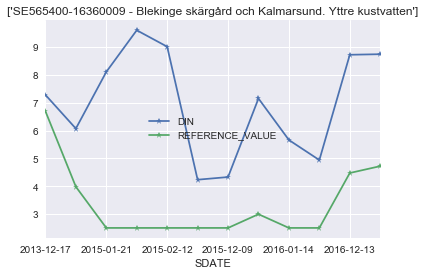

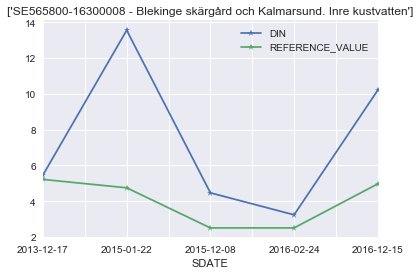

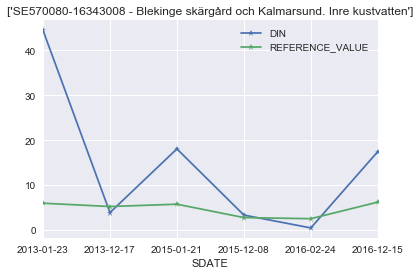

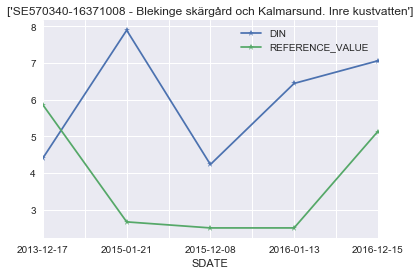

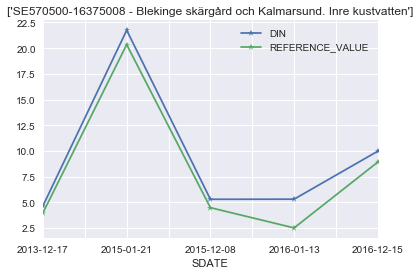

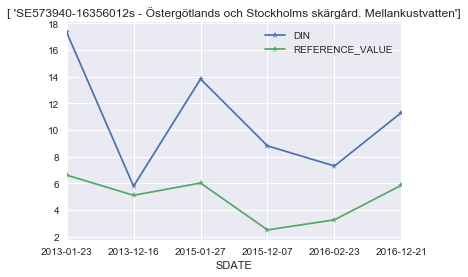

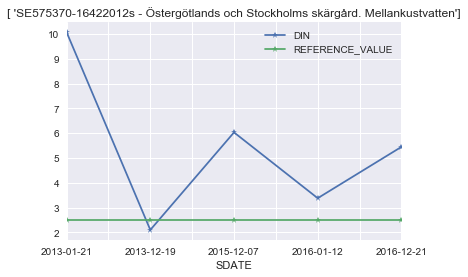

In [284]:
%matplotlib inline
import seaborn as sns
for name, group in ind_obj.classification_results['status_by_date'].groupby('VISS_EU_CD'):
    #group['date'] = pd.to_datetime(group.SDATE)
    #group.dropna(subset = ['date', 'DIN'])
    #sns.tsplot(data = group.to_dict(), time = 'SDATE', value = 'DIN', condition = 'STATUS', legend = True)
    group.plot('SDATE', ['DIN', 'REFERENCE_VALUE'], title = name + group.WATER_TYPE_AREA.values[0], marker ='*')

In [283]:
name + group.WATER_TYPE_AREA.values[0]

array(['SE565400-16360009 - Blekinge skärgård och Kalmarsund. Yttre kustvatten'], dtype=object)

In [247]:
type(group.DIN.values[0])

numpy.float64

In [52]:
emptydf = pd.DataFrame(columns = ['DATE','WATER_TYPE_AREA' ])
emptydf.index.name = 'VISS_EU_CD'
emptydf
emptydf.index['test']

C:\Anaconda3\lib\site-packages\pandas\indexes\base.py:1423: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [80]:
ind_obj.get_water_body_indicator_df(wb)

,SDATE,YEAR,MONTH,POSITION,VISS_EU_CD,WATER_TYPE_AREA,DEPH,DIN,SALT,REFERENCE_VALUE
7031,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,5.00,6.1,2.39187
7032,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,4.85,6.0,2.50020
7033,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,4.92,6.0,2.50020
10166,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,10.10,5.3,3.25851
10167,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,9.87,5.9,2.60853
10168,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,6.95,6.5,1.95855
10930,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,8.38,5.5,3.04185
10931,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,8.13,NaN,NaN
10932,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,7.14,6.6,1.85022
17901,2015-02-09,2015,2,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,13.30,5.6,2.93352


In [82]:
temp = ind_obj.water_body_indicator_df[wb].dropna(subset = ['DIN', 'REFERENCE_VALUE']).copy(deep = True)
temp['ek'] = np.divide(temp.REFERENCE_VALUE,temp.DIN)
temp

,SDATE,YEAR,MONTH,POSITION,VISS_EU_CD,WATER_TYPE_AREA,DEPH,DIN,SALT,REFERENCE_VALUE,ek
7031,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,5.00,6.1,2.39187,0.478374
7032,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,4.85,6.0,2.50020,0.515505
7033,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,4.92,6.0,2.50020,0.508171
10166,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,10.10,5.3,3.25851,0.322625
10167,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,9.87,5.9,2.60853,0.264289
10168,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,6.95,6.5,1.95855,0.281806
10930,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,8.38,5.5,3.04185,0.362989
10932,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,7.14,6.6,1.85022,0.259134
17901,2015-02-09,2015,2,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,13.30,5.6,2.93352,0.220565
17903,2015-02-09,2015,2,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,7.93,6.6,1.85022,0.233319


In [157]:
#dw_obj.ref_settings.get_value(variable = 'HG_EQR_LIMIT', type_area = type_area)
#dw_obj.ref_settings.get_value(variable = 'PB_EQR_LIMIT', type_area = type_area)

In [36]:
#dw_obj.tolerance_settings.get_value(variable = 'MIN_NR_YEARS', type_area = '22')
#dw_obj.tolerance_settings.get_min_nr_years(type_area = '22')
#dw_obj.mapping_objects['water_body'].keys()

In [41]:
#ind_obj = w.get_step_object(step = 3, subset = subset_uuid).indicator_objects[indicator]

In [86]:
ind_obj.water_body_indicator_df[wb]

,SDATE,YEAR,MONTH,POSITION,VISS_EU_CD,WATER_TYPE_AREA,DEPH,DIN,SALT,REFERENCE_VALUE,local_EQR
7031,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,5.00,6.1,2.39187,0.478374
7032,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,4.85,6.0,2.50020,0.515505
7033,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,4.92,6.0,2.50020,0.508171
10166,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,10.10,5.3,3.25851,0.322625
10167,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,9.87,5.9,2.60853,0.264289
10168,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,6.95,6.5,1.95855,0.281806
10930,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,8.38,5.5,3.04185,0.362989
10931,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,8.13,NaN,NaN,NaN
10932,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,7.14,6.6,1.85022,0.259134
17901,2015-02-09,2015,2,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,13.30,5.6,2.93352,0.220565


In [57]:
ind_obj.classification_results[wb]['local_EQR_by_year']#.dropna(subset = ['mean_ek_value'])

KeyError: 'local_EQR_by_year'

In [46]:
ind_obj.water_body_indicator_df[wb].dropna(subset = ['REFERENCE_VALUE'])

,SDATE,YEAR,MONTH,POSITION,VISS_EU_CD,WATER_TYPE_AREA,DEPH,DIN,SALT,REFERENCE_VALUE,local_EQR
7031,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,5.00,6.1,2.39187,0.478374
7032,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,4.85,6.0,2.50020,0.515505
7033,2016-12-08,2016,12,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,4.92,6.0,2.50020,0.508171
10166,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,10.10,5.3,3.25851,0.322625
10167,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,5.0,9.87,5.9,2.60853,0.264289
10168,2016-02-09,2016,2,58.64_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,6.95,6.5,1.95855,0.281806
10930,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,8.38,5.5,3.04185,0.362989
10932,2015-12-08,2015,12,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,7.14,6.6,1.85022,0.259134
17901,2015-02-09,2015,2,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,0.5,13.30,5.6,2.93352,0.220565
17903,2015-02-09,2015,2,58.65_16.39,SE583926-161744,13 - Östergötlands inre kustvatten,10.0,7.93,6.6,1.85022,0.233319


In [30]:
def get_EK(x):
    y = x.DIN/x.REFERENCE_VALUE
    if y > 1:
        return 1
    else:
        return y

df = ind_obj.water_body_indicator_df[wb]
df['ek_value'] = df.apply(get_EK, axis = 1)

In [31]:
df[ind_obj.indicator_parameter]/df.REFERENCE_VALUE

7057     1.002526
7058     1.011999
7059     1.075150
7349     1.193559
7350     0.852542
7351     0.895169
10343    1.795074
10344    1.262979
10345    1.235931
11065    0.914580
11066    0.937210
11067    0.911079
17831    1.114502
17832    1.042739
17833    1.155796
18397         NaN
18398         NaN
18399         NaN
18916    0.851515
18917    0.845883
18918    0.874886
26382    1.205698
26383    1.058389
26384    1.466357
27000    0.954291
27001    0.969711
27002    0.985130
34344    0.907042
34345    1.289190
34346    1.481507
dtype: float64

In [32]:
by_date = df.groupby(['SDATE', 'YEAR'],).ek_value.agg(['count', 'min', 'max', 'mean']).reset_index()
# by_date.to_csv(self.paths['results'] +'/' + self.name + water_body +'by_occation.txt', sep='\t')
by_date.rename(columns={'mean':'mean_ek_value', 'count': 'number_of_values'}, inplace=True) # Cant use "mean" below
by_date

,SDATE,YEAR,number_of_values,min,max,mean_ek_value
0,2013-01-15,2013,3,0.907042,1.000000,0.969014
1,2013-12-04,2013,3,0.954291,0.985130,0.969711
2,2014-01-16,2014,3,1.000000,1.000000,1.000000
3,2014-12-03,2014,3,0.845883,0.874886,0.857428
4,2015-01-14,2015,0,NaN,NaN,NaN
5,2015-02-11,2015,3,1.000000,1.000000,1.000000
6,2015-12-02,2015,3,0.911079,0.937210,0.920956
7,2016-01-27,2016,3,1.000000,1.000000,1.000000
8,2016-11-09,2016,3,0.852542,1.000000,0.915904
9,2016-12-07,2016,3,1.000000,1.000000,1.000000


In [34]:
# Remove occations with not enough samples
# Or use count as a flag for what to display for the user?
by_date['all_ok'] = True
ix = by_date.loc[by_date['number_of_values'] < 1, 'all_ok'].index
by_date.set_value(ix, 'all_ok', False)

,SDATE,YEAR,number_of_values,min,max,mean_ek_value,all_ok
0,2013-01-15,2013,3,0.907042,1.000000,0.969014,True
1,2013-12-04,2013,3,0.954291,0.985130,0.969711,True
2,2014-01-16,2014,3,1.000000,1.000000,1.000000,True
3,2014-12-03,2014,3,0.845883,0.874886,0.857428,True
4,2015-01-14,2015,0,NaN,NaN,NaN,False
5,2015-02-11,2015,3,1.000000,1.000000,1.000000,True
6,2015-12-02,2015,3,0.911079,0.937210,0.920956,True
7,2016-01-27,2016,3,1.000000,1.000000,1.000000,True
8,2016-11-09,2016,3,0.852542,1.000000,0.915904,True
9,2016-12-07,2016,3,1.000000,1.000000,1.000000,True


In [35]:
"""
2) Medelvärdet av EK för varje parameter beräknas för varje år.
"""
by_year = by_date.groupby('YEAR').mean_ek_value.agg(['count', 'min', 'max', 'mean']).reset_index()
by_year.rename(columns={'mean':'mean_ek_value', 'count': 'number_of_dates'}, inplace=True)
by_year['all_ok'] = True
by_year.loc[by_year['number_of_dates'] < 1, 'all_ok'] = False
# by_year.to_csv(self.paths['results'] +'/' + self.name + water_body + 'by_year.txt', sep='\t')
by_year

,YEAR,number_of_dates,min,max,mean_ek_value,all_ok
0,2013,2,0.969014,0.969711,0.969362,True
1,2014,2,0.857428,1.000000,0.928714,True
2,2015,2,0.920956,1.000000,0.960478,True
3,2016,3,0.915904,1.000000,0.971968,True


In [36]:
by_period = by_year[['mean_ek_value']].describe()
by_period

,mean_ek_value
count,4.000000
mean,0.957631
std,0.019895
min,0.928714
25%,0.952537
50%,0.964920
75%,0.970014
max,0.971968


In [37]:
"""
3) Medelvärdet av EK för varje parameter och vattenförekomst (beräknas för minst
en treårsperiod)
"""
by_period = by_year[['mean_ek_value']].describe()#.agg(['count', 'min', 'max', 'mean'])
by_period = by_period.transpose()
#by_period#.loc['mean', 'mean_ek_value']
#
#by_period['count'].get_value('mean_ek_value')
by_period['all_ok']  = True
if by_period['count'].get_value('mean_ek_value') < 3:
    by_period['all_ok'] = False

by_period

,count,mean,std,min,25%,50%,75%,max,all_ok
mean_ek_value,4.0,0.957631,0.019895,0.928714,0.952537,0.96492,0.970014,0.971968,True


In [40]:
by_period['mean'].get_value('mean_ek_value')

0.95763063655011882

In [29]:
temp_df = pd.DataFrame(np.random.randn(10, 3), columns=['A', 'B', 'C'],
...                   index=pd.date_range('1/1/2000', periods=10))
temp_df.iloc[3:7] = np.nan
temp_df.describe()

,A,B,C
count,6.000000,6.000000,6.000000
mean,0.206290,0.471121,-0.242431
std,0.586035,0.679945,1.721820
min,-0.333494,-0.641210,-2.997678
25%,-0.286442,0.214068,-1.103137
50%,0.056126,0.508677,0.315088
75%,0.657880,0.929940,0.644624
max,1.001151,1.264358,1.734323


In [30]:
def set_above_one_value(x):
    if x > 1:
        return 1
    else:
        return x
dw_obj.water_body_indicator_df[wb]['EK'] = dw_obj.water_body_indicator_df[wb]['DIN']/dw_obj.water_body_indicator_df[wb]['REFERENCE_VALUE']
dw_obj.water_body_indicator_df[wb]['EK'] = dw_obj.water_body_indicator_df[wb]['EK'].apply(set_above_one_value)
dw_obj.water_body_indicator_df[wb]['EK']

7057     1.000000
7058     1.000000
7059     1.000000
7349     1.000000
7350     0.852542
7351     0.895169
10343    1.000000
10344    1.000000
10345    1.000000
11065    0.914580
11066    0.937210
11067    0.911079
17831    1.000000
17832    1.000000
17833    1.000000
18397         NaN
18398         NaN
18399         NaN
18916    0.851515
18917    0.845883
18918    0.874886
26382    1.000000
26383    1.000000
26384    1.000000
27000    0.954291
27001    0.969711
27002    0.985130
34344    0.907042
34345    1.000000
34346    1.000000
Name: EK, dtype: float64

In [31]:
dw_obj.get_filtered_data(subset = subset_uuid, step = 'step_2', type_area = 22, indicator = 'din_winter')[['DIN']].dropna()

,DIN
5199,4.68
5200,4.55
5201,4.54
5202,4.23
5203,4.42
5204,4.19
5205,5.59
5206,8.84
5207,6.77
5208,5.68


In [120]:
B2_NTOT_WINTER_SETTINGS = lv_workspace.get_subset_object('B').get_step_object('step_2').indicator_ref_settings['ntot_winter']
lv_workspace.get_subset_object('B').get_step_object('step_2').indicator_ref_settings['ntot_winter'].allowed_variables
# gör om till
# lv_workspace.get_indicator_ref_settings(step = , subset = , indicator = , waterbody/type)
# ger samma resultat som:
#lv_workspace.get_subset_object('B').get_step_object('step_2').indicator_ref_settings['ntot_winter'].settings.ref_columns

lv_workspace.get_subset_object('B').get_step_object('step_2').indicator_ref_settings['ntot_winter'].settings.get_value('EK G/M', 22)
#print(B2_NTOT_WINTER_SETTINGS)
#B2_NTOT_WINTER_SETTINGS.get_value('2', 'DEPTH_INTERVAL')

'0.85'

In [124]:
av = lv_workspace.get_subset_object('B').get_step_object('step_2').indicator_data_filter_settings['ntot_winter'].allowed_variables
lv_workspace.get_subset_object('B').get_step_object('step_2').indicator_data_filter_settings['ntot_winter'].settings.df[av]

,DEPH_INTERVAL,MONTH_LIST
0,0-10,1;2;3;12
1,0-10,1;2;3;12
2,0-10,1;2;3;12
3,0-10,1;2;3;12
4,0-10,1;2;3;12
5,0-10,1;2;3;12
6,0-10,1;2;3;12
7,0-10,1;2;12
8,0-10,1;2;12
9,0-10,1;2;12


In [119]:
lv_workspace.get_subset_object('B').get_step_object('step_2').indicator_data_filter_settings['ntot_winter'].settings.df


,TYPE_AREA_NUMBER,TYPE_AREA_SUFFIX,DEPH_INTERVAL,MIN_NR_YEARS,MIN_NR_VALUES,TIME_DELTA_TOLERANCE,POS_RADIUS_TOLERANCE,DEPH_TOLERANCE,MONTH_LIST,EKV REF,EKV H/G,EKV G/M,EKV M/O,EKV O/D,EK H/G,EK G/M,EK M/O,EK O/D,SALINITY MAX
0,1,n,0-10,3,3,3,0.1,5,1;2;3;12,-0.630*s+36,-0.715*s+40.86,-0.799*s+45.72,-1.0546*s+60.3,-1.480*s+84.6,0.88,0.79,0.6,0.43,27
1,1,s,0-10,3,3,3,0.1,5,1;2;3;12,-0.65*s+30,-0.738*s+34.05,-0.8255*s+38.1,-1.0888*s+50.25,-1.528*s+70.5,0.88,0.79,0.6,0.43,20
2,2,NaN,0-10,3,3,3,0.1,5,1;2;3;12,-0.630*s+36,-0.715*s+40.86,-0.799*s+45.72,-1.0546*s+60.3,-1.480*s+84.6,0.88,0.79,0.6,0.43,27
3,3,NaN,0-10,3,3,3,0.1,5,1;2;3;12,-0.630*s+36,-0.715*s+40.86,-0.799*s+45.72,-1.0546*s+60.3,-1.480*s+84.6,0.88,0.79,0.6,0.43,27
4,4,NaN,0-10,3,3,3,0.1,5,1;2;3;12,-0.65*s+30,-0.738*s+34.05,-0.8255*s+38.1,-1.0888*s+50.25,-1.528*s+70.5,0.88,0.79,0.6,0.43,20
5,5,NaN,0-10,3,3,3,0.1,5,1;2;3;12,0*s+17,0*s+19.295,0*s+21.59,0*s+28.475,0*s+39.95,0.89,0.77,0.61,0.43,20
6,6,NaN,0-10,3,3,3,0.1,5,1;2;3;12,0*s+17,0*s+19.295,0*s+21.59,0*s+28.475,0*s+39.95,0.89,0.77,0.61,0.43,20
7,7,NaN,0-10,3,3,3,0.1,5,1;2;12,-6*s+59,-6.6*s+64.9,-7.2*s+70.8,-9*s+88.5,-12*s+118,0.91,0.84,0.67,0.5,7
8,8,NaN,0-10,3,3,3,0.1,5,1;2;12,-6*s+59,-6.6*s+64.9,-7.2*s+70.8,-9*s+88.5,-12*s+118,0.91,0.84,0.67,0.5,7
9,9,NaN,0-10,3,3,3,0.1,5,1;2;12,-6*s+59,-6.6*s+64.9,-7.2*s+70.8,-9*s+88.5,-12*s+118,0.91,0.84,0.67,0.5,7


In [67]:
B2_NTOT_WINTER_SETTINGS.settings.mapping_water_body['N m Bottenvikens kustvatten']

{'BASIN_NUMBER': '110002.0',
 'CENTER_LAT': '64° 42\' 35,349"',
 'CENTER_LON': '21° 24\' 5,383"',
 'EU_CD': 'SE648760-213140',
 'HID': '649640-214530',
 'TYPE_AREA_NUMBER': '23',
 'TYPE_AREA_SUFFIX': '',
 'URL_VISS': 'http://www.viss.lansstyrelsen.se/waters.aspx?waterEUID=SE648760-213140'}

### Set subset time and area filter 

In [35]:
f1_A = lv_workspace.get_data_filter_object(step=1, subset='A') 
f1_A.include_list_filter

{'MYEAR': ['2016', '2017'],
 'SEA_AREA_NAME': ['Gullmarn centralbassäng', 'Rivö fjord'],
 'STATN': ['BJÖRKHOLMEN']}

In [136]:
lv_workspace.get_data_filter_info(step=1, subset='A') 

{'exclude_list': ['MYEAR', 'SEA_AREA_NAME', 'STATN'],
 'include_list': ['MYEAR', 'SEA_AREA_NAME', 'STATN']}

In [36]:
f1_A.exclude_list_filter

{'MYEAR': ['2015', '2016'], 'SEA_AREA_NAME': [], 'STATN': ['SLÄGGÖ']}

In [21]:
f0.include_list_filter

{'MYEAR': ['2016', '2017'],
 'SEA_AREA_NAME': ['Byfjorden',
  'Gullmarn centralbassäng',
  'Havstensfjorden',
  'Rivö fjord'],
 'STATN': []}

### Apply subset filter 

In [22]:
lv_workspace.apply_subset_filter(subset='A') # Not handled properly by the IndexHandler

True

### Extract filtered data 

In [23]:
data_after_subset_filter = lv_workspace.get_filtered_data(level=1, subset='A') # level=0 means first filter 
print('{} rows mathing the filter criteria'.format(len(data_after_subset_filter)))
data_after_subset_filter.head()

198 rows mathing the filter criteria


,AMON,BQIm,CPHL,DEPH,DOXY_BTL,DOXY_CTD,LATIT_DD,LONGI_DD,MNDEP,MXDEP,...,SERNO,SHARKID_MD5,SHIPC,STATN,STIME,TEMP_BTL,TEMP_CTD,WATER_DISTRICT,WATER_TYPE_AREA,WLTYP
2628,0.76,NaN,0.6,0.0,7.05,,58.38767,11.62667,NaN,NaN,...,8.0,NaN,77SN,BJÖRKHOLMEN,17:30,4.96,4.84,Västerhavets vattendistrikt,02 - Västkustens fjordar,2 - Havsområde innanför 1 NM
2629,0.72,NaN,0.5,2.0,7.12,,58.38767,11.62667,NaN,NaN,...,8.0,NaN,77SN,BJÖRKHOLMEN,17:30,4.93,4.84,Västerhavets vattendistrikt,02 - Västkustens fjordar,2 - Havsområde innanför 1 NM
2630,0.74,NaN,0.6,5.0,7.16,,58.38767,11.62667,NaN,NaN,...,8.0,NaN,77SN,BJÖRKHOLMEN,17:30,4.88,4.84,Västerhavets vattendistrikt,02 - Västkustens fjordar,2 - Havsområde innanför 1 NM
2631,0.65,NaN,0.5,10.0,7.11,,58.38767,11.62667,NaN,NaN,...,8.0,NaN,77SN,BJÖRKHOLMEN,17:30,5.12,4.86,Västerhavets vattendistrikt,02 - Västkustens fjordar,2 - Havsområde innanför 1 NM
2632,0.46,NaN,0.3,15.0,6.86,,58.38767,11.62667,NaN,NaN,...,8.0,NaN,77SN,BJÖRKHOLMEN,17:30,5.52,5.10,Västerhavets vattendistrikt,02 - Västkustens fjordar,2 - Havsområde innanför 1 NM


In [24]:
# show available waterbodies
lst = data_after_subset_filter.SEA_AREA_NAME.unique()
print('Waterbodies in subset:\n{}'.format('\n'.join(lst)))

Waterbodies in subset:
Gullmarn centralbassäng


In [24]:
import numpy as np
np.where(lv_workspace.index_handler.subset_filter)

(array([2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639,
        2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764,
        2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880,
        2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962,
        3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087,
        3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195,
        3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3291, 3292,
        3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419,
        3493, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3502, 3503,
        3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634,
        3717, 3718, 3719, 3720, 3721, 3722, 3723, 3724, 3725, 3726, 3727,
        3859, 3860, 3861, 3862, 3863, 3864, 3865, 3866, 3867, 3868, 3869,
        3979, 3980, 3981, 3982, 3983, 3984, 3985, 3986, 3987, 3988, 3989,
        4110, 4111, 4112, 4113, 4114, 

In [25]:
f = lv_workspace.get_data_filter_object(step=1, subset='A') 


In [26]:
f.all_filters

{'exclude_list': ['MYEAR', 'SEA_AREA_NAME', 'STATN'],
 'include_list': ['MYEAR', 'SEA_AREA_NAME', 'STATN']}

In [27]:
f.exclude_list_filter

{'MYEAR': ['2015', '2016'], 'SEA_AREA_NAME': [], 'STATN': ['SLÄGGÖ']}

In [28]:
f.include_list_filter

{'MYEAR': ['2016', '2017'],
 'SEA_AREA_NAME': ['Gullmarn centralbassäng', 'Rivö fjord'],
 'STATN': ['BJÖRKHOLMEN']}

In [29]:
s = lv_workspace.get_step_1_object('A')

In [30]:
s.data_filter.all_filters

{'exclude_list': ['MYEAR', 'SEA_AREA_NAME', 'STATN'],
 'include_list': ['MYEAR', 'SEA_AREA_NAME', 'STATN']}

In [31]:
f0 = lv_workspace.get_data_filter_object(step=0) 

In [32]:
f0.exclude_list_filter

{'MYEAR': ['2015', '2016'], 'SEA_AREA_NAME': [], 'STATN': []}

In [33]:
f0.include_list_filter

{'MYEAR': ['2016', '2017'],
 'SEA_AREA_NAME': ['Byfjorden',
  'Gullmarn centralbassäng',
  'Havstensfjorden',
  'Rivö fjord'],
 'STATN': []}

# Quality factor Nutrients

In [ ]:
lv_workspace.initiate_quality_factors()